# DEEP EUTECTIC SOLVENTS. DENSITY. ML ALGORITHMS 

## 1. Preparation

In [62]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [63]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import seaborn as sns
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [65]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('density_df_ML.xlsx')
db_final = db_final1.drop(columns=['Density, g/cm^3'])
db_final.insert(0, 'Density, g/cm^3', db_final1['Density, g/cm^3'])
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)

In [66]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [67]:
#Summary table description
db_final.describe()

Density, g/cm^3  X#1 (molar fraction)  X#2 (molar fraction)  \
count      4023.000000           4023.000000           4023.000000   
mean          1.102685              0.339358              0.631537   
std           0.168574              0.195431              0.202706   
min           0.806000              0.034000              0.078000   
25%           0.996560              0.200000              0.500000   
50%           1.087000              0.333000              0.667000   
75%           1.185493              0.500000              0.800000   
max           1.988000              0.917000              0.950000   

       X#3 (molar fraction)            I           II         III  \
count           4023.000000  4023.000000  4023.000000  4023.00000   
mean               0.028610     0.014666     0.000497     0.64355   
std                0.122092     0.120226     0.022294     0.47901   
min                0.000000     0.000000     0.000000     0.00000   
25%                0.000000     0.000000     0.000000     0.00000   
50%                0.000000     0.000000     0.000000     1.00000   
75%                0.000000     0.000000     0.000000     1.00000   
max                0.843000     1.000000     1.000000     1.00000   

                IV            V  Temperature, K  ...           Al  \
count  4023.000000  4023.000000     4023.000000  ...  4023.000000   
mean      0.076808     0.348993      320.802819  ...     0.016504   
std       0.266320     0.476711       20.840671  ...     0.095252   
min       0.000000     0.000000      278.150000  ...     0.000000   
25%       0.000000     0.000000      303.150000  ...     0.000000   
50%       0.000000     0.000000      318.150000  ...     0.000000   
75%       0.000000     1.000000      333.150000  ...     0.000000   
max       1.000000     1.000000      413.150000  ...     0.667000   

                 P            S           Cl            K           Fe  \
count  4023.000000  4023.000000  4023.000000  4023.000000  4023.000000   
mean      0.016653     0.016844     0.238318     0.002624     0.001938   
std       0.074733     0.094404     0.363968     0.020760     0.028757   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.143000     0.000000     0.000000   
75%       0.000000     0.000000     0.333000     0.000000     0.000000   
max       0.667000     0.667000     3.001000     0.400000     0.667000   

                Cu           Zn           Br     ind_syst  
count  4023.000000  4023.000000  4023.000000  4023.000000  
mean      0.000166     0.001118     0.030770   167.465076  
std       0.010516     0.021395     0.097856   115.642087  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000    66.000000  
50%       0.000000     0.000000     0.000000   132.000000  
75%       0.000000     0.000000     0.000000   269.000000  
max       0.667000     0.667000     0.999000   403.000000  

[8 rows x 33 columns]

### 1.2. Splitting data into test and train

In [68]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [69]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### 1.3. Functions for plotting and calculating metrics

In [70]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(0.5, 2.1) #Intervals of x and y
    plt.ylim(0.5, 2.1)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(0.5, 2.1, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)
    

In [71]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    #print('Q2:', Q2)
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [72]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Density_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Density_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Density_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Density_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [73]:
db_final.rename(columns = {'C':'Number of C', 
                     'Metal_frac_gen':'Mass fraction of metal ',
                     'NumHeteroatoms':'Number of Heteroatoms',
                     'N':'Number of N',
                     'X#3 (molar fraction)':'Molar fraction of component#3',
                     'O':'Number of O',
                     'Br':'Number of Br',
                     'Cl':'Number of Cl',
                     'SpherocityIndex':'Spherocity Index',
                     'VdWVolume, A^3#2':'Van der Waals volume of component #2',
                     'VdWVolume, A^3#3':'Van der Waals volume of component #3',
                     'Temperature, K':'Temperature of experiment, K',
                     }, inplace = True )

In [74]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Number of Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[0], title='Feature importance', feature_names=list_columns, max_display = 10)

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8488347120889259
MAE_test: 0.05458051536137732
MSE_test: 0.005524275425396633
RMSE_test: 0.07432546956055261
r2_train: 0.8652673728431018
MAE_train: 0.04154109271329244
MSE_train: 0.003127639949425679
RMSE_train: 0.05592530687824322



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.08185276885659842
MAE_test: 0.053873647536942744
MSE_test: 0.01737317448796262
RMSE_test: 0.13180733852089807
r2_train: 0.8751569620290889
MAE_train: 0.04084607406305753
MSE_train: 0.0033833708509539554
RMSE_train: 0.05816675039018387



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.5823143298187492
MAE_test: 0.047748065772722774
MSE_test: 0.005494598945008107
RMSE_test: 0.07412556202153281
r2_train: 0.8916151564878446
MAE_train: 0.04047767395487494
MSE_train: 0.0031504533145311087
RMSE_train: 0.05612889910314569



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.814534220710219
MAE_test: 0.05161391353992046
MSE_test: 0.008664453916448725
RMSE_test: 0.09308304849138067
r2_train: 0.8518053829837965
MAE_train: 0.038357476142541286
MSE_train: 0.002974608269053644
RMSE_train: 0.05453996946326285
r2_test: 0.8073432681884453
MAE_test: 0.050457300936771324
MSE_test: 0.004731954008345553
RMSE_test: 0.06878919979433946
r2_train: 0.8942983738849195
MAE_train: 0.038146733066121916
MSE_train: 0.0027922089956404694
RMSE_train: 0.052841356867897225



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  
0            0.851805            0.894298  
1            0.814534            0.807343  
2            0.054540            0.052841  
3            0.093083            0.068789

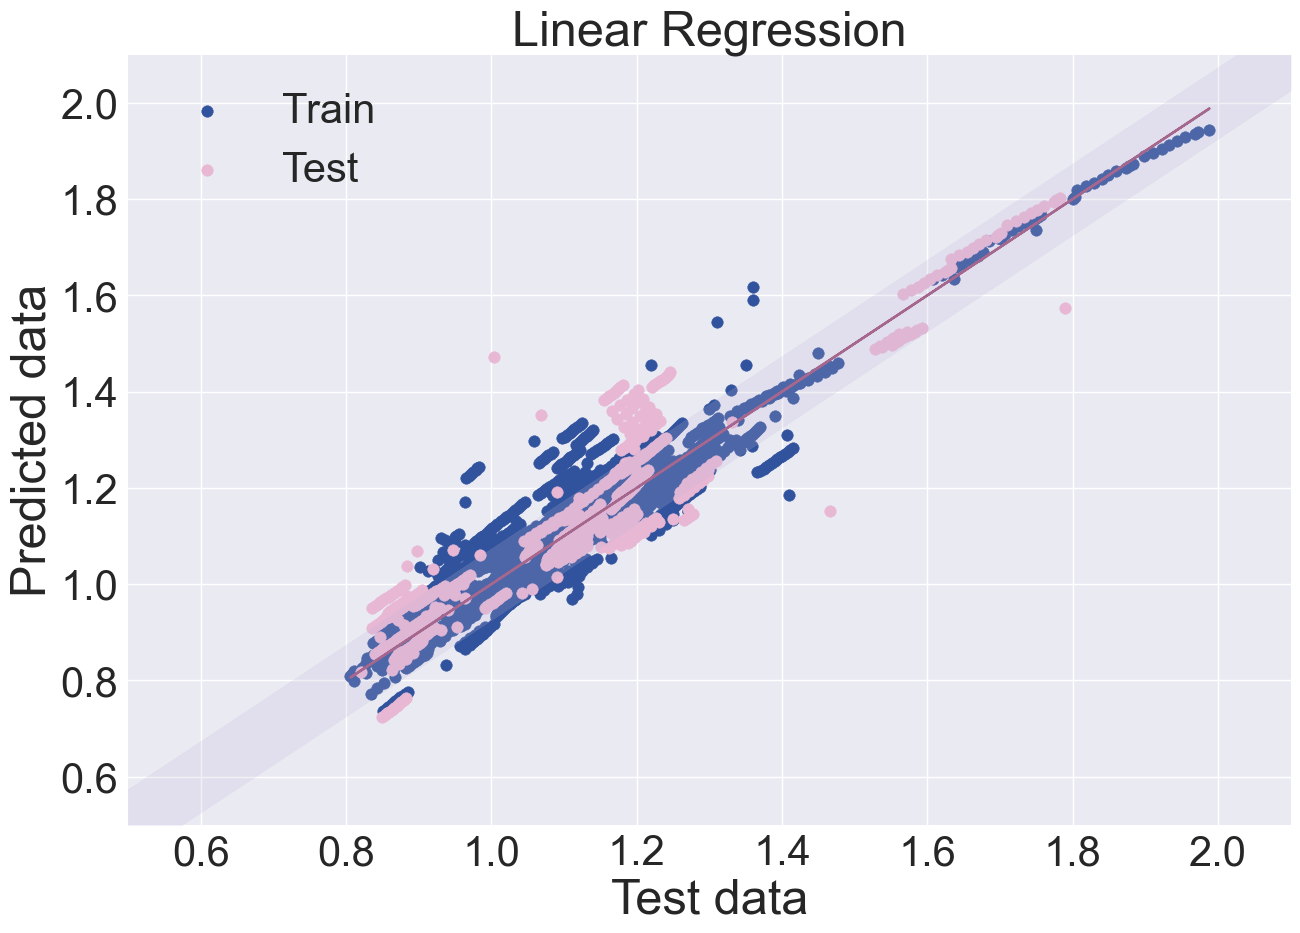

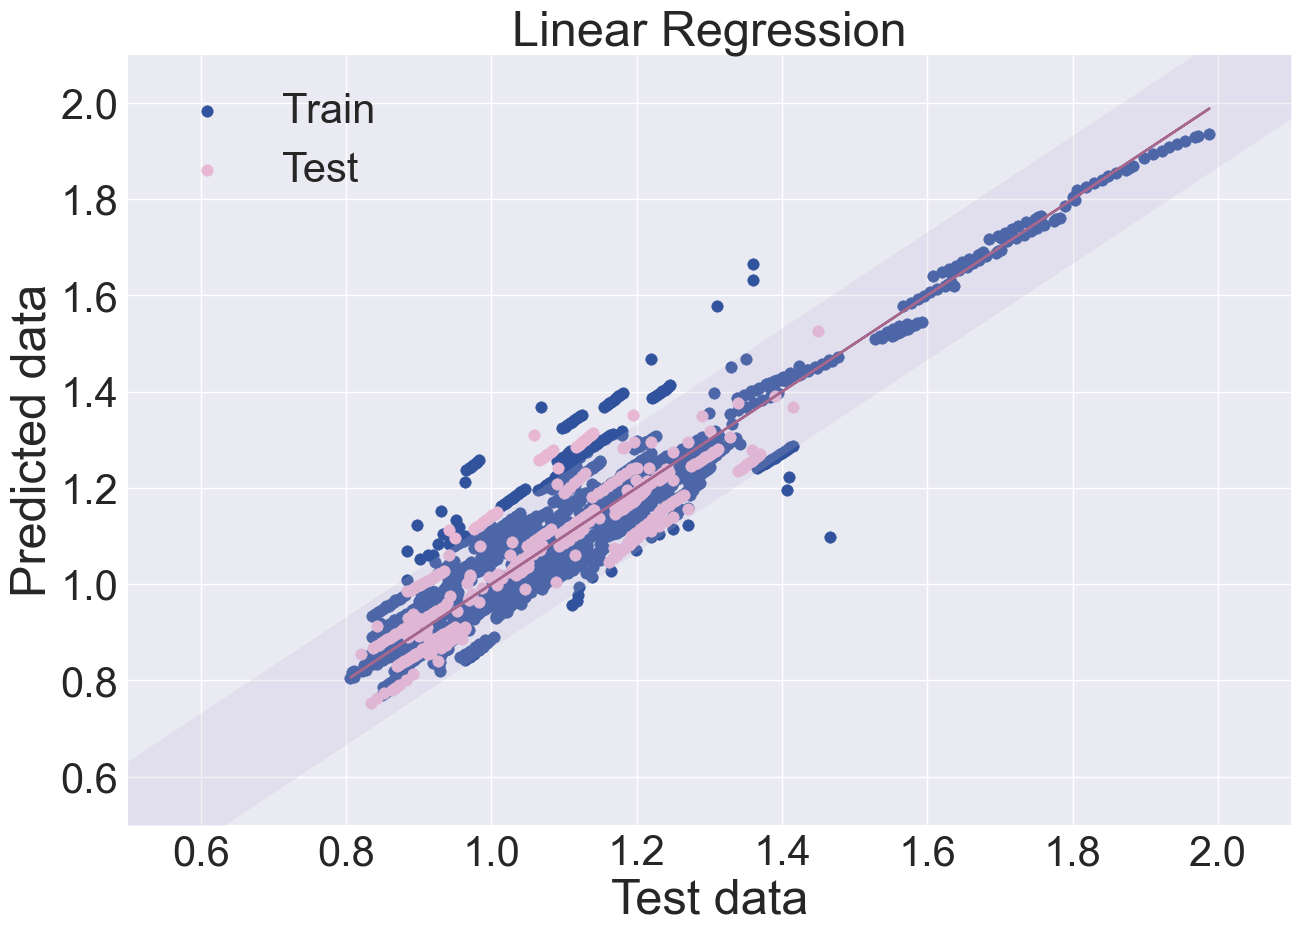

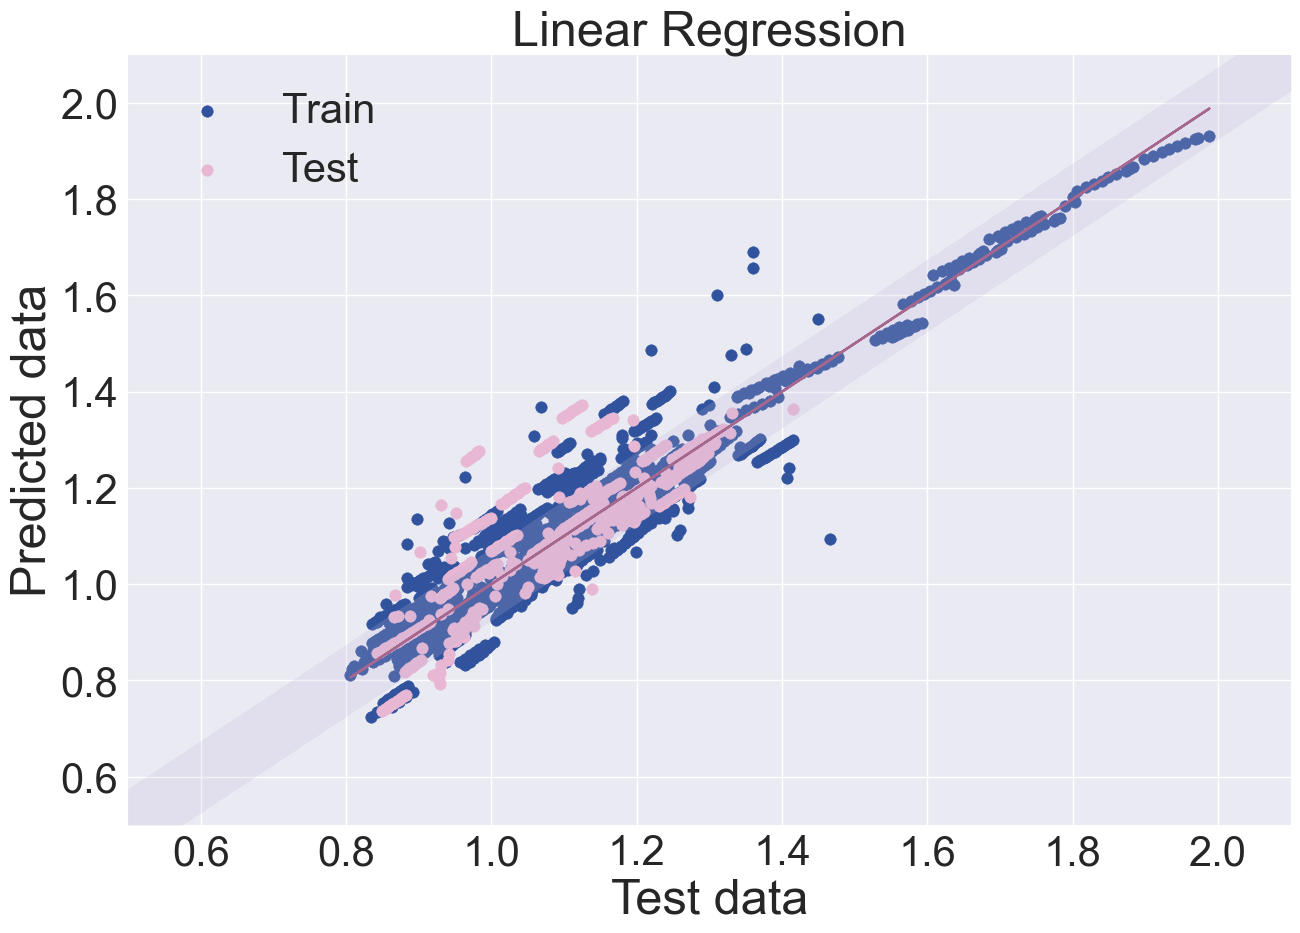

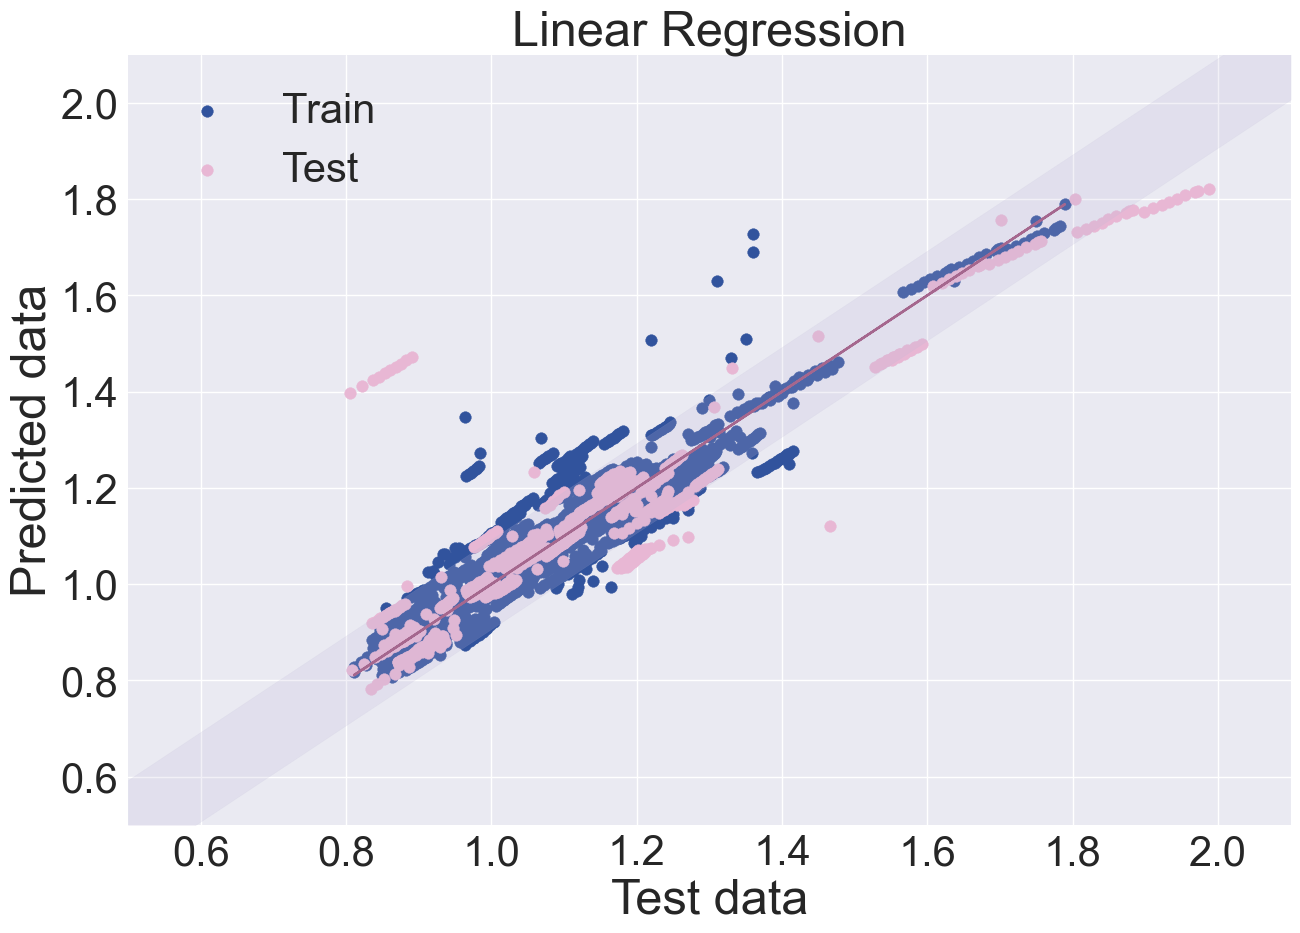

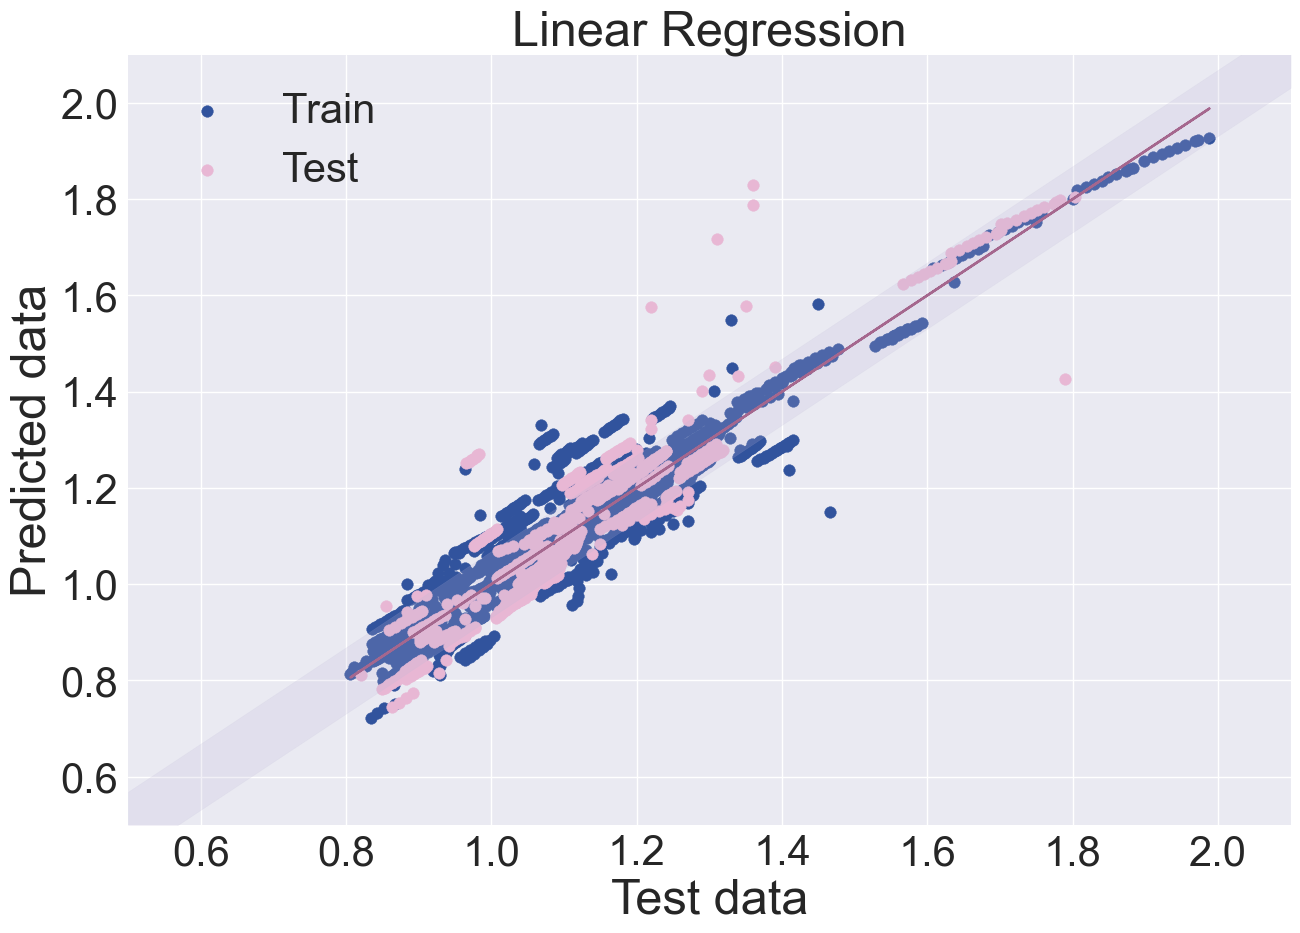

In [75]:
#LR for training dataset
# We split the sample so that there are different systems in the test and training
df_error_train = pd.DataFrame()
x_model = x_train.copy().drop(['ind_syst'],axis=1)

y_model = y_train.copy()
cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2)
count = 0    
#Creating a table to check accuracy on different DES classes
LR_df = x_model[:]
LR_df['Density_lit'] = y_model

   #Scaling the data 
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    x_train_mod.to_csv('new.csv')
    name = 'x_test' + str(count) + '.xlsx'
    name1 = 'x_train' + str(count) + '.xlsx'
    db_final.iloc[x_test_mod.index].to_excel(name)
    db_final.iloc[x_train_mod.index].to_excel(name1)
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
   #Linear regression
    regr_LR = LinearRegression()
    regr_LR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_LR.predict(x_test_mod)
    y1_pred = regr_LR.predict(x_train_mod)

    #Filling in the table in accordance with the metrics
    LR_df['Density_train' + str(count)] = None
    LR_df['Density_test' + str(count)] = None
    LR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    LR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Linear Regression' + str(count)] = regr_metrics(regr_LR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    
   #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Linear Regression', fontsize=35)
df_error_train

In [76]:
df_error_LR = metrics_class(LR_df, 'Linear Regression')
df_error_LR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  RMSE_train  \
0   Linear Regression0         2     I  0.744212       NaN    0.032737   
1   Linear Regression0         2   III  0.652779  0.307615    0.054459   
2   Linear Regression0         2    IV  0.745421  0.857302    0.032102   
3   Linear Regression0         2     V  0.812925  0.651371    0.061549   
4   Linear Regression0         3  None  0.967243  0.858484    0.057283   
5   Linear Regression1         2     I  0.745640       NaN    0.032645   
6   Linear Regression1         2   III  0.576787  0.514284    0.059304   
7   Linear Regression1         2    IV  0.918223 -4.466205    0.040119   
8   Linear Regression1         2     V  0.817657   0.79043    0.059482   
9   Linear Regression1         3  None  0.963008  0.529712    0.052261   
10  Linear Regression2         2     I  0.829377      None    0.030132   
11  Linear Regression2         2   III  0.548369  0.551118    0.060399   
12  Linear Regression2         2    IV  0.862938      None    0.047105   
13  Linear Regression2         2     V  0.891740   0.12647    0.046644   
14  Linear Regression2         3  None  0.966118  0.456883    0.056290   
15  Linear Regression3         2     I  0.840508       NaN    0.028164   
16  Linear Regression3         2   III  0.694233  0.779909    0.052416   
17  Linear Regression3         2    IV  0.889185  -0.16198    0.031436   
18  Linear Regression3         2     V  0.814786 -0.248992    0.060229   
19  Linear Regression3         3  None  0.934035  0.852653    0.066915   
20  Linear Regression4         2     I  0.819298 -0.478668    0.030789   
21  Linear Regression4         2   III  0.656445  0.439655    0.055000   
22  Linear Regression4         2    IV  0.888911   0.33244    0.041852   
23  Linear Regression4         2     V  0.859445  0.499274    0.052779   
24  Linear Regression4         3  None  0.974200  0.940856    0.041979   

   RMSE_test  
0   0.466997  
1   0.071899  
2   0.068875  
3   0.066991  
4   0.080128  
5   2.455357  
6   0.068226  
7   0.075709  
8   0.062037  
9   0.085336  
10      None  
11  0.064186  
12      None  
13  0.110085  
14   0.05064  
15  0.077938  
16  0.036102  
17  0.082964  
18  0.145945  
19  0.105518  
20   0.07296  
21  0.065007  
22  0.021243  
23   0.08714  
24  0.062895

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [77]:
#We optimize for DTR
regr_DTR = DecisionTreeRegressor()

search_space = {"max_depth": Integer(1, 13),
                "criterion": Categorical(['squared_error', 'absolute_error']), 
                "min_samples_split": Real(0.01, 0.5), 
                "min_samples_leaf": Real(0.01, 0.2), 
                "max_features": Categorical(['auto', 'sqrt', 'log2'])}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_DTR = BayesSearchCV(estimator = regr_DTR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_DTR.fit(x_train01, y_model, sample_weight=sample_weight)


criterion = opt_DTR.best_estimator_.criterion
max_depth = opt_DTR.best_estimator_.max_depth
min_samples_split = opt_DTR.best_estimator_.min_samples_split
min_samples_leaf = opt_DTR.best_estimator_.min_samples_leaf
max_features = opt_DTR.best_estimator_.max_features


print('criterion:', criterion,'max_depth:', max_depth, 'min_samples_split:', min_samples_split,'min_samples_leaf:', min_samples_leaf,'max_features:', max_features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
criterion: squared_error max_depth: 13 min_samples_split: 0.01 min_samples_leaf: 0.01 max_features: auto


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


r2_test: 0.6458433543155372
MAE_test: 0.07316028433819712
MSE_test: 0.012942513995981036
RMSE_test: 0.1137651703992968
r2_train: 0.7663087744597163
MAE_train: 0.03610736199385685
MSE_train: 0.005424833080549164
RMSE_train: 0.07365346618149864
r2_test: 0.7338371964842783
MAE_test: 0.050364406941239795
MSE_test: 0.005036330417209227
RMSE_test: 0.07096710799524825
r2_train: 0.9144520346373012
MAE_train: 0.029171082900666973
MSE_train: 0.002318435189265535
RMSE_train: 0.04815013176789379
r2_test: 0.6279849407813908
MAE_test: 0.051949745468249625
MSE_test: 0.004893808186004303
RMSE_test: 0.06995575877656036
r2_train: 0.9369997838618518
MAE_train: 0.025249013037633727
MSE_train: 0.0018312453412948455
RMSE_train: 0.042793052488632376
r2_test: 0.6497745072478796
MAE_test: 0.07133833548100899
MSE_test: 0.016361577073337175
RMSE_test: 0.12791238045371986
r2_train: 0.8269981883931171
MAE_train: 0.03180268612357053
MSE_train: 0.003472545965086081
RMSE_train: 0.058928312084142384
r2_test: 0.8479953


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  
0                   0.826998                   0.913975  
1                   0.649775                   0.847995  
2                   0.058928                   0.047670  
3                   0.127912                   0.061102

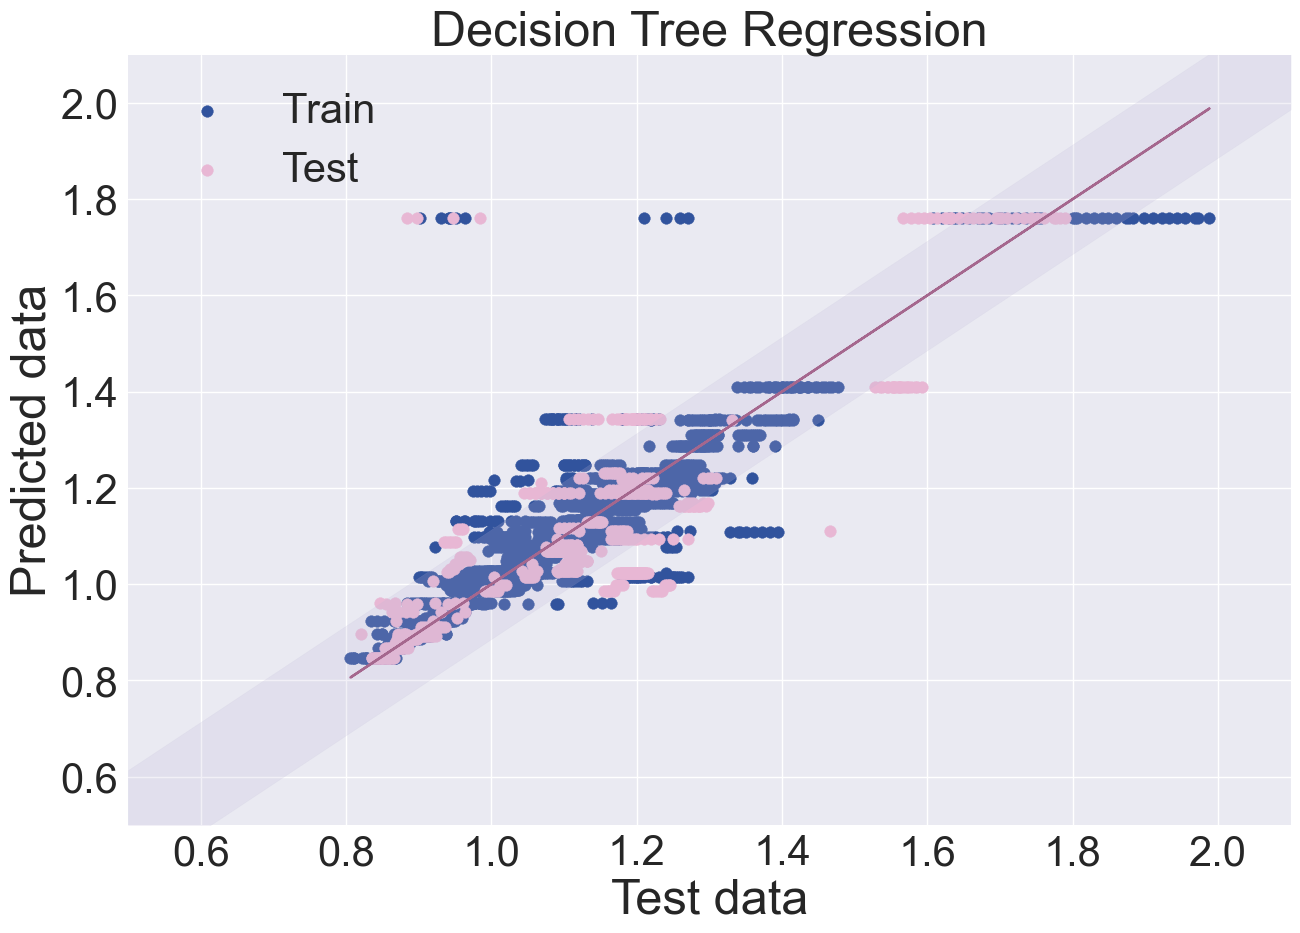

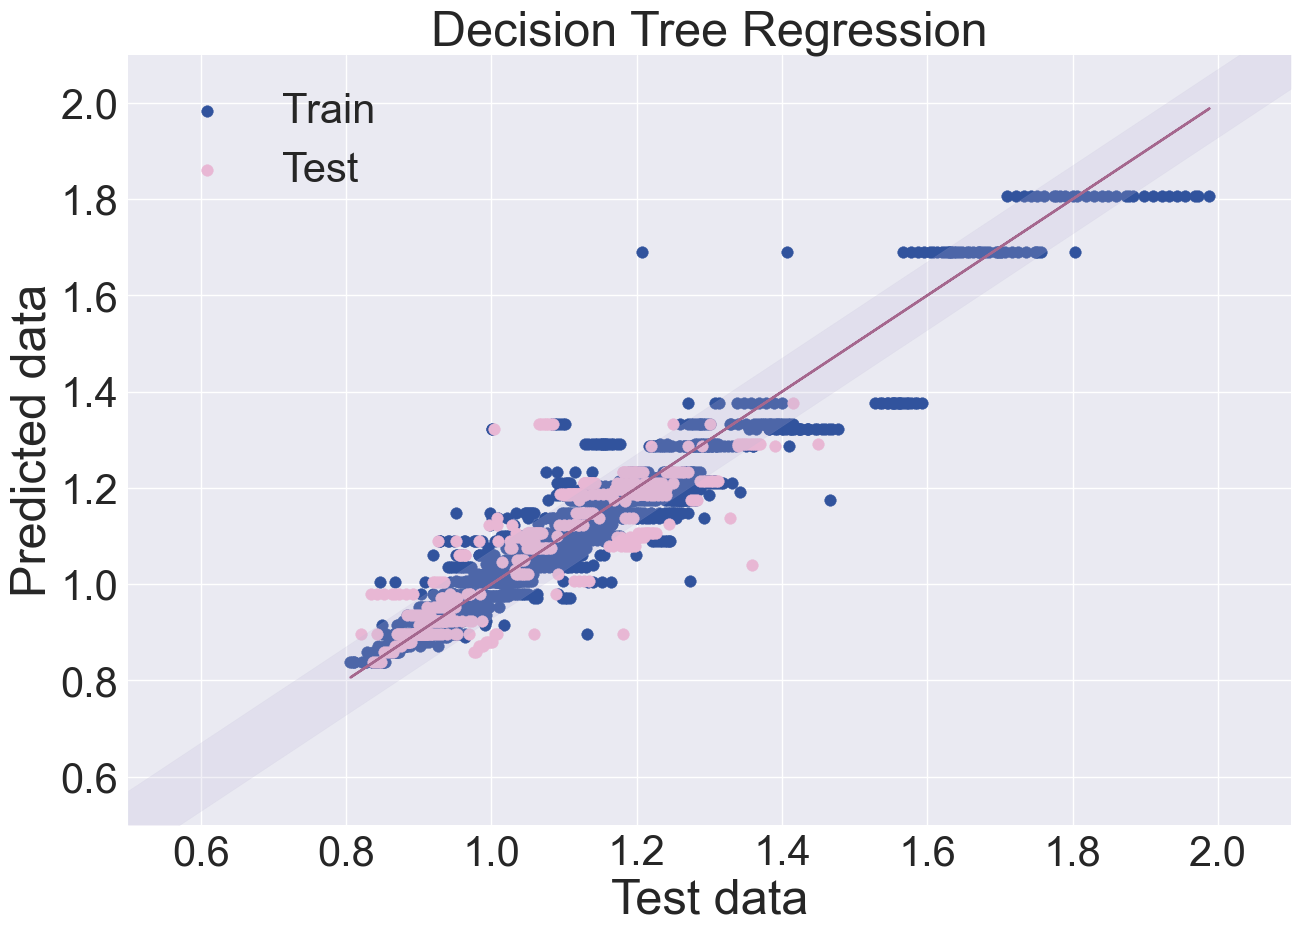

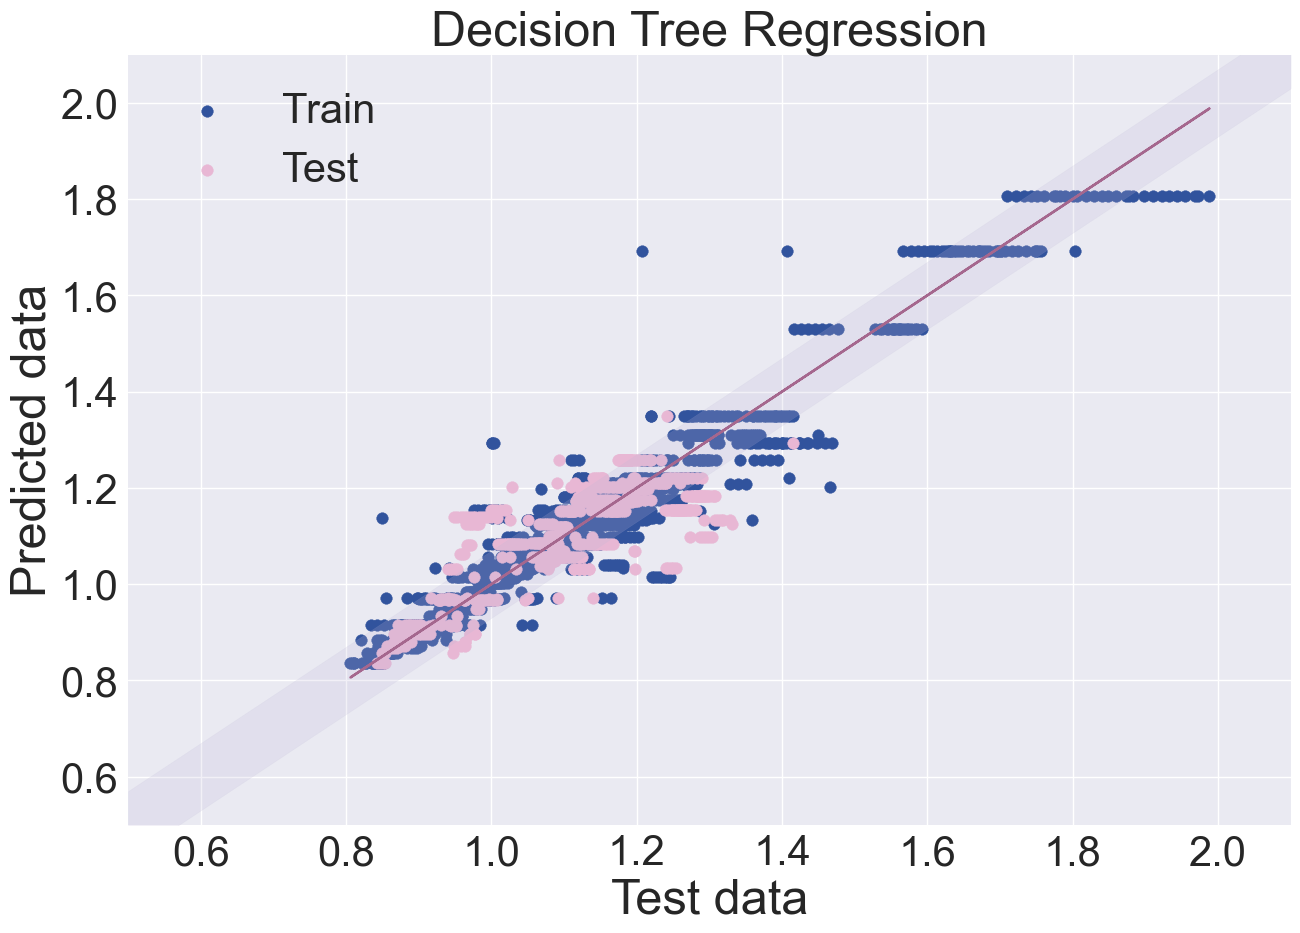

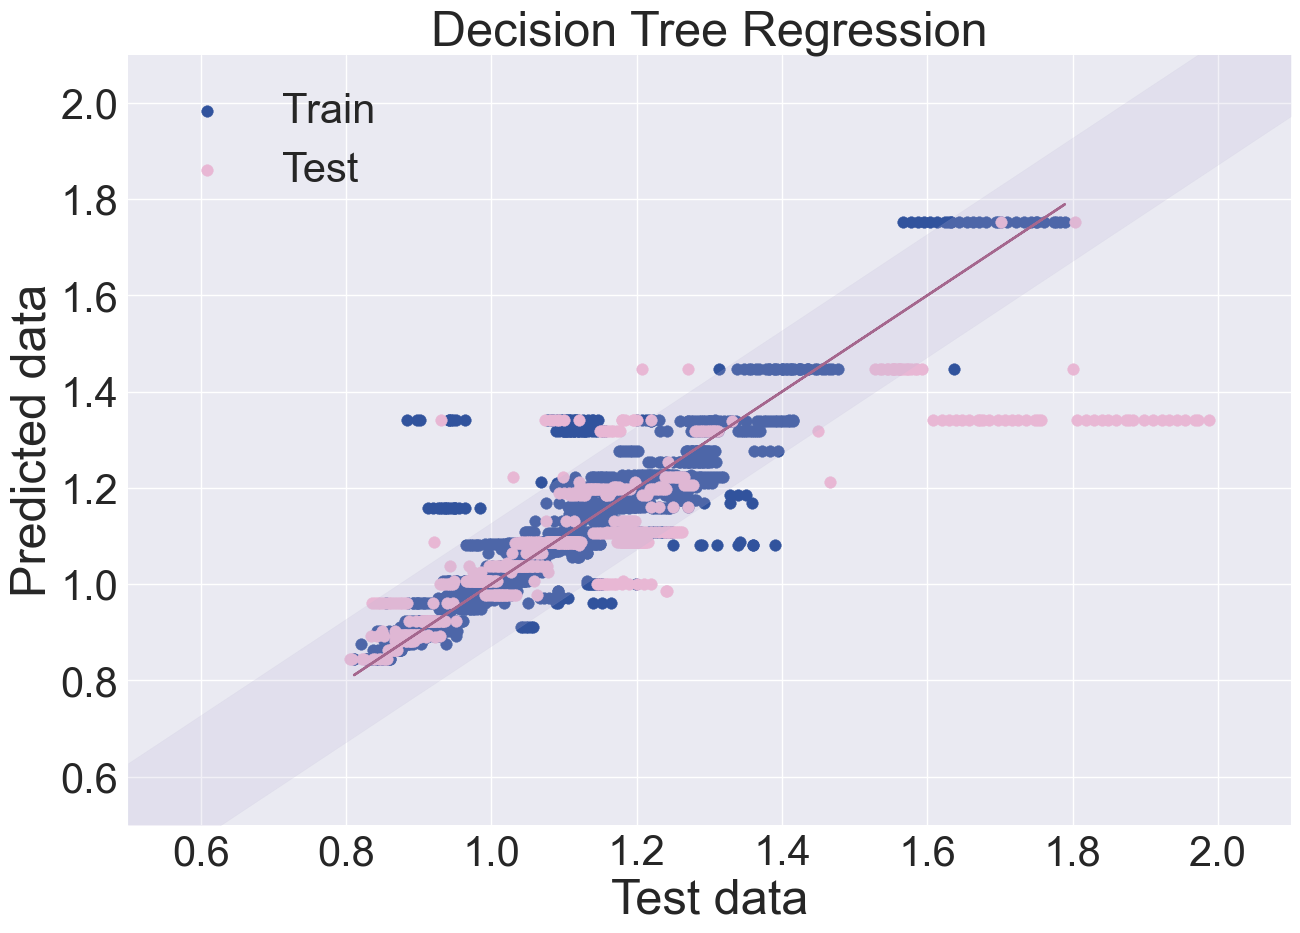

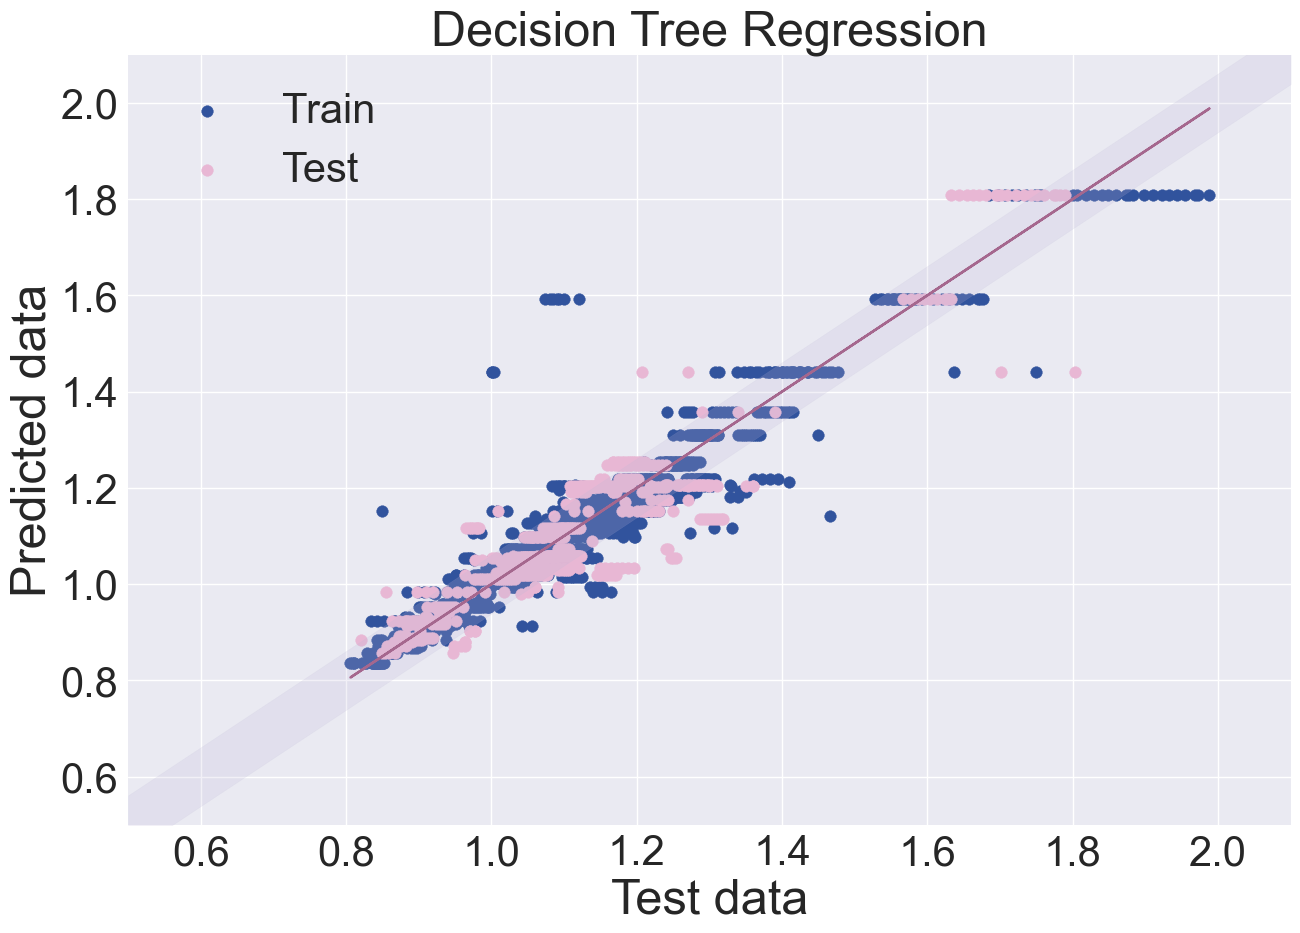

In [78]:
count = 0
#Creating a table to check accuracy on different DES classes
DTR_df = x_model[:]
DTR_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #DTR
    regr_DTR = DecisionTreeRegressor(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
    regr_DTR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_DTR.predict(x_test_mod)
    y1_pred = regr_DTR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    DTR_df['Density_train' + str(count)] = None
    DTR_df['Density_test' + str(count)] = None
    DTR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    DTR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Decision Tree Regression' + str(count)] = regr_metrics(regr_DTR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Decision Tree Regression', fontsize=35)
df_error_train

In [79]:
df_error_DTR = metrics_class(DTR_df, 'Decision Tree Regressor')
df_error_DTR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Decision Tree Regressor0         2     I  0.967363        NaN    0.011694   
1   Decision Tree Regressor0         2   III  0.688236   0.002671    0.051604   
2   Decision Tree Regressor0         2    IV  0.692674   0.668598    0.035271   
3   Decision Tree Regressor0         2     V  0.909695   0.858787    0.042763   
4   Decision Tree Regressor0         3  None  0.363182   0.064208    0.252568   
5   Decision Tree Regressor1         2     I -1.779822        NaN    0.107921   
6   Decision Tree Regressor1         2   III  0.767965   0.402834    0.043912   
7   Decision Tree Regressor1         2    IV  0.166748   -4.98892    0.128062   
8   Decision Tree Regressor1         2     V  0.935471   0.795196    0.035385   
9   Decision Tree Regressor1         3  None  0.962607   0.977953    0.052543   
10  Decision Tree Regressor2         2     I -1.404151       None    0.113107   
11  Decision Tree Regressor2         2   III  0.803915   0.424317    0.039798   
12  Decision Tree Regressor2         2    IV  0.527713       None    0.087440   
13  Decision Tree Regressor2         2     V  0.951310   0.558876    0.031281   
14  Decision Tree Regressor2         3  None  0.968280   0.785873    0.054464   
15  Decision Tree Regressor3         2     I  0.966256        NaN    0.012954   
16  Decision Tree Regressor3         2   III  0.693232    0.55663    0.052502   
17  Decision Tree Regressor3         2    IV  0.834888  -1.588952    0.038372   
18  Decision Tree Regressor3         2     V  0.941628   0.808209    0.033812   
19  Decision Tree Regressor3         3  None  0.565102   0.112013    0.171816   
20  Decision Tree Regressor4         2     I -5.193292  -3.679449    0.180247   
21  Decision Tree Regressor4         2   III  0.841872    0.61433    0.037314   
22  Decision Tree Regressor4         2    IV  0.915126 -42.211231    0.036582   
23  Decision Tree Regressor4         2     V  0.959777   0.770176    0.028234   
24  Decision Tree Regressor4         3  None  0.829137   0.826299    0.108032   

   RMSE_test  
0   0.011595  
1   0.086291  
2   0.104961  
3   0.042636  
4   0.206049  
5    0.31831  
6    0.07565  
7   0.079246  
8   0.061328  
9   0.018477  
10      None  
11  0.072688  
12      None  
13  0.078229  
14  0.031796  
15  0.176188  
16   0.05124  
17  0.123837  
18  0.057191  
19  0.259035  
20  0.129792  
21  0.053932  
22  0.170912  
23  0.059036  
24  0.107786

### 3.2. Random Forest Regression
Random forest  is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression problems, the average value or the averaged forecast of individual trees is returned.

In [80]:
#We optimize for RFR
regr_RFR = RandomForestRegressor()

search_space = {"n_estimators": Integer(50,400),
    "criterion": Categorical(['squared_error', 'absolute_error']),
    "min_samples_split": Real(0.01, 0.6),
    "min_samples_leaf": Real(0.01, 0.5),
    "max_depth": Integer(1, 12),
    "max_features": Integer(3, 24)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_RFR = BayesSearchCV(estimator = regr_RFR, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_RFR.fit(x_train01, y_model, sample_weight=sample_weight)

n_esti = opt_RFR.best_estimator_.n_estimators
criterion = opt_RFR.best_estimator_.criterion
min_leaf = opt_RFR.best_estimator_.min_samples_leaf
min_split = opt_RFR.best_estimator_.min_samples_split
depth = opt_RFR.best_estimator_.max_depth
max_feat = opt_RFR.best_estimator_.max_features

print('n_esti:', n_esti,'depth:', depth, 'criterion:', criterion, 'min_leaf:', min_leaf,'min_split:', min_split,'max_feat:', max_feat)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.7272711391912878
MAE_test: 0.062509107194647
MSE_test: 0.009966767929210646
RMSE_test: 0.09983370136988133
r2_train: 0.8580387855799088
MAE_train: 0.029557094136089458
MSE_train: 0.0032954420533358505
RMSE_train: 0.0574059409237045



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8527302816090804
MAE_test: 0.040433998968554215
MSE_test: 0.0027866364212767044
RMSE_test: 0.05278860124379793
r2_train: 0.9378033033490194
MAE_train: 0.025107782753091487
MSE_train: 0.001685592515968614
RMSE_train: 0.04105596809196702



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6441631576884931
MAE_test: 0.05031344177124718
MSE_test: 0.004680985913429563
RMSE_test: 0.06841773098714662
r2_train: 0.9428505453424972
MAE_train: 0.024243847917214654
MSE_train: 0.0016611795802351512
RMSE_train: 0.0407575708333452



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8789156220040999
MAE_test: 0.04315717346208541
MSE_test: 0.00565673094607993
RMSE_test: 0.07521124215222037
r2_train: 0.8790855435749829
MAE_train: 0.027229363591986005
MSE_train: 0.002427032433240514
RMSE_train: 0.04926492091986461
r2_test: 0.8492321268233755
MAE_test: 0.04445338006971261
MSE_test: 0.0037030973955568484
RMSE_test: 0.06085308041140439
r2_train: 0.9344120651267188
MAE_train: 0.0246193293183437
MSE_train: 0.0017325676859433765
RMSE_train: 0.04162412384595472



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.826998                   0.913975   
1                   0.649775                   0.847995   
2                   0.058928                   0.047670   
3                   0.127912                   0.061102   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.858039                   0.937803   
1                   0.727271                   0.852730   
2                   0.057406                   0.041056   
3                   0.099834                   0.052789   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.942851                   0.879086   
1                   0.644163                   0.878916   
2                   0.040758                   0.049265   
3                   0.068418                   0.075211   

   Random Forest Regression4  
0                   0.934412  
1                   0.849232  
2                   0.041624  
3                   0.060853

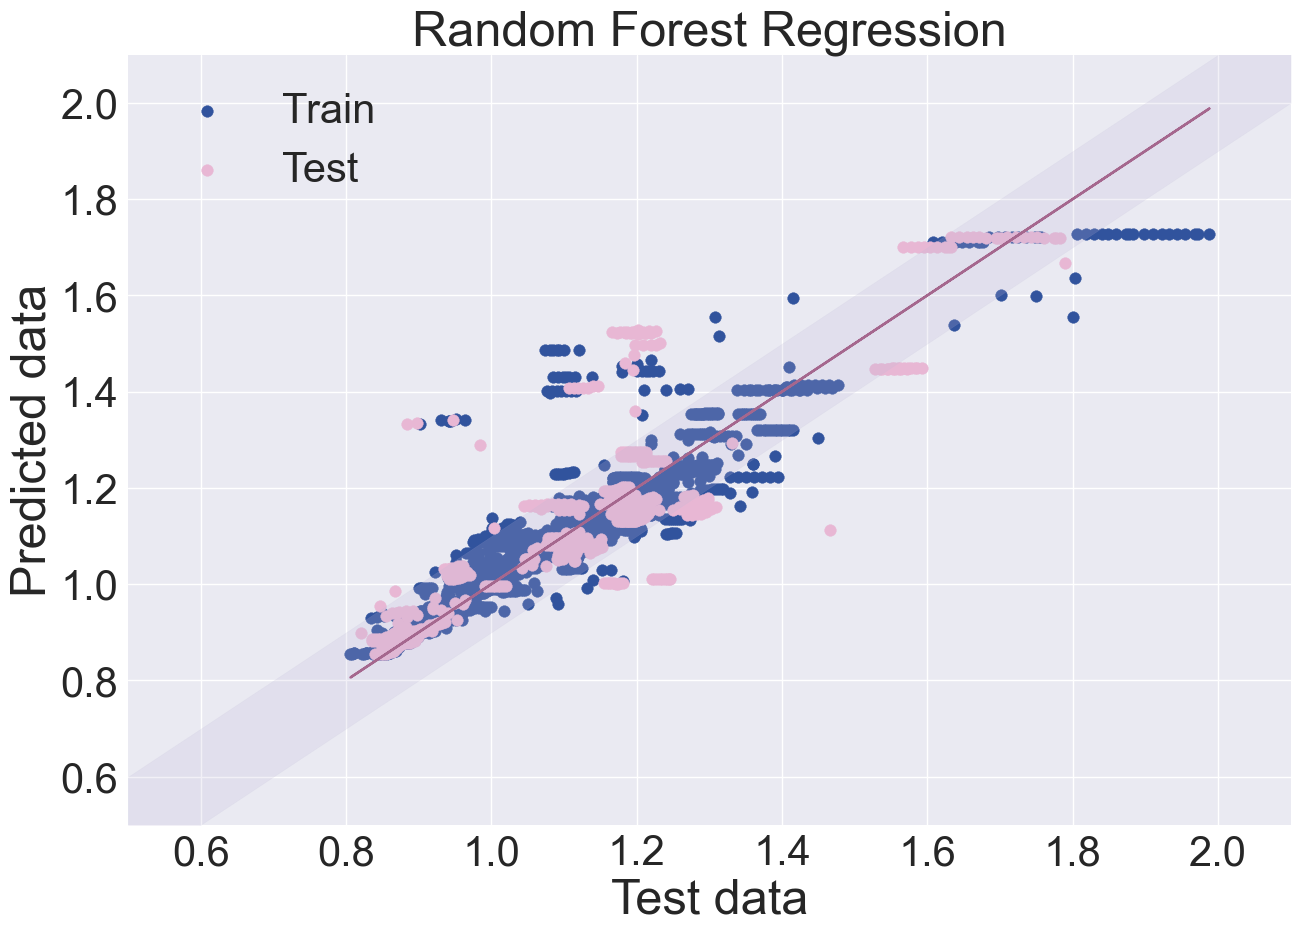

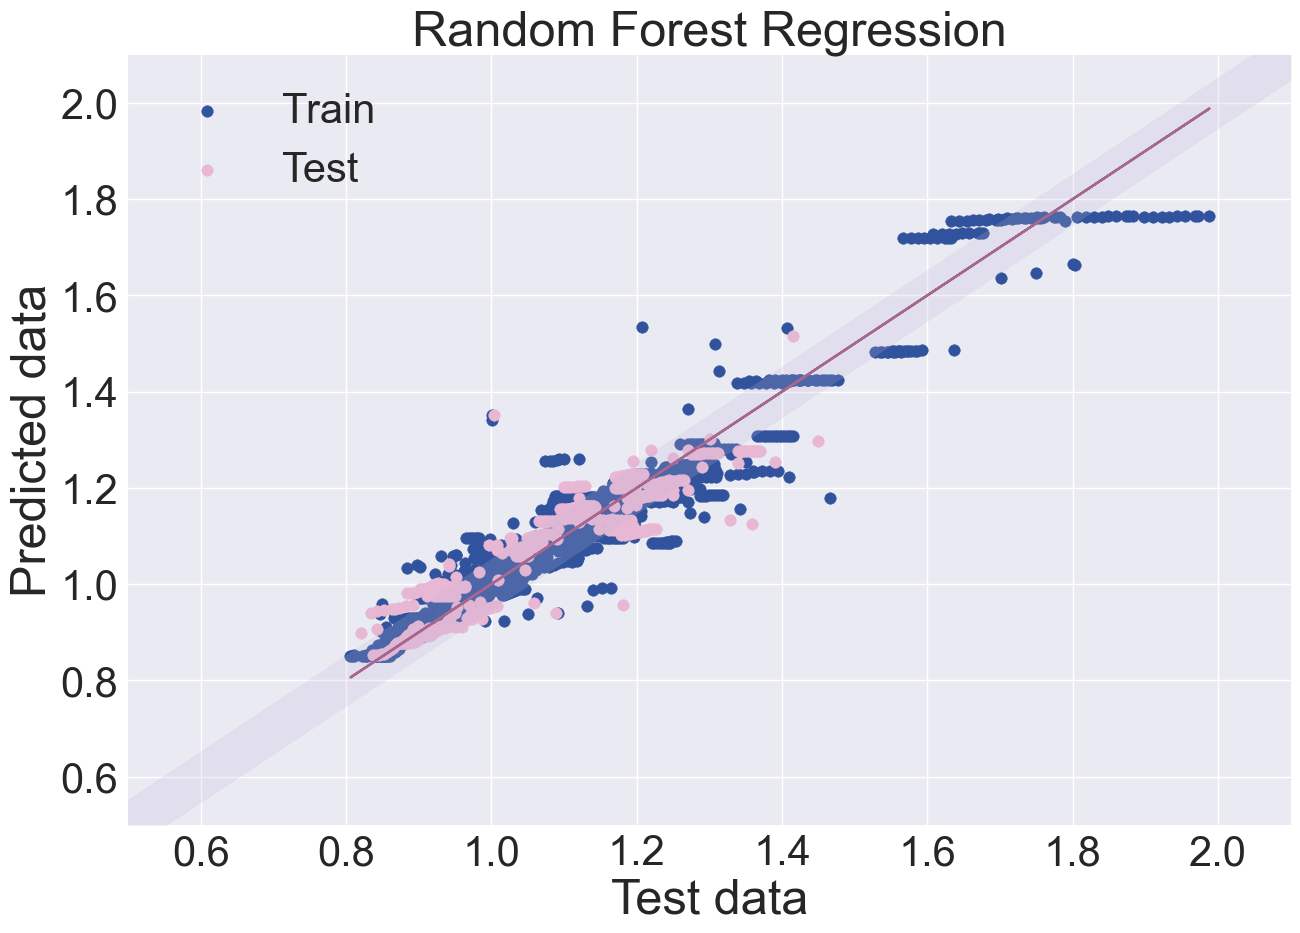

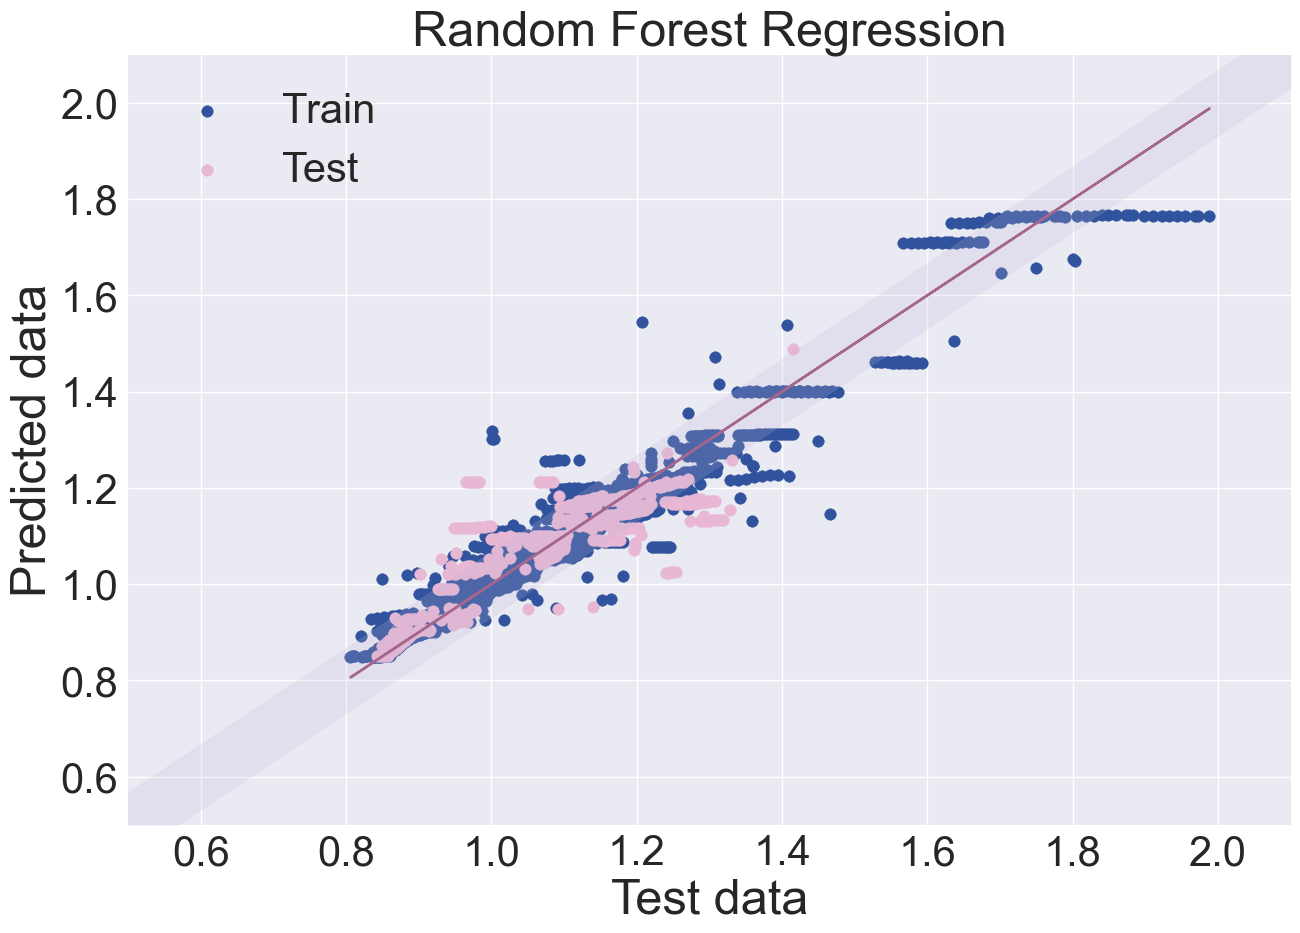

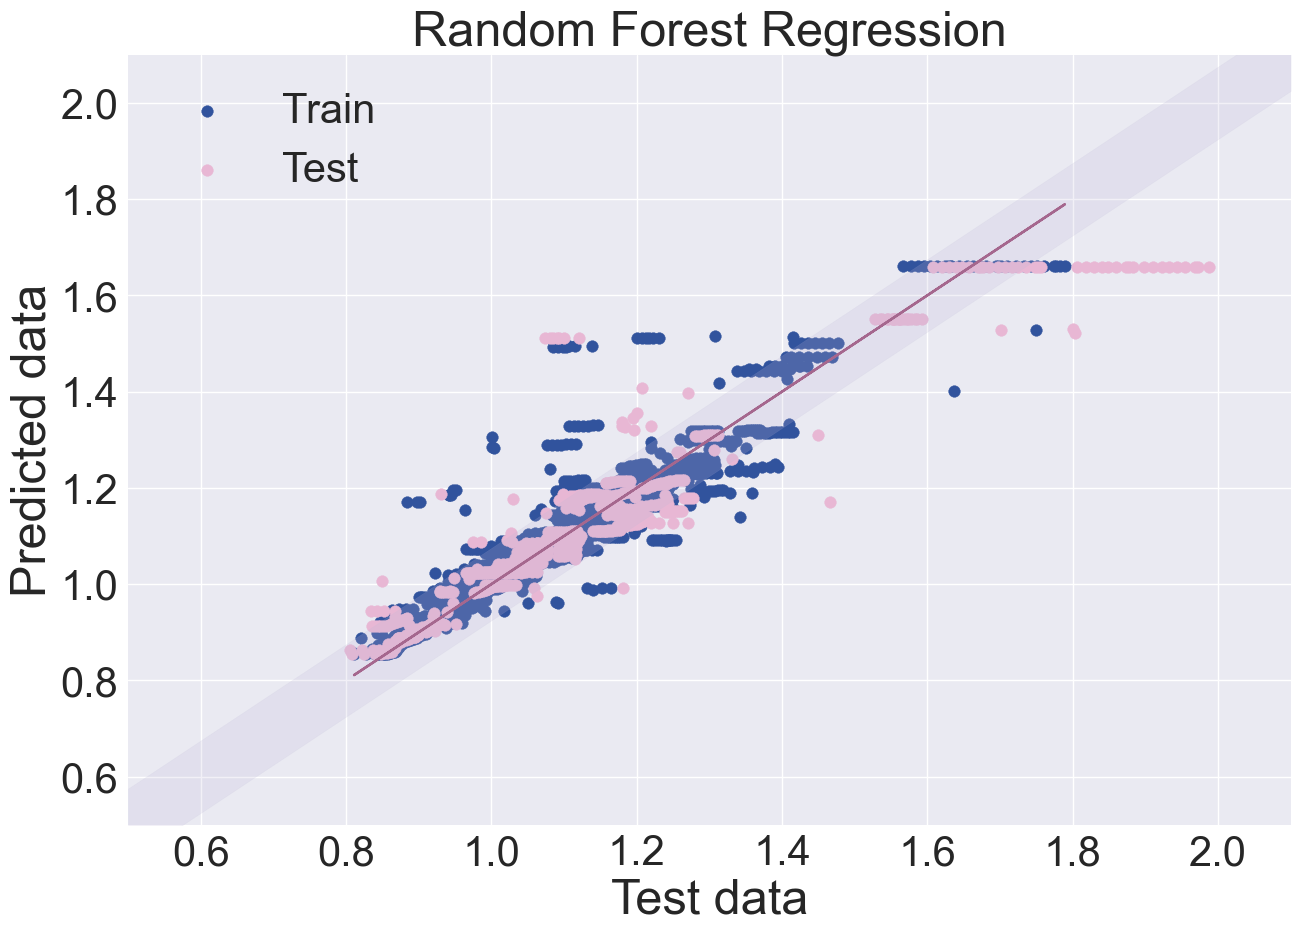

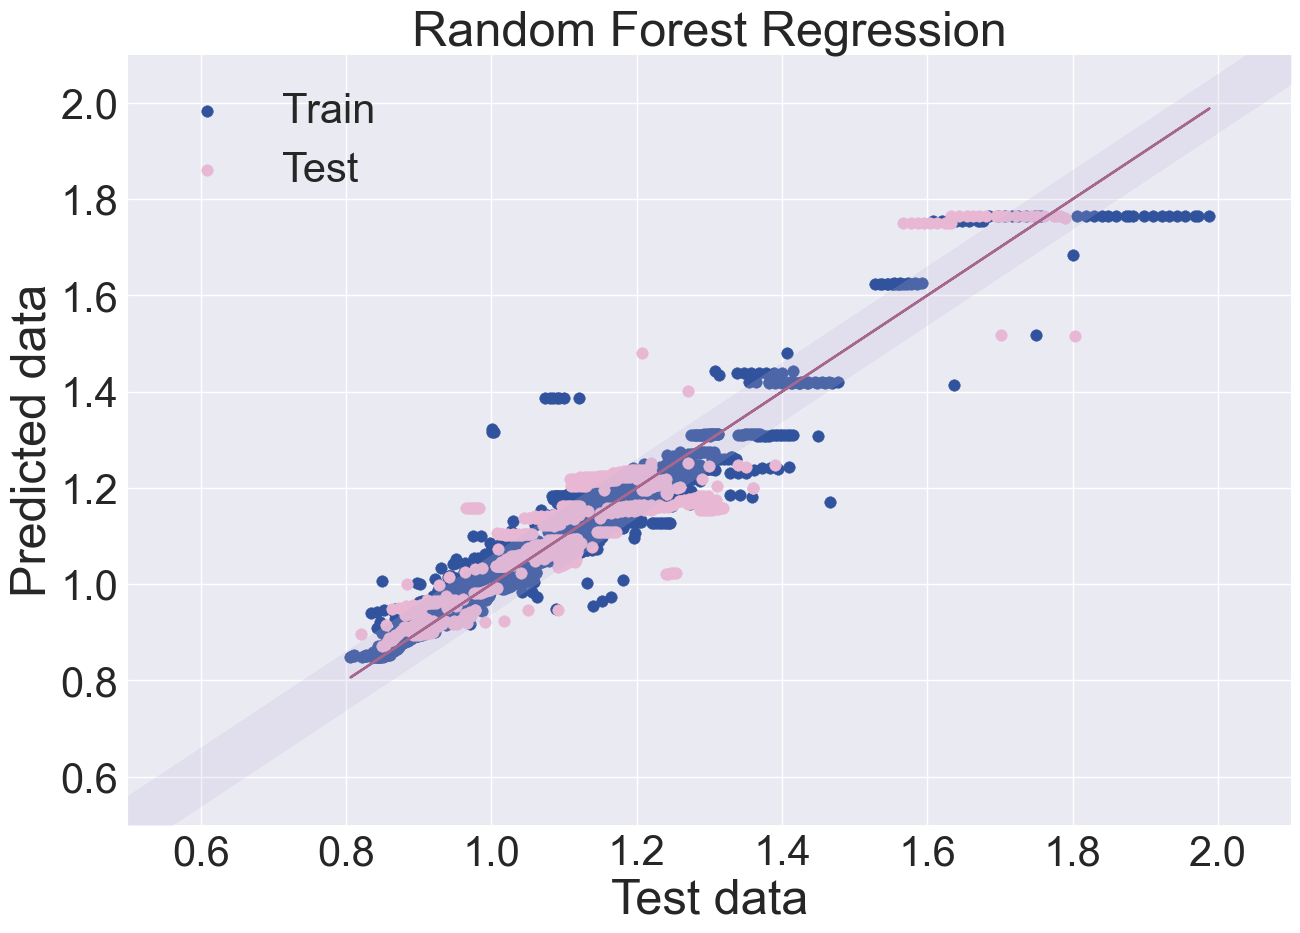

In [81]:
count = 0
#Creating a table to check accuracy on different DES classes
RFR_df = x_model[:]
RFR_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Random Forest Regression
    regr_RFR = RandomForestRegressor(n_estimators=n_esti, max_depth=depth, min_samples_leaf=min_leaf, 
                                 min_samples_split=min_split, criterion=criterion, max_features=max_feat)
    regr_RFR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_RFR.predict(x_test_mod)
    y1_pred = regr_RFR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    RFR_df['Density_train' + str(count)] = None
    RFR_df['Density_test' + str(count)] = None
    RFR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    RFR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Random Forest Regression' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Random Forest Regression', fontsize=35)
df_error_train

In [82]:
df_error_RFR = metrics_class(RFR_df, 'Random Forest Regression')
df_error_RFR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  \
0   Random Forest Regression0         2     I  0.575517        NaN   
1   Random Forest Regression0         2   III  0.837354   0.266246   
2   Random Forest Regression0         2    IV  0.544272   0.726974   
3   Random Forest Regression0         2     V  0.948643   0.920278   
4   Random Forest Regression0         3  None  0.585989   0.260703   
5   Random Forest Regression1         2     I -2.171449        NaN   
6   Random Forest Regression1         2   III  0.852561   0.672559   
7   Random Forest Regression1         2    IV  0.804578  -2.277086   
8   Random Forest Regression1         2     V  0.944263   0.914463   
9   Random Forest Regression1         3  None  0.930604   0.823021   
10  Random Forest Regression2         2     I -1.775109       None   
11  Random Forest Regression2         2   III  0.853676   0.535934   
12  Random Forest Regression2         2    IV  0.749279       None   
13  Random Forest Regression2         2     V  0.956676   0.436752   
14  Random Forest Regression2         3  None  0.931173   0.553006   
15  Random Forest Regression3         2     I -1.691224        NaN   
16  Random Forest Regression3         2   III  0.856622   0.699086   
17  Random Forest Regression3         2    IV  0.759561   0.618126   
18  Random Forest Regression3         2     V  0.955859   0.899203   
19  Random Forest Regression3         3  None  0.603650   0.726207   
20  Random Forest Regression4         2     I -2.226824   -1.44567   
21  Random Forest Regression4         2   III  0.866018   0.588738   
22  Random Forest Regression4         2    IV  0.877300 -55.126642   
23  Random Forest Regression4         2     V  0.954531   0.759643   
24  Random Forest Regression4         3  None  0.893743   0.869181   

    RMSE_train RMSE_test  
0     0.042172  0.112536  
1     0.037273  0.074015  
2     0.042951  0.095269  
3     0.032249  0.032035  
4     0.203647  0.183143  
5     0.115273  0.346624  
6     0.035003  0.056018  
7     0.062018   0.05862  
8     0.032886  0.039634  
9     0.071579  0.052349  
10    0.121521      None  
11    0.034379  0.065262  
12    0.063709      None  
13    0.029507  0.088397  
14    0.080228   0.04594  
15    0.115690  0.127449  
16    0.035893  0.042213  
17    0.046305  0.047561  
18    0.029403   0.04146  
19    0.164025  0.143836  
20    0.130106  0.093832  
21    0.034347  0.055692  
22    0.043985  0.194786  
23    0.030019  0.060373  
24    0.085194   0.09354

**Output:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [83]:
#We optimize for GBR
regr_GBR = GradientBoostingRegressor()

search_space = {"learning_rate": Real(0.05, 0.15),
    "n_estimators": Integer(50, 400),
    "max_depth": Integer(1, 6),
    "min_samples_leaf": Real(0.05, 0.5),
    "min_samples_split": Real(0.02, 0.6)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)

sample_w = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_GBR = BayesSearchCV(estimator = regr_GBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_GBR.fit(x_train01, y_model, sample_weight=sample_w)

learning_rate = opt_GBR.best_estimator_.learning_rate
n_estimators = opt_GBR.best_estimator_.n_estimators
max_depth = opt_GBR.best_estimator_.max_depth
min_samples_leaf = opt_GBR.best_estimator_.min_samples_leaf
min_samples_split = opt_GBR.best_estimator_.min_samples_split

print('learning_rate:', learning_rate,'n_estimators:', n_estimators, 'max_depth:', max_depth, 'min_samples_leaf:', min_samples_leaf,'min_samples_split:', min_samples_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
learning_rate: 0.15 n_estimators: 400 max_depth: 5 min_samples_leaf: 0.05 min_samples_split: 0.6



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.7800501218066714
MAE_test: 0.06706947980521809
MSE_test: 0.008037980965823133
RMSE_test: 0.08965478774623882
r2_train: 0.9008988616802378
MAE_train: 0.03193609986120573
MSE_train: 0.0023005020074425165
RMSE_train: 0.0479635487369577



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8020556720440163
MAE_test: 0.04450070466203833
MSE_test: 0.003745500973955114
RMSE_test: 0.06120049815120065
r2_train: 0.9545184543647008
MAE_train: 0.022626126904077372
MSE_train: 0.0012325952512839194
RMSE_train: 0.035108335923024314



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6451093097808945
MAE_test: 0.04564109615773352
MSE_test: 0.004668539409611345
RMSE_test: 0.06832671080632628
r2_train: 0.9561125290600612
MAE_train: 0.02350204839877682
MSE_train: 0.0012756896980121717
RMSE_train: 0.03571679854091309



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8112567613635786
MAE_test: 0.05864880238177219
MSE_test: 0.008817567852511454
RMSE_test: 0.09390190547859747
r2_train: 0.9277674845411306
MAE_train: 0.02319503303011227
MSE_train: 0.0014498734306591262
RMSE_train: 0.03807720355618472
r2_test: 0.8552976357194219
MAE_test: 0.044424534536000135
MSE_test: 0.0035541189048318173
RMSE_test: 0.05961643150031556
r2_train: 0.9629503802726634
MAE_train: 0.020782197771211205
MSE_train: 0.0009787009461434252
RMSE_train: 0.03128419642796384



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.826998                   0.913975   
1                   0.649775                   0.847995   
2                   0.058928                   0.047670   
3                   0.127912                   0.061102   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.858039                   0.937803   
1                   0.727271                   0.852730   
2                   0.057406                   0.041056   
3                   0.099834                   0.052789   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.942851                   0.879086   
1                   0.644163                   0.878916   
2                   0.040758                   0.049265   
3                   0.068418                   0.075211   

   Random Forest Regression4  Gradient Boosting Regression0  \
0                   0.934412                       0.900899   
1                   0.849232                       0.780050   
2                   0.041624                       0.047964   
3                   0.060853                       0.089655   

   Gradient Boosting Regression1  Gradient Boosting Regression2  \
0                       0.954518                       0.956113   
1                       0.802056                       0.645109   
2                       0.035108                       0.035717   
3                       0.061200                       0.068327   

   Gradient Boosting Regression3  Gradient Boosting Regression4  
0                       0.927767                       0.962950  
1                       0.811257                       0.855298  
2                       0.038077                       0.031284  
3                       0.093902                       0.059616

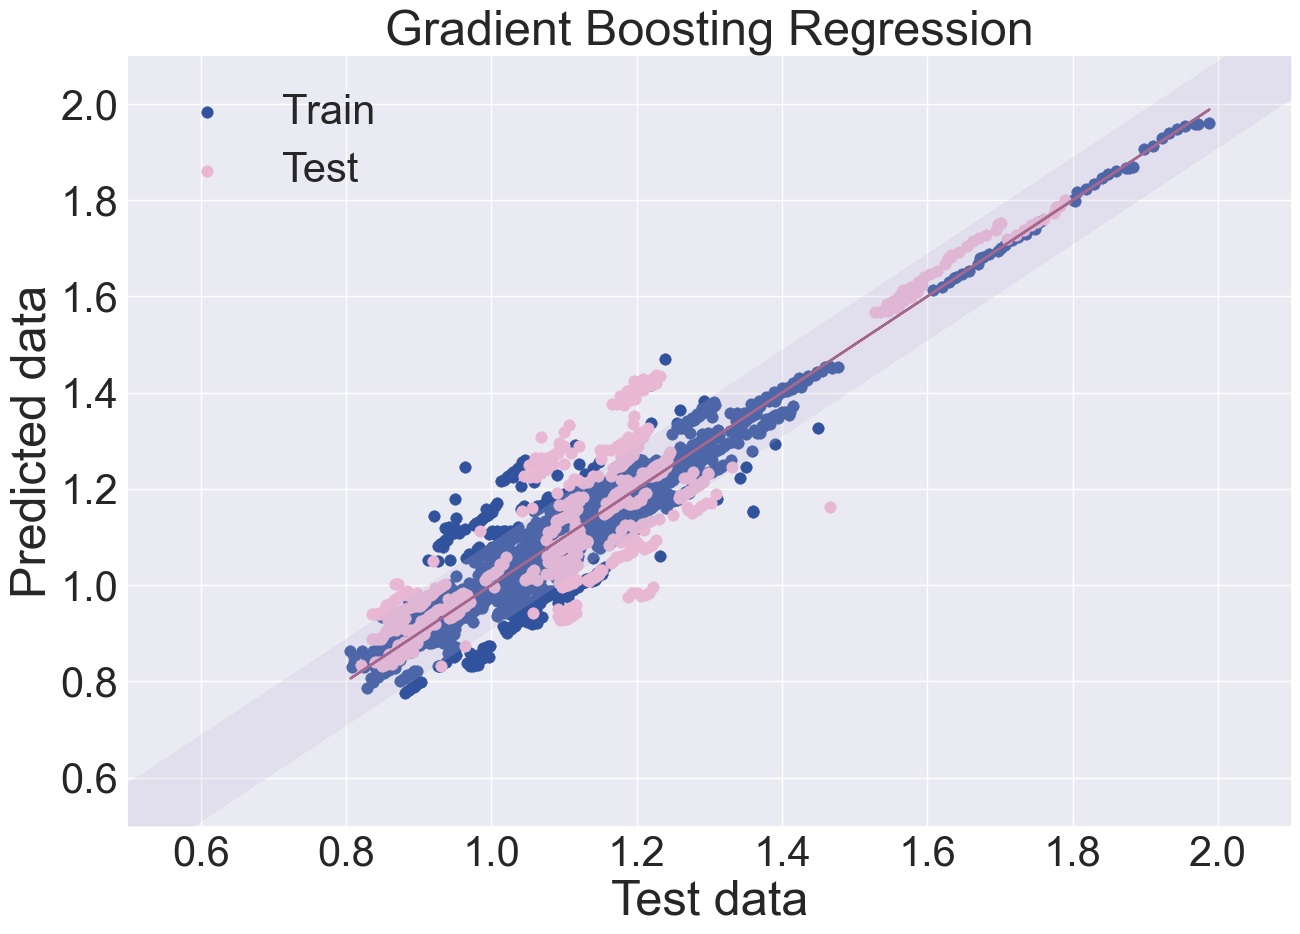

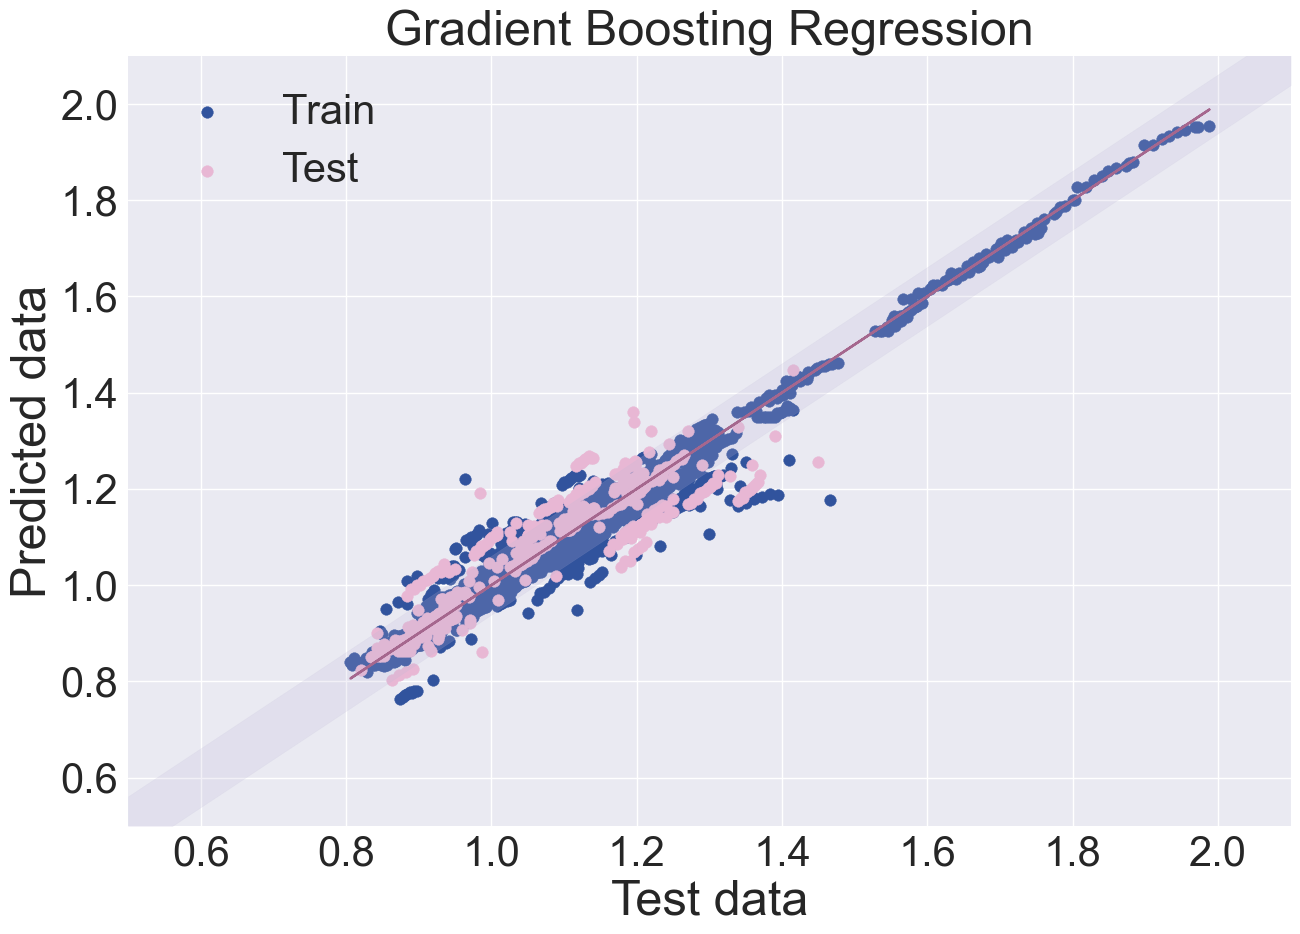

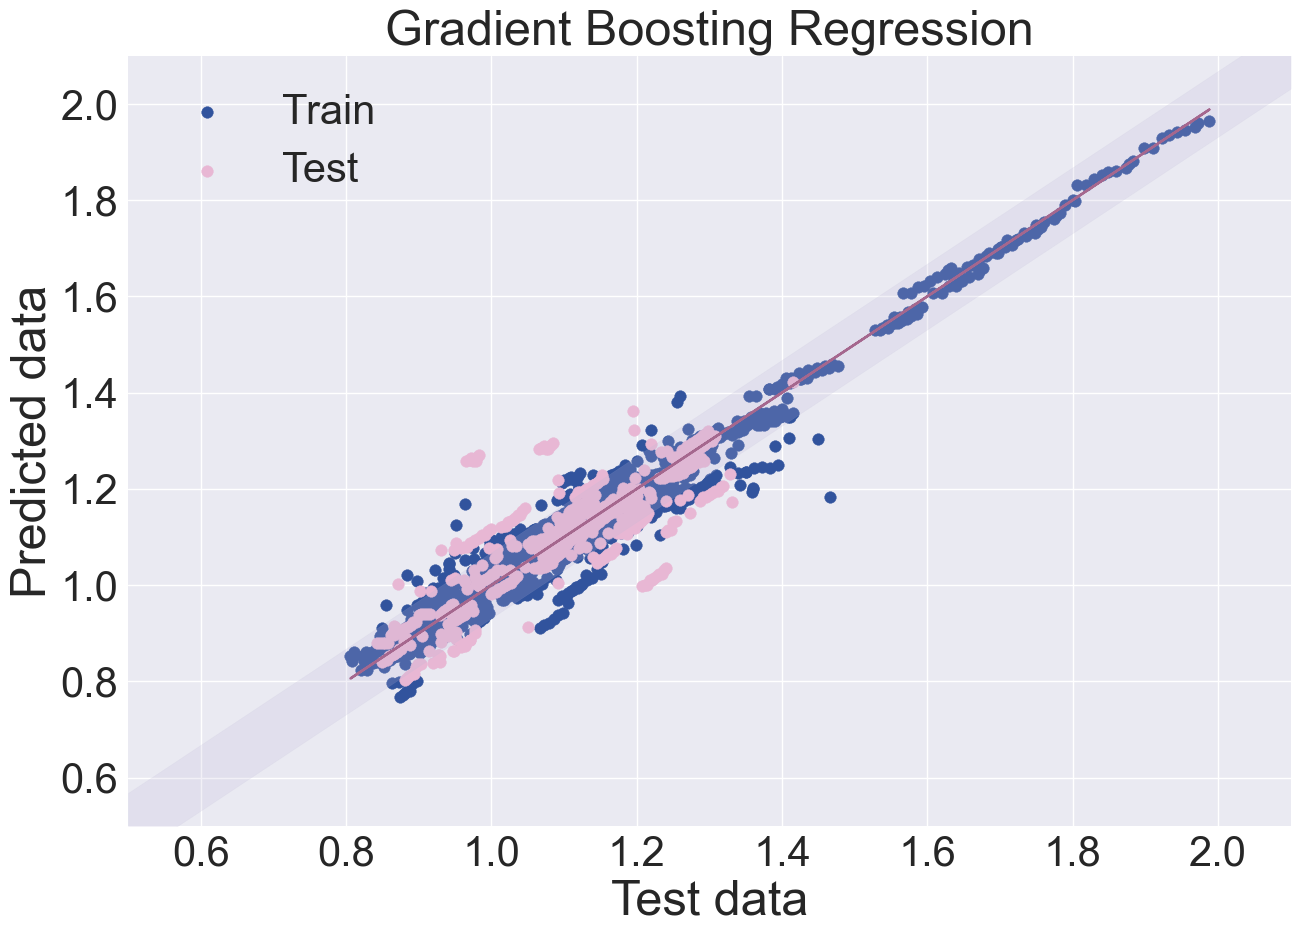

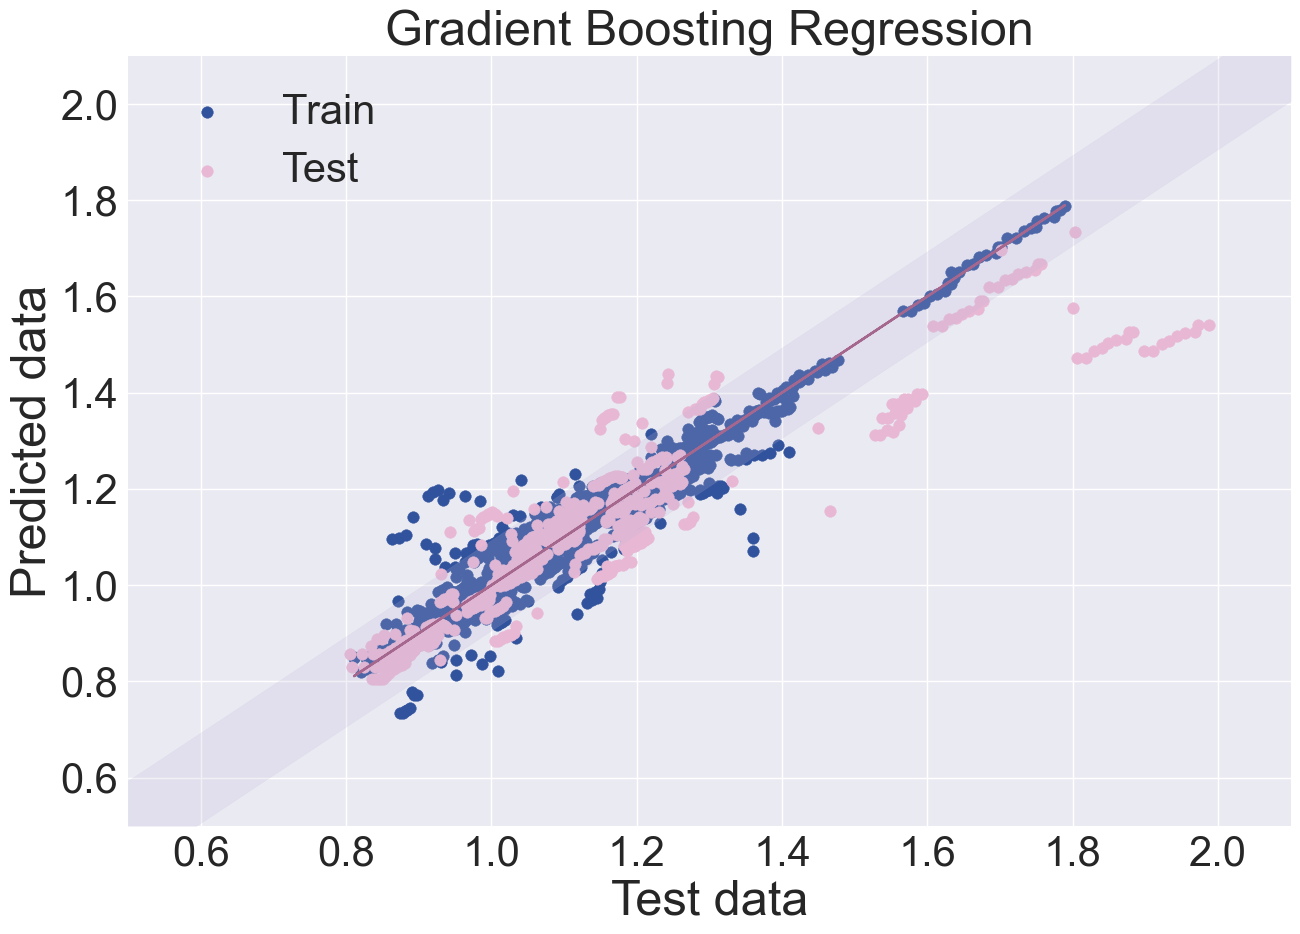

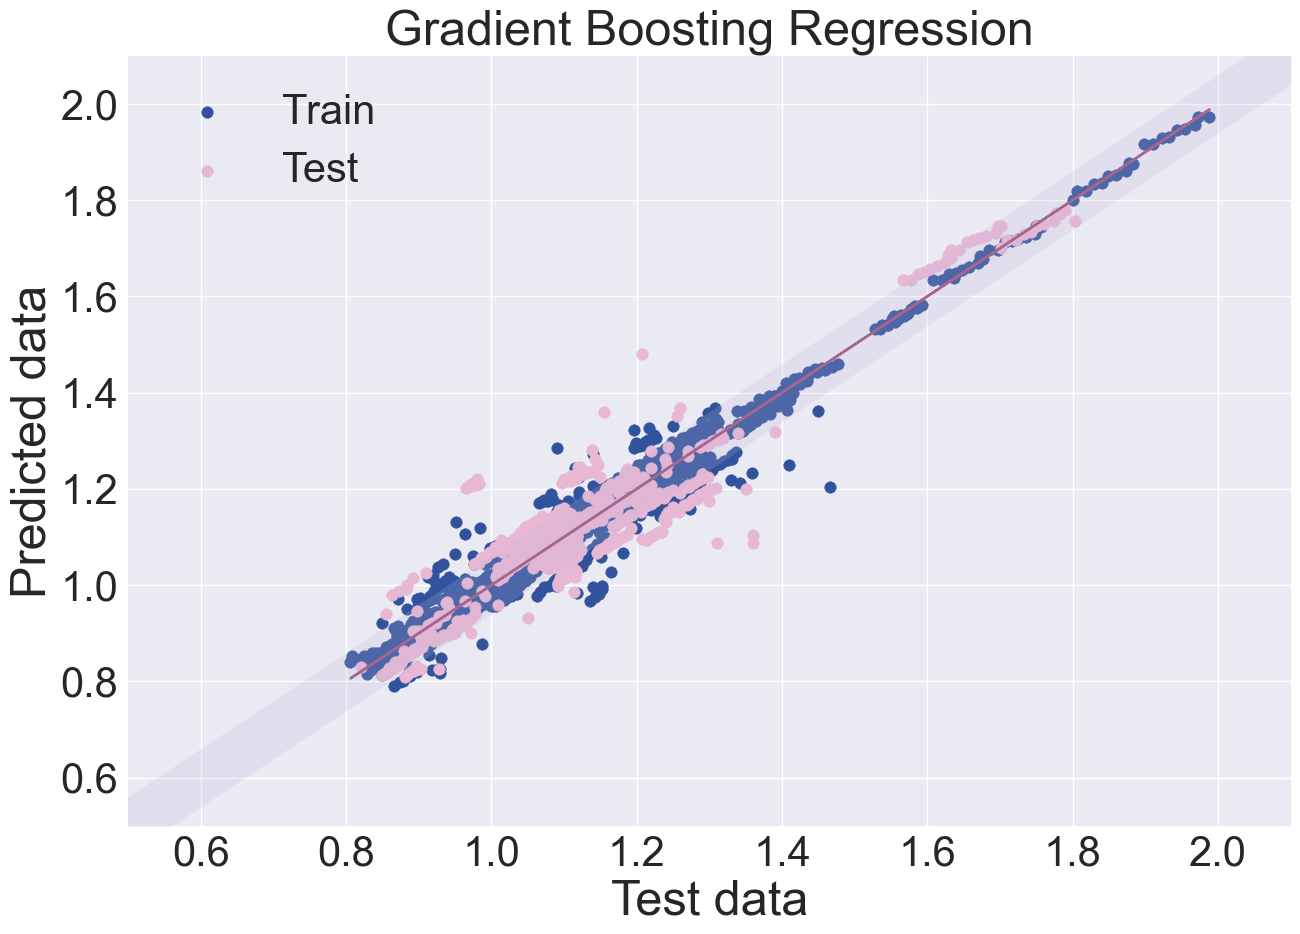

In [84]:
count = 0
#Creating a table to check accuracy on different DES classes
GBR_df = x_model[:]
GBR_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #GBR
    regr_GBR = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators, max_depth= max_depth, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split)
    regr_GBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_GBR.predict(x_test_mod)
    y1_pred = regr_GBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    GBR_df['Density_train' + str(count)] = None
    GBR_df['Density_test' + str(count)] = None
    GBR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    GBR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Gradient Boosting Regression' + str(count)] = regr_metrics(regr_GBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Gradient Boosting Regression', fontsize=35)
df_error_train

In [85]:
df_error_GBR = metrics_class(GBR_df, 'Gradient Boosting Regression')
df_error_GBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  \
0   Gradient Boosting Regression0         2     I  0.989857        NaN   
1   Gradient Boosting Regression0         2   III  0.657667  -0.252802   
2   Gradient Boosting Regression0         2    IV  0.968464   0.978775   
3   Gradient Boosting Regression0         2     V  0.949639   0.730123   
4   Gradient Boosting Regression0         3  None  0.984505   0.698767   
5   Gradient Boosting Regression1         2     I  0.967090        NaN   
6   Gradient Boosting Regression1         2   III  0.818678   0.636027   
7   Gradient Boosting Regression1         2    IV  0.993218 -15.221661   
8   Gradient Boosting Regression1         2     V  0.960720   0.884052   
9   Gradient Boosting Regression1         3  None  0.988181   0.448242   
10  Gradient Boosting Regression2         2     I  0.972779       None   
11  Gradient Boosting Regression2         2   III  0.802700   0.809306   
12  Gradient Boosting Regression2         2    IV  0.982342       None   
13  Gradient Boosting Regression2         2     V  0.964549   0.254385   
14  Gradient Boosting Regression2         3  None  0.986729  -1.368359   
15  Gradient Boosting Regression3         2     I  0.990516        NaN   
16  Gradient Boosting Regression3         2   III  0.799986   0.585435   
17  Gradient Boosting Regression3         2    IV  0.987302  -5.576421   
18  Gradient Boosting Regression3         2     V  0.966157   0.828047   
19  Gradient Boosting Regression3         3  None  0.972833   0.633667   
20  Gradient Boosting Regression4         2     I  0.991069   0.238582   
21  Gradient Boosting Regression4         2   III  0.872621   0.599777   
22  Gradient Boosting Regression4         2    IV  0.989659 -84.875697   
23  Gradient Boosting Regression4         2     V  0.956944   0.705929   
24  Gradient Boosting Regression4         3  None  0.987778   0.922024   

    RMSE_train RMSE_test  
0     0.006519  0.008501  
1     0.054075  0.096714  
2     0.011299  0.026563  
3     0.031935  0.058941  
4     0.039397  0.116905  
5     0.011743  0.005028  
6     0.038818   0.05906  
7     0.011553  0.130422  
8     0.027608  0.046144  
9     0.029541  0.092432  
10    0.012036      None  
11    0.039921  0.041835  
12    0.016907      None  
13    0.026691  0.101706  
14    0.035229  0.105747  
15    0.006868  0.089202  
16    0.042394  0.049548  
17    0.010641  0.197371  
18    0.025746  0.054152  
19    0.042943  0.166377  
20    0.006845  0.052356  
21    0.033490   0.05494  
22    0.012769   0.24094  
23    0.029211   0.06678  
24    0.028893  0.072218

### 4.2. Cat Boosting Regression
CatBoost is a gradient boosting library. She uses oblivious decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree.

In [86]:
#We optimize for CBR
regr_CBR = CatBoostRegressor()

search_space = {"iterations": Integer(100, 600), 
                "learning_rate": Real(0.05, 0.4),
                "depth": Integer(1, 6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_CBR = BayesSearchCV(estimator = regr_CBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_CBR.fit(x_train01, y_model, sample_weight=sample_weight)

iterations = opt_CBR.best_params_['iterations']
learning_rate = opt_CBR.best_params_['learning_rate']
depth = opt_CBR.best_params_['depth']


print('iterations:', iterations,'learning_rate:', learning_rate, 'depth:', depth)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.2631265	total: 1.69ms	remaining: 1.01s
1:	learn: 0.2516520	total: 2.9ms	remaining: 867ms
2:	learn: 0.2408380	total: 4.01ms	remaining: 798ms
3:	learn: 0.2316324	total: 5.11ms	remaining: 762ms
4:	learn: 0.2226449	total: 6.16ms	remaining: 733ms
5:	learn: 0.2145393	total: 7.28ms	remaining: 721ms
6:	learn: 0.2063377	total: 8.42ms	remaining: 713ms
7:	learn: 0.1985106	total: 9.49ms	remaining: 702ms
8:	learn: 0.1915457	total: 10.5ms	remaining: 691ms
9:	learn: 0.1841624	total: 11.6ms	remaining: 683ms
10:	learn: 0.1764754	total: 12.6ms	remaining: 676ms
11:	learn: 0.1702612	total: 13.8ms	remaining: 678ms
12:	learn: 0.1636598	total: 14.8ms	remaining: 670ms
13:	learn: 0.1574100	total: 15.9ms	remaining: 666ms
14:	learn: 0.1517773	total: 17ms	remaining: 663ms
15:	learn: 0.1467964	total: 18.1ms	remaining: 659ms
16:	learn: 0.1423711	total: 19.2ms	remaining: 657ms
17:	learn: 0.1374000	total: 20.3ms	remaining: 657ms
18:	learn: 0.13310

0:	learn: 0.2870487	total: 1.59ms	remaining: 950ms
1:	learn: 0.2743855	total: 2.72ms	remaining: 813ms
2:	learn: 0.2622436	total: 3.89ms	remaining: 774ms
3:	learn: 0.2523434	total: 5ms	remaining: 745ms
4:	learn: 0.2423522	total: 6.23ms	remaining: 742ms
5:	learn: 0.2338326	total: 7.39ms	remaining: 732ms
6:	learn: 0.2237337	total: 8.53ms	remaining: 723ms
7:	learn: 0.2164373	total: 9.61ms	remaining: 711ms
8:	learn: 0.2072352	total: 10.6ms	remaining: 698ms
9:	learn: 0.1997387	total: 11.9ms	remaining: 701ms
10:	learn: 0.1951467	total: 13.1ms	remaining: 703ms
11:	learn: 0.1873368	total: 14.2ms	remaining: 697ms
12:	learn: 0.1813714	total: 15.4ms	remaining: 696ms
13:	learn: 0.1755395	total: 16.7ms	remaining: 697ms
14:	learn: 0.1688793	total: 17.9ms	remaining: 700ms
15:	learn: 0.1642113	total: 19.1ms	remaining: 698ms
16:	learn: 0.1580387	total: 20.3ms	remaining: 697ms
17:	learn: 0.1520514	total: 21.2ms	remaining: 685ms
18:	learn: 0.1473982	total: 22.4ms	remaining: 685ms
19:	learn: 0.1419883	tota


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


64:	learn: 0.0472943	total: 83.6ms	remaining: 688ms
65:	learn: 0.0466314	total: 85.1ms	remaining: 689ms
66:	learn: 0.0459232	total: 86.5ms	remaining: 688ms
67:	learn: 0.0453632	total: 88ms	remaining: 689ms
68:	learn: 0.0444548	total: 89.6ms	remaining: 690ms
69:	learn: 0.0439640	total: 91.2ms	remaining: 691ms
70:	learn: 0.0434750	total: 92.6ms	remaining: 690ms
71:	learn: 0.0426030	total: 94.2ms	remaining: 691ms
72:	learn: 0.0419553	total: 95.7ms	remaining: 691ms
73:	learn: 0.0415730	total: 97.4ms	remaining: 692ms
74:	learn: 0.0411670	total: 99ms	remaining: 693ms
75:	learn: 0.0406351	total: 100ms	remaining: 692ms
76:	learn: 0.0402131	total: 102ms	remaining: 691ms
77:	learn: 0.0397534	total: 103ms	remaining: 690ms
78:	learn: 0.0393282	total: 105ms	remaining: 690ms
79:	learn: 0.0386726	total: 106ms	remaining: 690ms
80:	learn: 0.0382045	total: 108ms	remaining: 689ms
81:	learn: 0.0377978	total: 109ms	remaining: 689ms
82:	learn: 0.0372483	total: 111ms	remaining: 689ms
83:	learn: 0.0366544	tot


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


54:	learn: 0.0488984	total: 73.2ms	remaining: 726ms
55:	learn: 0.0479450	total: 74.7ms	remaining: 726ms
56:	learn: 0.0470866	total: 76.1ms	remaining: 725ms
57:	learn: 0.0463493	total: 77.4ms	remaining: 723ms
58:	learn: 0.0454437	total: 78.7ms	remaining: 722ms
59:	learn: 0.0445230	total: 80.1ms	remaining: 721ms
60:	learn: 0.0437199	total: 81.5ms	remaining: 720ms
61:	learn: 0.0430428	total: 82.8ms	remaining: 718ms
62:	learn: 0.0423618	total: 84.1ms	remaining: 717ms
63:	learn: 0.0416968	total: 85.4ms	remaining: 715ms
64:	learn: 0.0409675	total: 87ms	remaining: 716ms
65:	learn: 0.0402230	total: 88.4ms	remaining: 715ms
66:	learn: 0.0397063	total: 89.9ms	remaining: 715ms
67:	learn: 0.0389871	total: 91.2ms	remaining: 713ms
68:	learn: 0.0384298	total: 92.5ms	remaining: 712ms
69:	learn: 0.0378549	total: 94ms	remaining: 712ms
70:	learn: 0.0374033	total: 95.3ms	remaining: 710ms
71:	learn: 0.0368088	total: 96.6ms	remaining: 708ms
72:	learn: 0.0363821	total: 97.9ms	remaining: 707ms
73:	learn: 0.035


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


43:	learn: 0.0601345	total: 55.1ms	remaining: 696ms
44:	learn: 0.0584094	total: 56.4ms	remaining: 695ms
45:	learn: 0.0568013	total: 57.6ms	remaining: 694ms
46:	learn: 0.0553015	total: 58.8ms	remaining: 692ms
47:	learn: 0.0539989	total: 60.1ms	remaining: 691ms
48:	learn: 0.0531064	total: 61.4ms	remaining: 691ms
49:	learn: 0.0522641	total: 63ms	remaining: 693ms
50:	learn: 0.0509605	total: 64.2ms	remaining: 691ms
51:	learn: 0.0496481	total: 65.3ms	remaining: 688ms
52:	learn: 0.0486753	total: 66.5ms	remaining: 686ms
53:	learn: 0.0476212	total: 67.9ms	remaining: 686ms
54:	learn: 0.0467554	total: 69ms	remaining: 684ms
55:	learn: 0.0458661	total: 70.5ms	remaining: 685ms
56:	learn: 0.0446987	total: 71.9ms	remaining: 685ms
57:	learn: 0.0438159	total: 73.1ms	remaining: 683ms
58:	learn: 0.0429998	total: 74.5ms	remaining: 683ms
59:	learn: 0.0422894	total: 75.7ms	remaining: 681ms
60:	learn: 0.0414987	total: 76.9ms	remaining: 680ms
61:	learn: 0.0409749	total: 78.1ms	remaining: 678ms
62:	learn: 0.040


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


37:	learn: 0.0654127	total: 45.6ms	remaining: 675ms
38:	learn: 0.0639295	total: 46.9ms	remaining: 675ms
39:	learn: 0.0623585	total: 48.1ms	remaining: 674ms
40:	learn: 0.0604245	total: 49.3ms	remaining: 672ms
41:	learn: 0.0587921	total: 50.5ms	remaining: 670ms
42:	learn: 0.0572026	total: 51.8ms	remaining: 670ms
43:	learn: 0.0557105	total: 53ms	remaining: 670ms
44:	learn: 0.0540638	total: 54.2ms	remaining: 668ms
45:	learn: 0.0524221	total: 55.4ms	remaining: 667ms
46:	learn: 0.0508908	total: 56.5ms	remaining: 665ms
47:	learn: 0.0501681	total: 57.4ms	remaining: 660ms
48:	learn: 0.0489381	total: 58.8ms	remaining: 661ms
49:	learn: 0.0482076	total: 60ms	remaining: 660ms
50:	learn: 0.0472889	total: 61.3ms	remaining: 659ms
51:	learn: 0.0461703	total: 62.4ms	remaining: 658ms
52:	learn: 0.0451655	total: 63.5ms	remaining: 656ms
53:	learn: 0.0440844	total: 64.9ms	remaining: 656ms
54:	learn: 0.0431040	total: 66ms	remaining: 654ms
55:	learn: 0.0421001	total: 67.3ms	remaining: 654ms
56:	learn: 0.04132


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


45:	learn: 0.0577604	total: 55.9ms	remaining: 674ms
46:	learn: 0.0561663	total: 57.5ms	remaining: 677ms
47:	learn: 0.0548310	total: 58.7ms	remaining: 675ms
48:	learn: 0.0533439	total: 60.1ms	remaining: 676ms
49:	learn: 0.0519495	total: 61.5ms	remaining: 676ms
50:	learn: 0.0507400	total: 62.7ms	remaining: 675ms
51:	learn: 0.0493658	total: 64.1ms	remaining: 676ms
52:	learn: 0.0481336	total: 65.3ms	remaining: 674ms
53:	learn: 0.0470122	total: 66.7ms	remaining: 674ms
54:	learn: 0.0460459	total: 68.1ms	remaining: 675ms
55:	learn: 0.0453663	total: 69.4ms	remaining: 674ms
56:	learn: 0.0444242	total: 70.6ms	remaining: 673ms
57:	learn: 0.0434381	total: 72.1ms	remaining: 673ms
58:	learn: 0.0427555	total: 73.3ms	remaining: 672ms
59:	learn: 0.0421158	total: 74.6ms	remaining: 672ms
60:	learn: 0.0414420	total: 75.9ms	remaining: 671ms
61:	learn: 0.0408001	total: 77.3ms	remaining: 670ms
62:	learn: 0.0399685	total: 78.5ms	remaining: 669ms
63:	learn: 0.0396200	total: 79.8ms	remaining: 668ms
64:	learn: 0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.826998                   0.913975  ...   
1                   0.649775                   0.847995  ...   
2                   0.058928                   0.047670  ...   
3                   0.127912                   0.061102  ...   

   Gradient Boosting Regression0  Gradient Boosting Regression1  \
0                       0.900899                       0.954518   
1                       0.780050                       0.802056   
2                       0.047964                       0.035108   
3                       0.089655                       0.061200   

   Gradient Boosting Regression2  Gradient Boosting Regression3  \
0                       0.956113                       0.927767   
1                       0.645109                       0.811257   
2                       0.035717                       0.038077   
3                       0.068327                       0.093902   

   Gradient Boosting Regression4  Cat Boosting Regression0  \
0                       0.962950                  0.972569   
1                       0.855298                  0.886680   
2                       0.031284                  0.025234   
3                       0.059616                  0.064352   

   Cat Boosting Regression1  Cat Boosting Regression2  \
0                  0.980693                  0.983973   
1                  0.894431                  0.818289   
2                  0.022875                  0.021584   
3                  0.044694                  0.048892   

   Cat Boosting Regression3  Cat Boosting Regression4  
0                  0.971159                  0.981043  
1                  0.921266                  0.908459  
2                  0.024061                  0.022378  
3                  0.060648                  0.047417  

[4 rows x 25 columns]

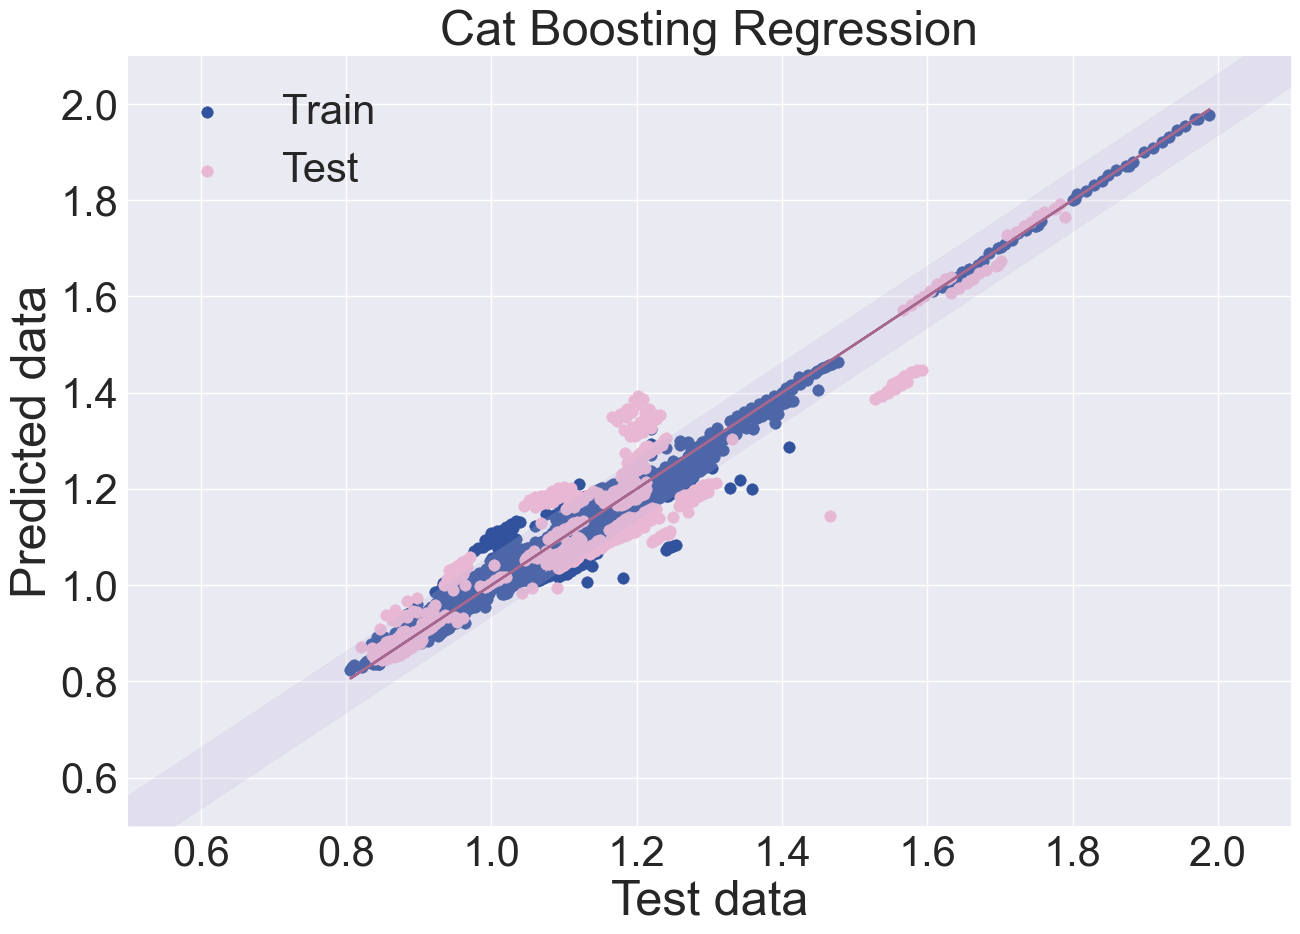

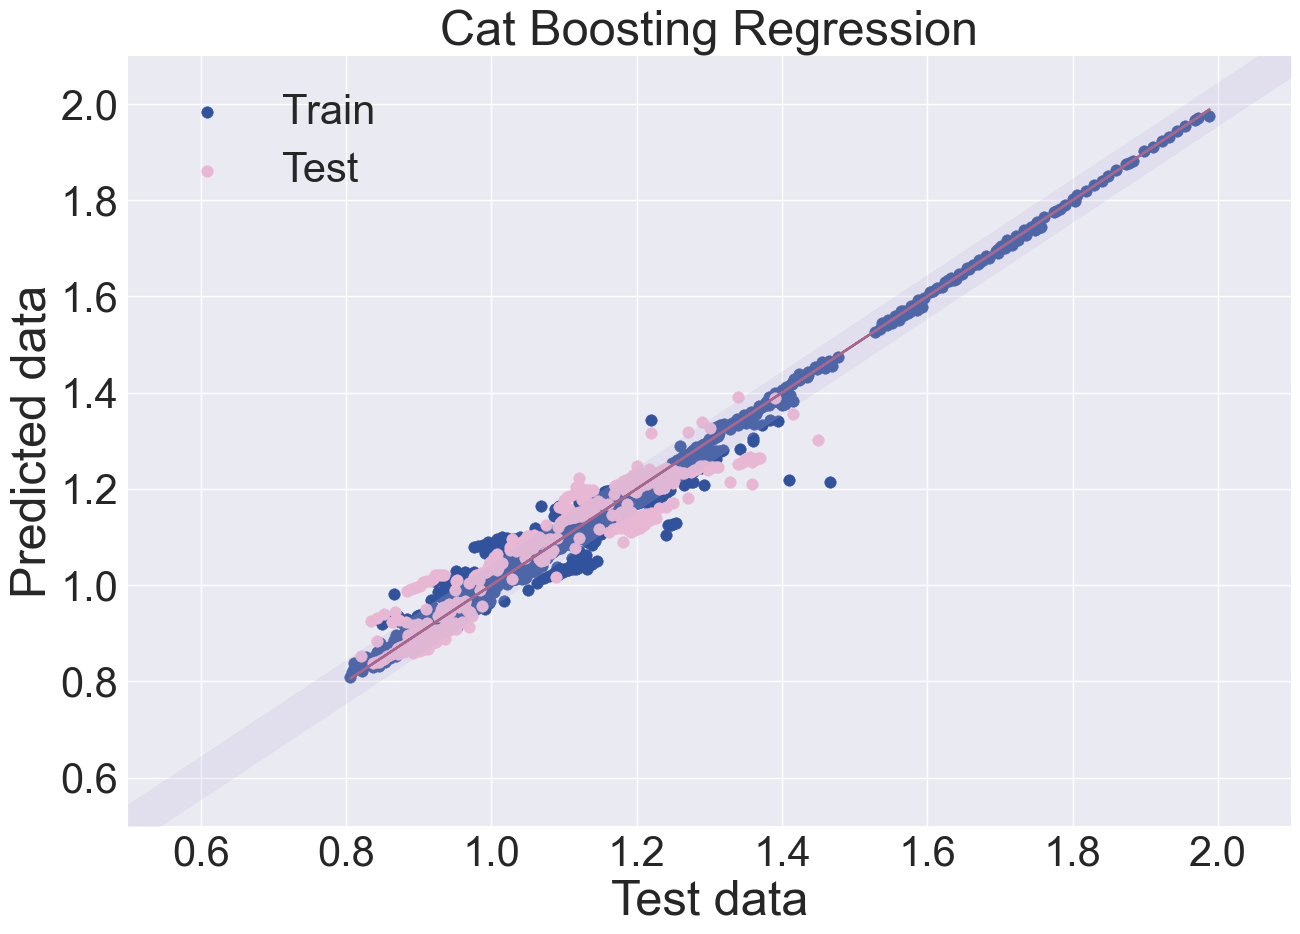

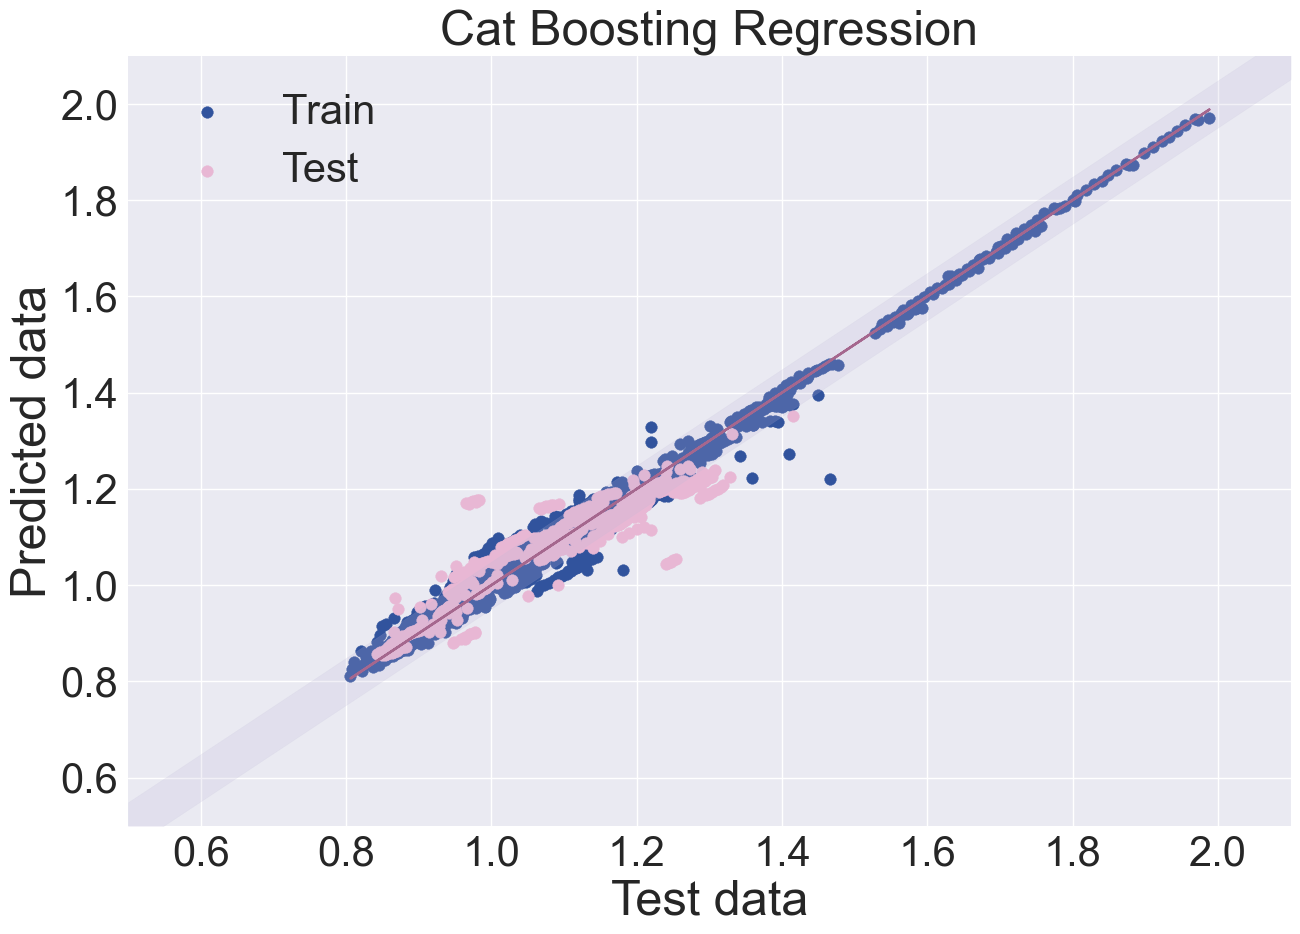

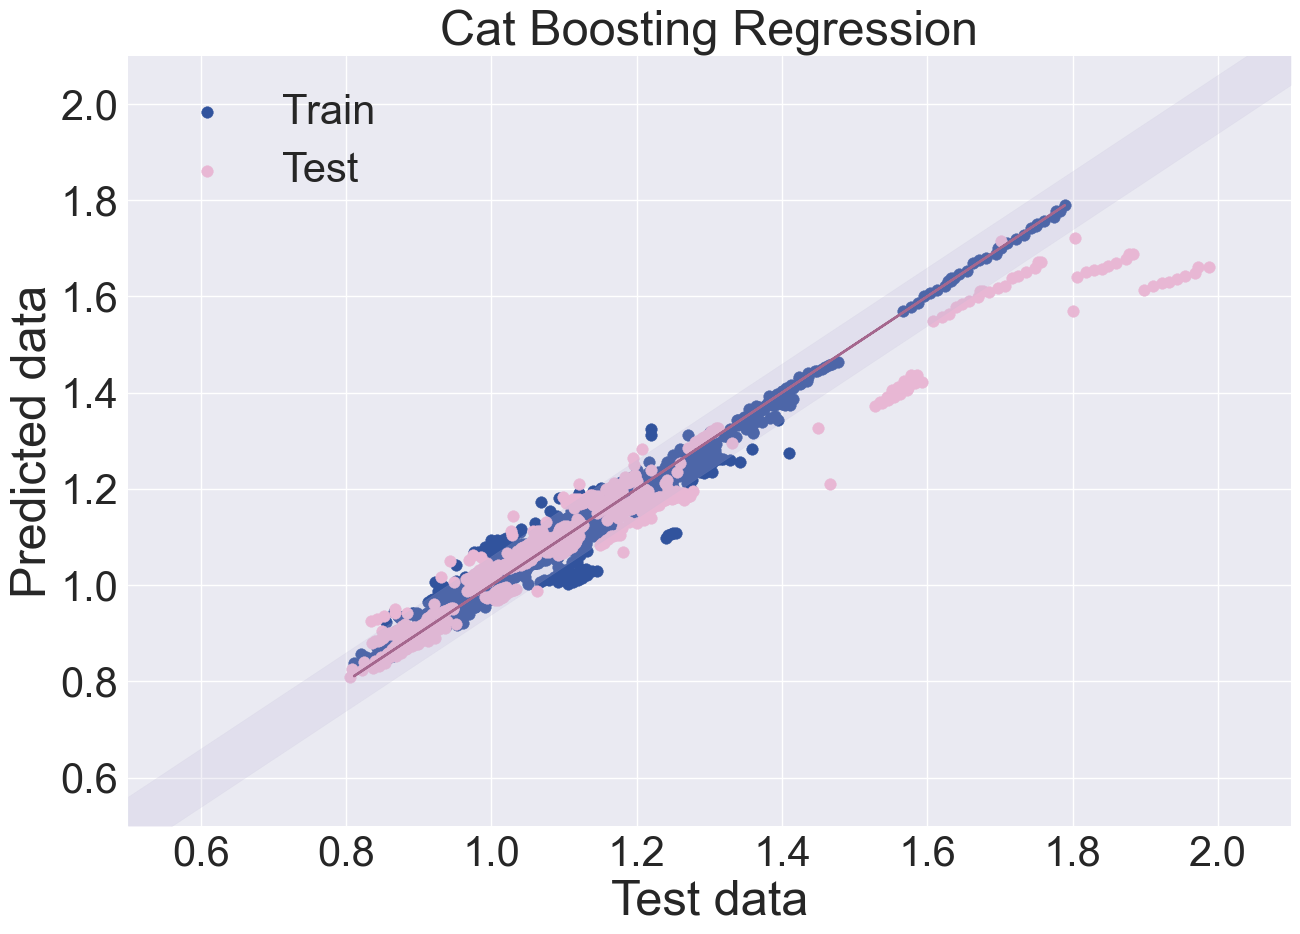

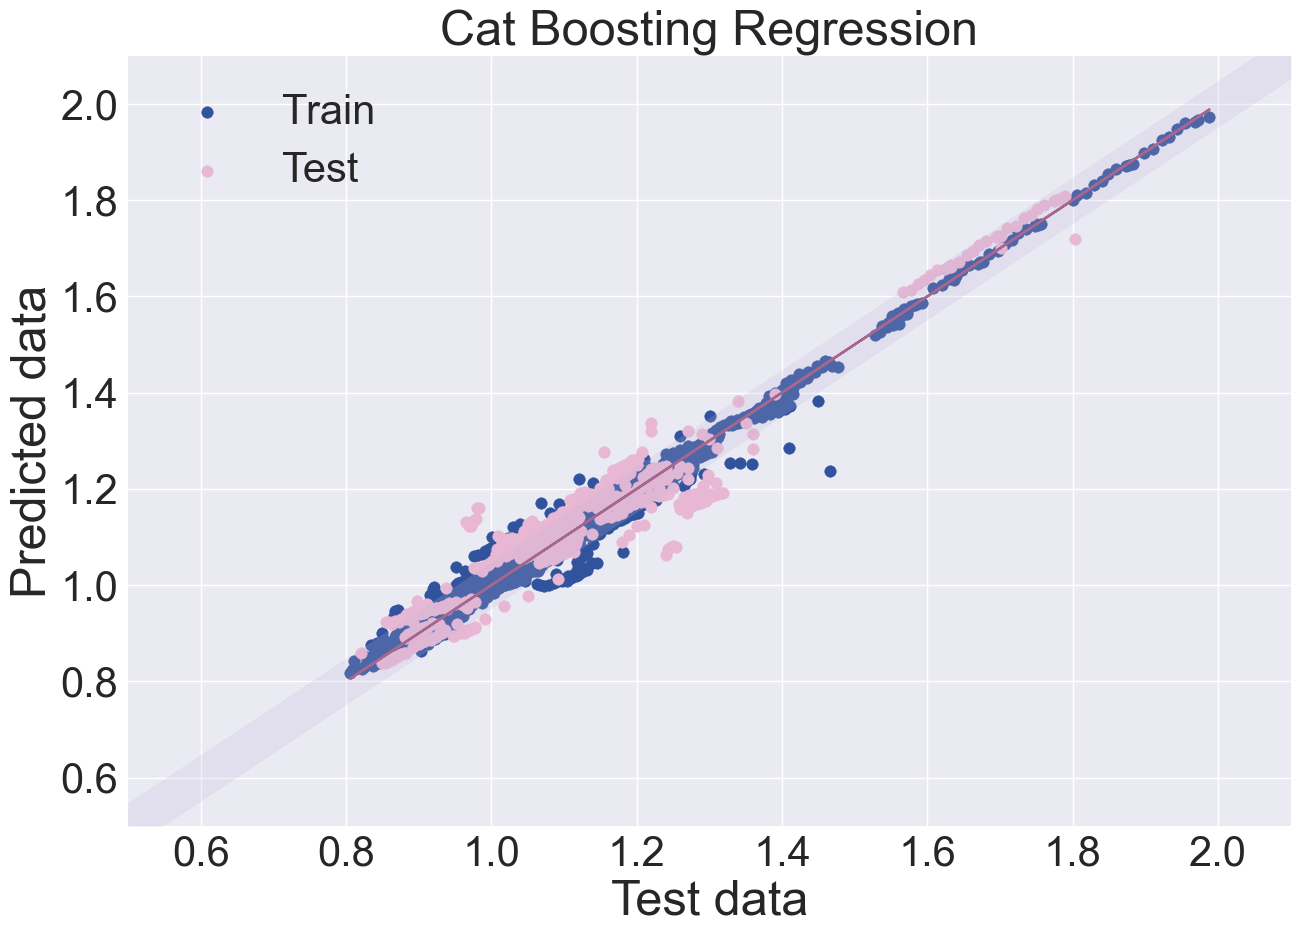

In [87]:
count = 0
#Creating a table to check accuracy on different DES classes
CBR_df = x_model[:]
CBR_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_CBR = CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, depth = depth)
    regr_CBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_CBR.predict(x_test_mod)
    y1_pred = regr_CBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    CBR_df['Density_train' + str(count)] = None
    CBR_df['Density_test' + str(count)] = None
    CBR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    CBR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Cat Boosting Regression' + str(count)] = regr_metrics(regr_CBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Cat Boosting Regression', fontsize=35)
df_error_train

In [88]:
df_error_CBR = metrics_class(CBR_df, 'Cat Boosting Regression')
df_error_CBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Cat Boosting Regression0         2     I  0.992904        NaN    0.005453   
1   Cat Boosting Regression0         2   III  0.905158   0.438522    0.028462   
2   Cat Boosting Regression0         2    IV  0.991485   0.713896    0.005871   
3   Cat Boosting Regression0         2     V  0.986784   0.895977    0.016359   
4   Cat Boosting Regression0         3  None  0.995098   0.863907    0.022158   
5   Cat Boosting Regression1         2     I  0.995735        NaN    0.004227   
6   Cat Boosting Regression1         2   III  0.919624   0.790834    0.025844   
7   Cat Boosting Regression1         2    IV  0.997281  -4.631581    0.007316   
8   Cat Boosting Regression1         2     V  0.985732   0.914593    0.016639   
9   Cat Boosting Regression1         3  None  0.996113   0.924177    0.016940   
10  Cat Boosting Regression2         2     I  0.996124       None    0.004541   
11  Cat Boosting Regression2         2   III  0.925751   0.783952    0.024490   
12  Cat Boosting Regression2         2    IV  0.997658       None    0.006157   
13  Cat Boosting Regression2         2     V  0.986548   0.678406    0.016442   
14  Cat Boosting Regression2         3  None  0.996919    0.71232    0.016975   
15  Cat Boosting Regression3         2     I  0.995916        NaN    0.004507   
16  Cat Boosting Regression3         2   III  0.917470   0.809206    0.027232   
17  Cat Boosting Regression3         2    IV  0.996735  -2.988424    0.005396   
18  Cat Boosting Regression3         2     V  0.987551   0.914963    0.015615   
19  Cat Boosting Regression3         3  None  0.992591    0.86842    0.022425   
20  Cat Boosting Regression4         2     I  0.996816   0.534923    0.004087   
21  Cat Boosting Regression4         2   III  0.926560   0.707661    0.025429   
22  Cat Boosting Regression4         2    IV  0.997186 -13.426489    0.006661   
23  Cat Boosting Regression4         2     V  0.983868   0.802453    0.017881   
24  Cat Boosting Regression4         3  None  0.995391     0.9881    0.017744   

   RMSE_test  
0   0.037259  
1   0.064746  
2   0.097524  
3   0.036593  
4   0.078577  
5   0.055416  
6   0.044772  
7   0.076846  
8   0.039604  
9   0.034265  
10      None  
11   0.04453  
12      None  
13  0.066795  
14  0.036855  
15  0.014509  
16  0.033613  
17  0.153706  
18  0.038082  
19  0.099713  
20  0.040918  
21  0.046955  
22  0.098754  
23  0.054733  
24  0.028212

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [89]:
#We optimize for XGB
regr_XGB = XGBRegressor()

search_space = {"n_estimators": Integer(50, 350),
    "max_depth": Integer(2, 30),
    "subsample": Real(0.05, 1.0),
    "colsample_bytree": Real(0.05, 1.0)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_XGB = BayesSearchCV(estimator = regr_XGB, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_XGB.fit(x_train01, y_model, sample_weight=sample_weight)

n_estimators = opt_XGB.best_estimator_.n_estimators
max_depth = opt_XGB.best_estimator_.max_depth
subsample = opt_XGB.best_estimator_.subsample
colsample_bytree = opt_XGB.best_estimator_.colsample_bytree

print('n_estimators:', n_estimators,'max_depth:', max_depth, 'subsample:', subsample,'colsample_bytree:', colsample_bytree)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.9184298008732381
MAE_test: 0.041535303161275704
MSE_test: 0.002980950539026948
RMSE_test: 0.054598081825527056
r2_train: 0.9822764087611867
MAE_train: 0.012547880509244111
MSE_train: 0.0004114297566635493
RMSE_train: 0.02028373132989957



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8951083115427801
MAE_test: 0.03407123544424249
MSE_test: 0.001984759681336638
RMSE_test: 0.04455064176122088
r2_train: 0.9865512134125997
MAE_train: 0.011702096170648529
MSE_train: 0.00036447553071492124
RMSE_train: 0.019091242251747822



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.800546501185843
MAE_test: 0.03731176312421326
MSE_test: 0.0026237840136743972
RMSE_test: 0.05122288564376667
r2_train: 0.9874964305420096
MAE_train: 0.011214422600951155
MSE_train: 0.00036344483754297127
RMSE_train: 0.019064229266953628



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.9294104649559447
MAE_test: 0.04051449167966438
MSE_test: 0.0032977499984896603
RMSE_test: 0.05742603937665961
r2_train: 0.9803343545007422
MAE_train: 0.01253360346356467
MSE_train: 0.0003947349296228063
RMSE_train: 0.01986793722616433
r2_test: 0.9012201843931352
MAE_test: 0.033332856165139514
MSE_test: 0.0024261884856519936
RMSE_test: 0.049256354774302916
r2_train: 0.9896534209224783
MAE_train: 0.00966330656032392
MSE_train: 0.0002733147278444744
RMSE_train: 0.016532232996315847



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.826998                   0.913975  ...   
1                   0.649775                   0.847995  ...   
2                   0.058928                   0.047670  ...   
3                   0.127912                   0.061102  ...   

   Cat Boosting Regression0  Cat Boosting Regression1  \
0                  0.972569                  0.980693   
1                  0.886680                  0.894431   
2                  0.025234                  0.022875   
3                  0.064352                  0.044694   

   Cat Boosting Regression2  Cat Boosting Regression3  \
0                  0.983973                  0.971159   
1                  0.818289                  0.921266   
2                  0.021584                  0.024061   
3                  0.048892                  0.060648   

   Cat Boosting Regression4  XGBoosting Regression0  XGBoosting Regression1  \
0                  0.981043                0.982276                0.986551   
1                  0.908459                0.918430                0.895108   
2                  0.022378                0.020284                0.019091   
3                  0.047417                0.054598                0.044551   

   XGBoosting Regression2  XGBoosting Regression3  XGBoosting Regression4  
0                0.987496                0.980334                0.989653  
1                0.800547                0.929410                0.901220  
2                0.019064                0.019868                0.016532  
3                0.051223                0.057426                0.049256  

[4 rows x 30 columns]

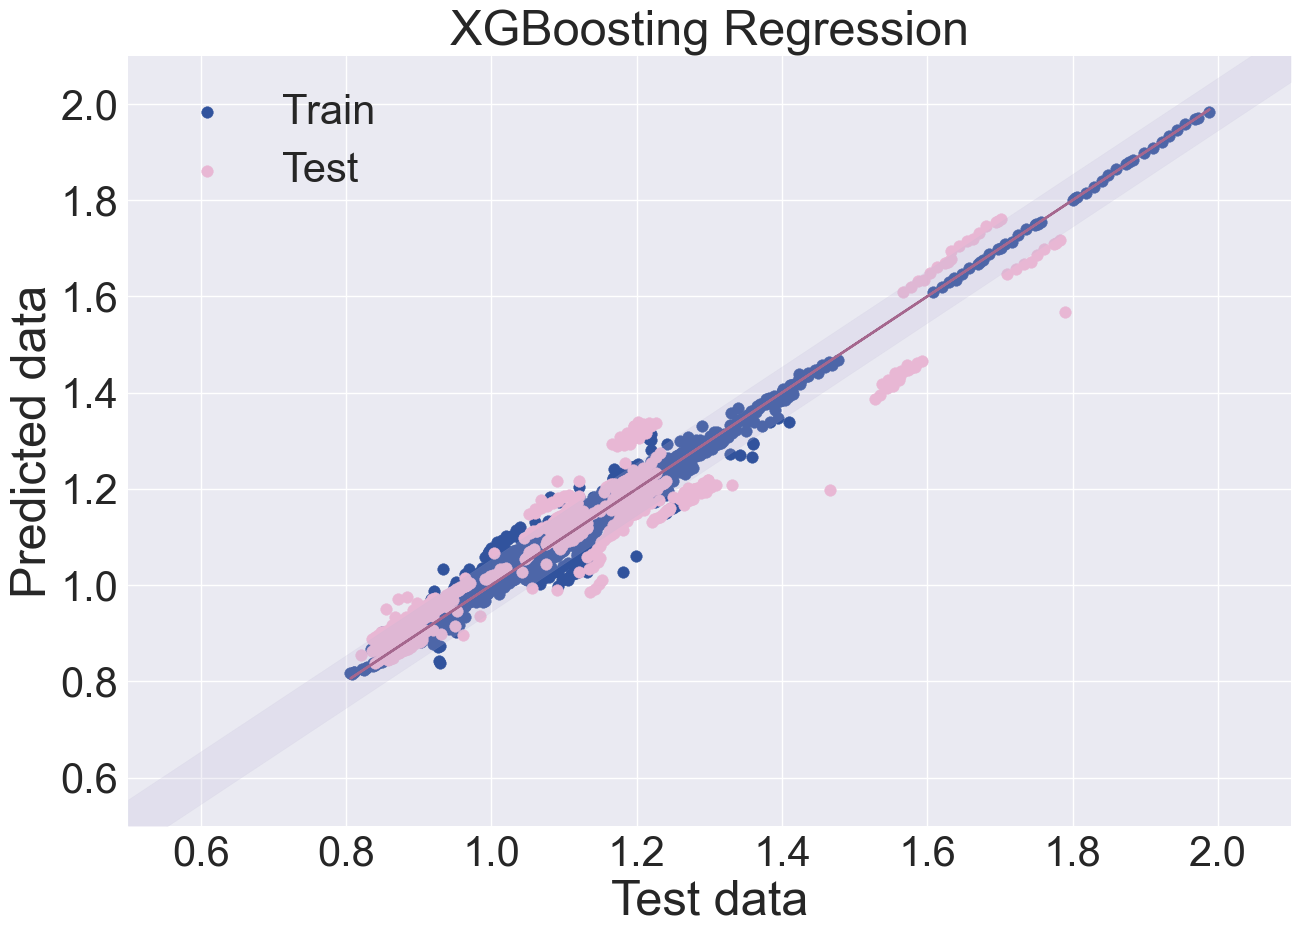

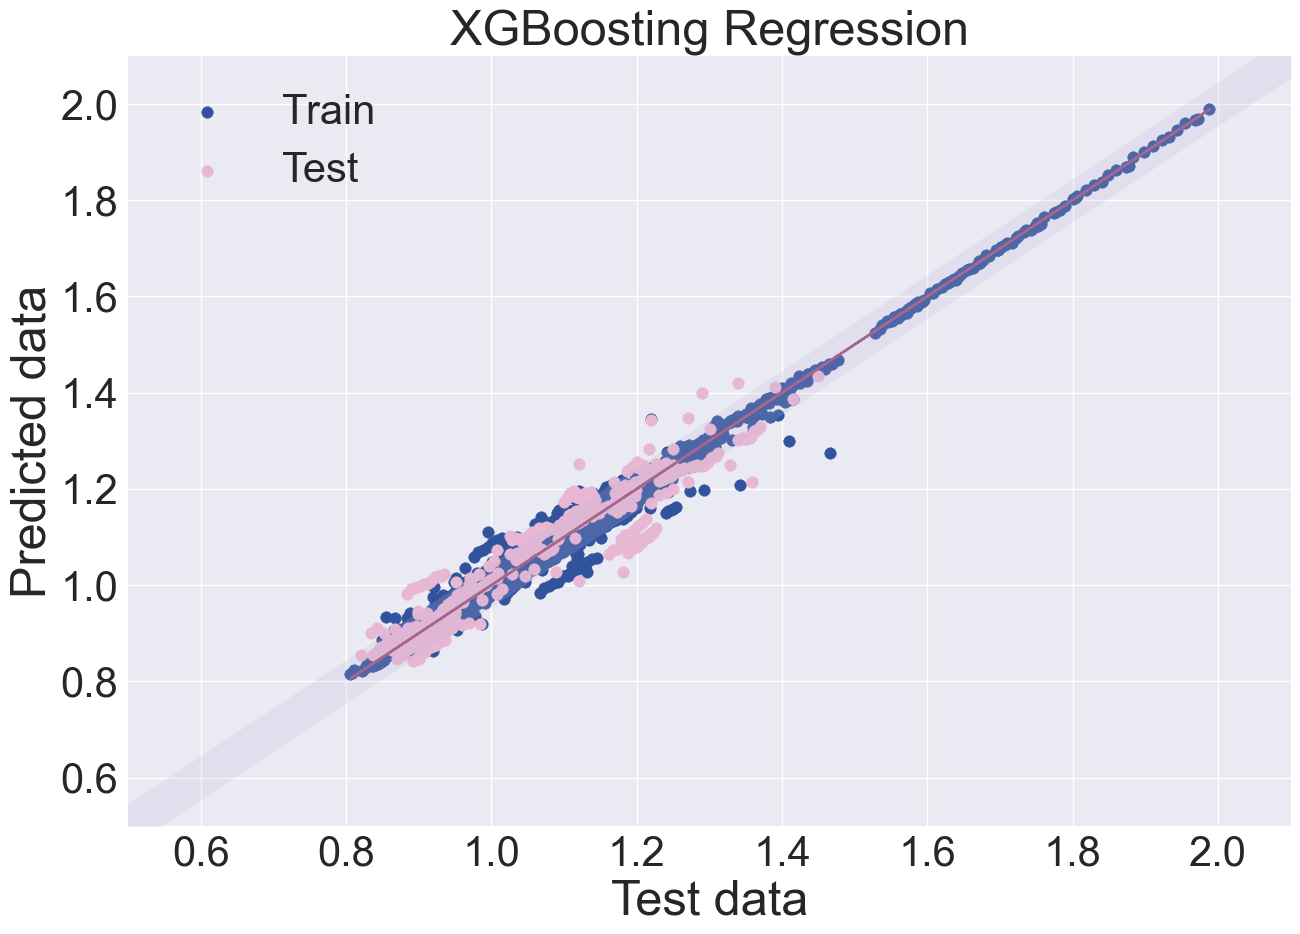

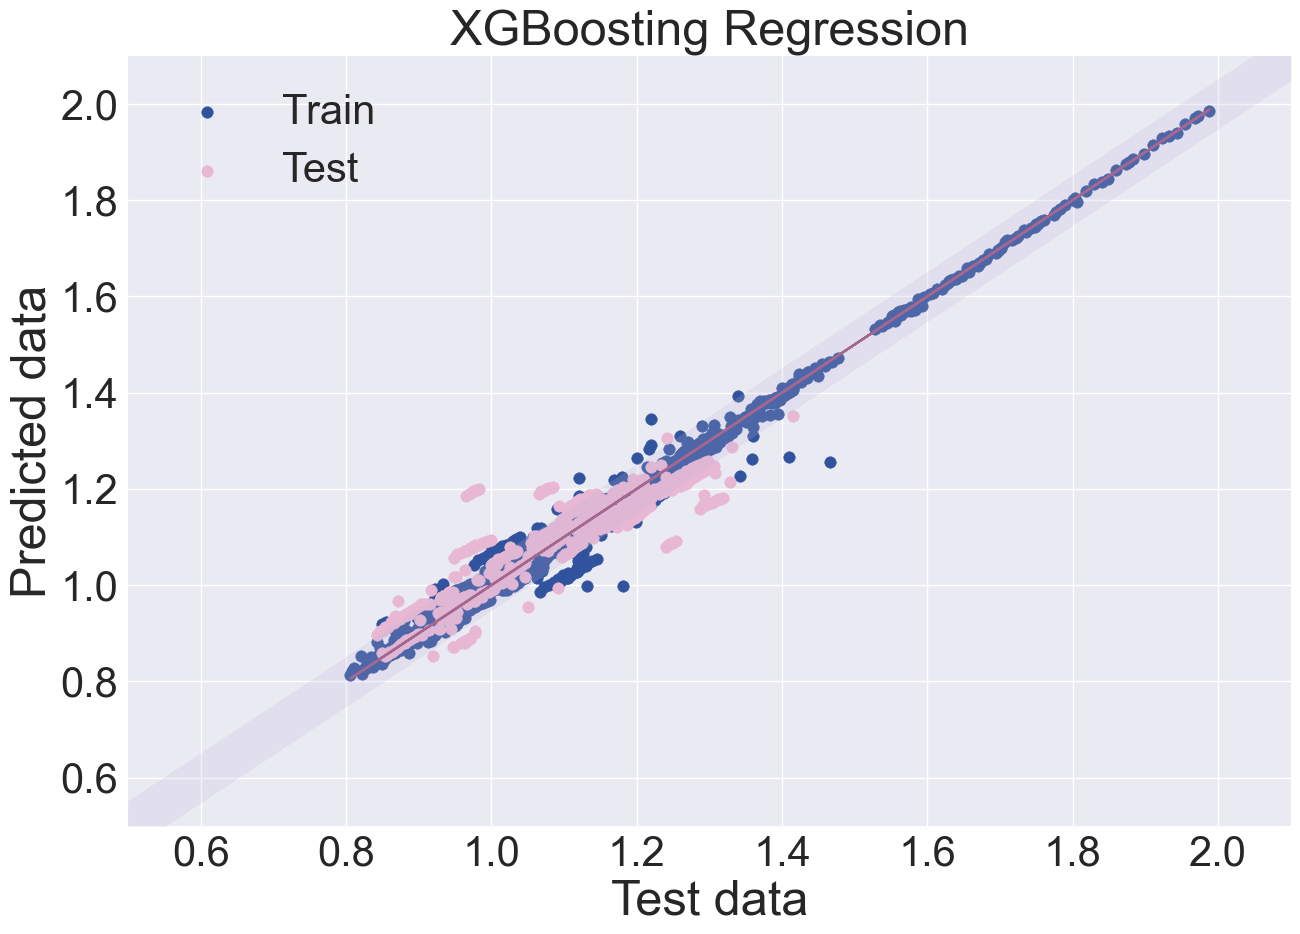

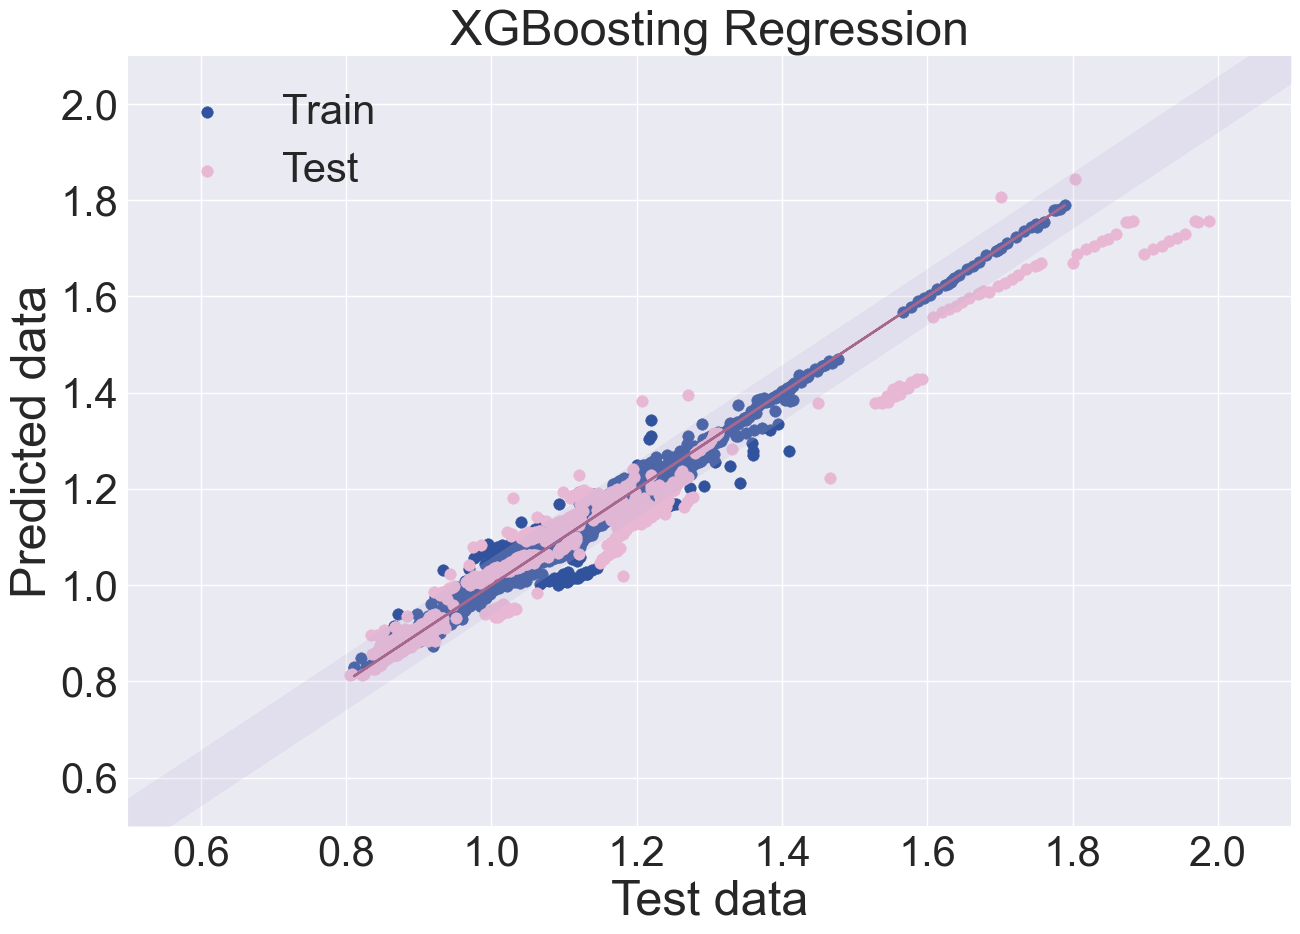

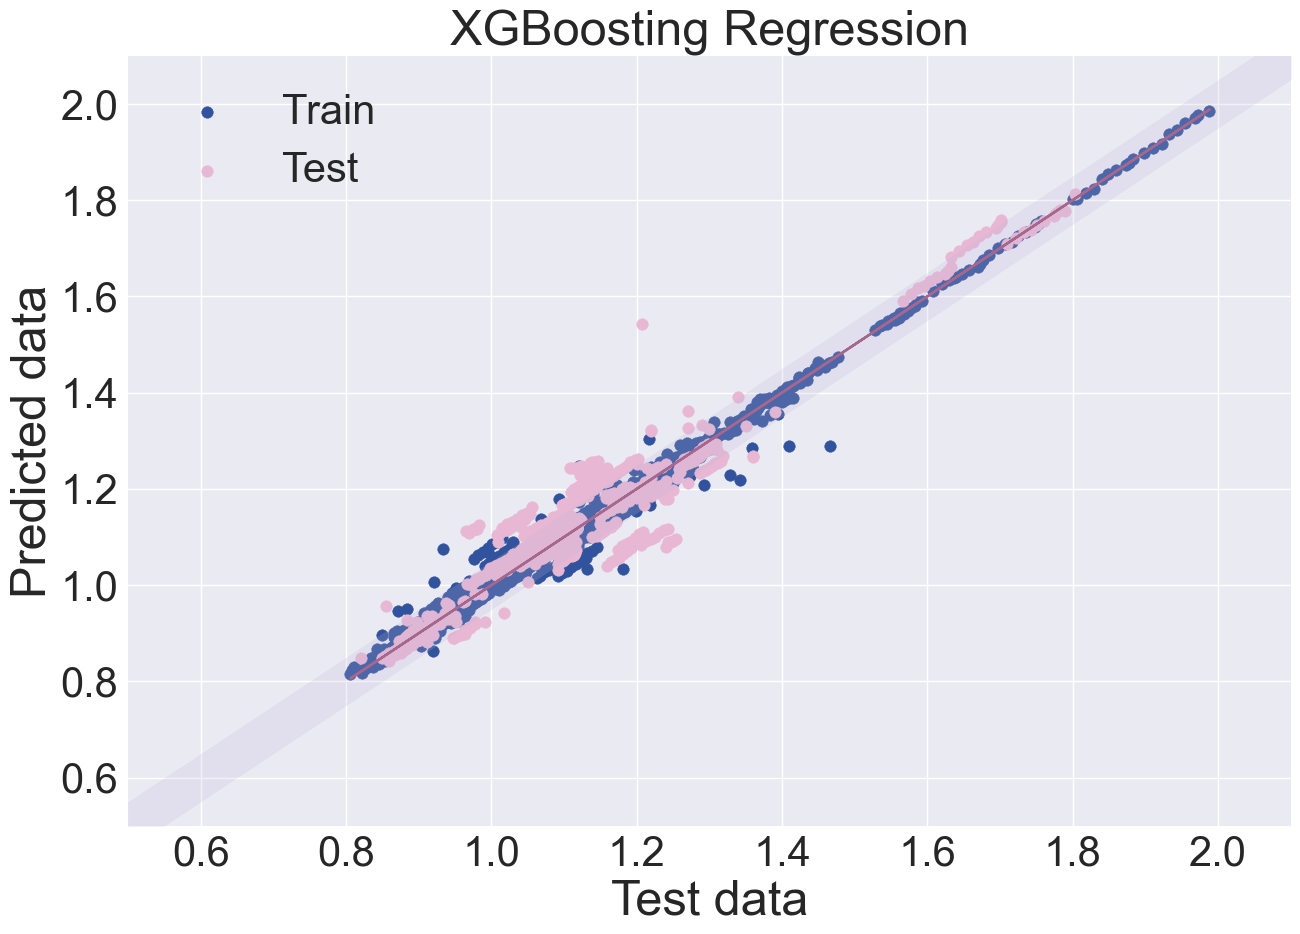

In [90]:
count = 0
#Creating a table to check accuracy on different DES classes
XGB_df = x_model[:]
XGB_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #XGB
    regr_XGB = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree)
    regr_XGB.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_XGB.predict(x_test_mod)
    y1_pred = regr_XGB.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    XGB_df['Density_train' + str(count)] = None
    XGB_df['Density_test' + str(count)] = None
    XGB_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    XGB_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['XGBoosting Regression' + str(count)] = regr_metrics(regr_XGB, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('XGBoosting Regression', fontsize=35)
df_error_train

In [91]:
df_error_XGB = metrics_class(XGB_df, 'XGBoosting Regression')
df_error_XGB

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   XGBoosting Regression0         2     I  0.999418        NaN    0.001561   
1   XGBoosting Regression0         2   III  0.935353   0.639416    0.023499   
2   XGBoosting Regression0         2    IV  0.995976     0.7578    0.004036   
3   XGBoosting Regression0         2     V  0.994848   0.900262    0.010214   
4   XGBoosting Regression0         3  None  0.997260   0.903715    0.016566   
5   XGBoosting Regression1         2     I  0.999319        NaN    0.001690   
6   XGBoosting Regression1         2   III  0.940775   0.725493    0.022185   
7   XGBoosting Regression1         2    IV  0.999032  -0.608959    0.004364   
8   XGBoosting Regression1         2     V  0.992506   0.932931    0.012058   
9   XGBoosting Regression1         3  None  0.998223   0.961736    0.011456   
10  XGBoosting Regression2         2     I  0.999020       None    0.002284   
11  XGBoosting Regression2         2   III  0.937545   0.817857    0.022461   
12  XGBoosting Regression2         2    IV  0.998520       None    0.004895   
13  XGBoosting Regression2         2     V  0.993408   0.531772    0.011510   
14  XGBoosting Regression2         3  None  0.997867   0.644026    0.014125   
15  XGBoosting Regression3         2     I  0.999125        NaN    0.002087   
16  XGBoosting Regression3         2   III  0.939982   0.755034    0.023223   
17  XGBoosting Regression3         2    IV  0.998616   -3.26112    0.003513   
18  XGBoosting Regression3         2     V  0.994956   0.908903    0.009939   
19  XGBoosting Regression3         3  None  0.996704   0.909926    0.014957   
20  XGBoosting Regression4         2     I  0.999613   -0.23264    0.001425   
21  XGBoosting Regression4         2   III  0.956222   0.678355    0.019633   
22  XGBoosting Regression4         2    IV  0.999343 -87.103141    0.003219   
23  XGBoosting Regression4         2     V  0.994416   0.869762    0.010520   
24  XGBoosting Regression4         3  None  0.997655   0.982749    0.012657   

   RMSE_test  
0   0.063494  
1   0.051886  
2    0.08973  
3   0.035832  
4   0.066094  
5    0.04576  
6    0.05129  
7   0.041075  
8   0.035095  
9   0.024341  
10      None  
11  0.040886  
12      None  
13  0.080597  
14  0.040997  
15  0.126003  
16  0.038087  
17  0.158873  
18  0.039415  
19    0.0825  
20  0.066615  
21  0.049252  
22  0.244045  
23  0.044441  
24  0.033968

**Conclusion:** Boosters show the best results among all the models used by various metrics

## 5. Прочие модели

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [92]:
#We optimize for SVM
regr_SVM = SVR()
search_space = {"kernel": Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    "gamma": Real(0.001, 1),
    "epsilon": Real(0.001, 0.2),
    "C": Real(2, 20)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sc_y = MinMaxScaler(feature_range=(0, 1))
y_train01 = np.ravel(sc_y.fit_transform(np.array(y_model).reshape(-1, 1)))
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_SVM = BayesSearchCV(estimator = regr_SVM, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_SVM.fit(x_train01, y_train01, sample_weight=sample_weight)

kernel = opt_SVM.best_estimator_.kernel
gamma = opt_SVM.best_estimator_.gamma
epsilon = opt_SVM.best_estimator_.epsilon
C = opt_SVM.best_estimator_.C

print('kernel:', kernel,'gamma:', gamma, 'epsilon:', epsilon, 'C:', C)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8480690255651718
MAE_test: 0.05434210198341663
MSE_test: 0.0055522571353856355
RMSE_test: 0.07451346948965426
r2_train: 0.9697458849673474
MAE_train: 0.022754573562912314
MSE_train: 0.0007023093129510003
RMSE_train: 0.026501119088653602



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

r2_test: 0.8760576124775026
MAE_test: 0.033288066476878674
MSE_test: 0.0023452368550972835
RMSE_test: 0.04842764556632176
r2_train: 0.9749040746991492
MAE_train: 0.022277476577542855
MSE_train: 0.0006801246070317544
RMSE_train: 0.02607919874213459
r2_test: 0.6540279523137935
MAE_test: 0.04316215534533425
MSE_test: 0.0045512158638193485
RMSE_test: 0.06746269979640118
r2_train: 0.9768670191463548
MAE_train: 0.021651238572461623
MSE_train: 0.0006724129854667162
RMSE_train: 0.025930927200289545



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

r2_test: 0.8680861638160844
MAE_test: 0.04580932570606926
MSE_test: 0.006162653611541367
RMSE_test: 0.07850257073205544
r2_train: 0.9682875400450275
MAE_train: 0.02105862356320261
MSE_train: 0.0006365423219372378
RMSE_train: 0.025229790366494087
r2_test: 0.8983182846879638
MAE_test: 0.03745656387243021
MSE_test: 0.00249746373159115
RMSE_test: 0.049974630879989
r2_train: 0.9726061481468774
MAE_train: 0.023436027046129092
MSE_train: 0.0007236346533236406
RMSE_train: 0.026900458236313384


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.826998                   0.913975  ...   
1                   0.649775                   0.847995  ...   
2                   0.058928                   0.047670  ...   
3                   0.127912                   0.061102  ...   

   XGBoosting Regression0  XGBoosting Regression1  XGBoosting Regression2  \
0                0.982276                0.986551                0.987496   
1                0.918430                0.895108                0.800547   
2                0.020284                0.019091                0.019064   
3                0.054598                0.044551                0.051223   

   XGBoosting Regression3  XGBoosting Regression4  Support Vector Machine0  \
0                0.980334                0.989653                 0.969746   
1                0.929410                0.901220                 0.848069   
2                0.019868                0.016532                 0.026501   
3                0.057426                0.049256                 0.074513   

   Support Vector Machine1  Support Vector Machine2  Support Vector Machine3  \
0                 0.974904                 0.976867                 0.968288   
1                 0.876058                 0.654028                 0.868086   
2                 0.026079                 0.025931                 0.025230   
3                 0.048428                 0.067463                 0.078503   

   Support Vector Machine4  
0                 0.972606  
1                 0.898318  
2                 0.026900  
3                 0.049975  

[4 rows x 35 columns]

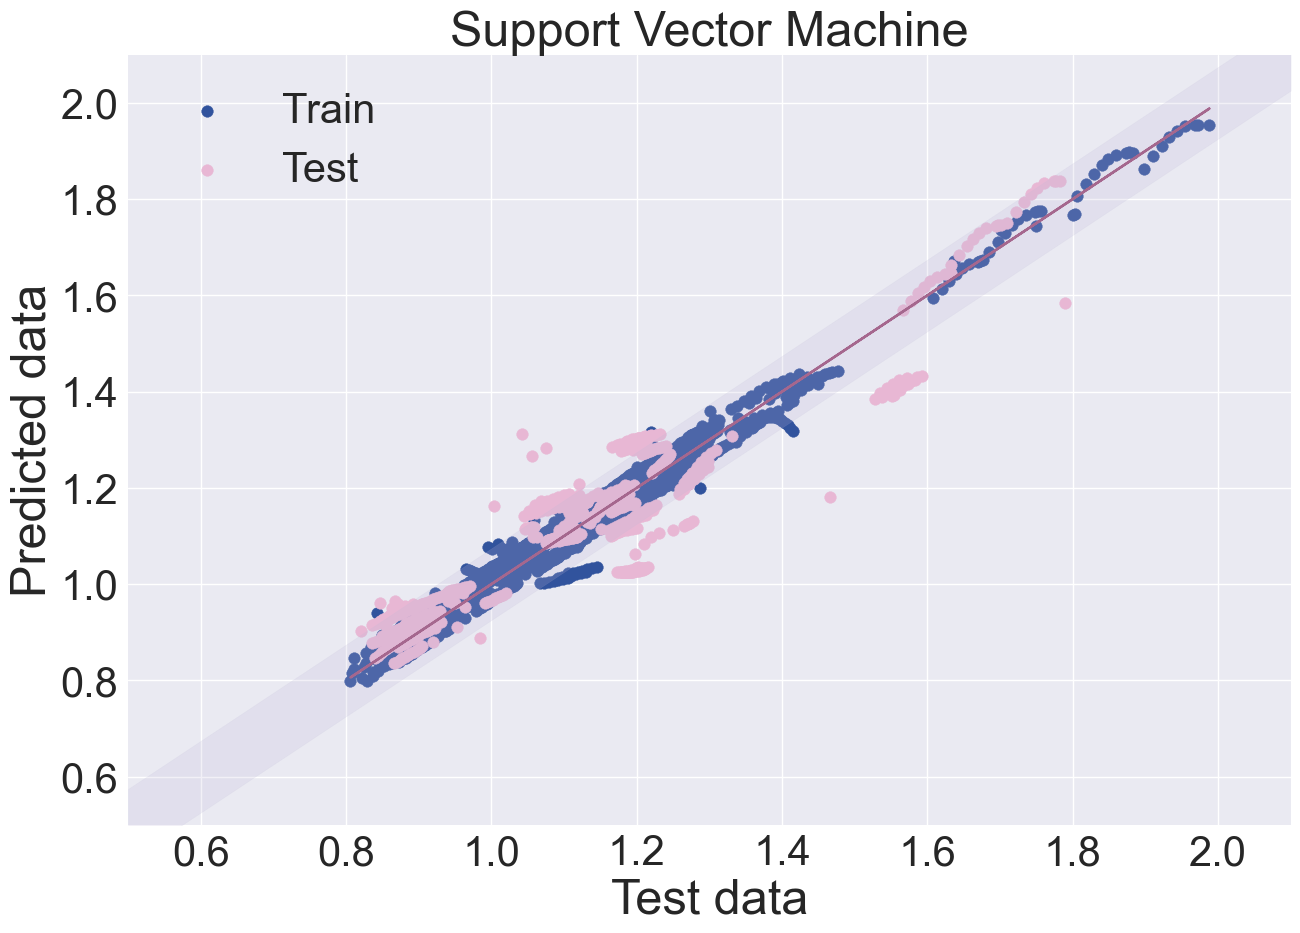

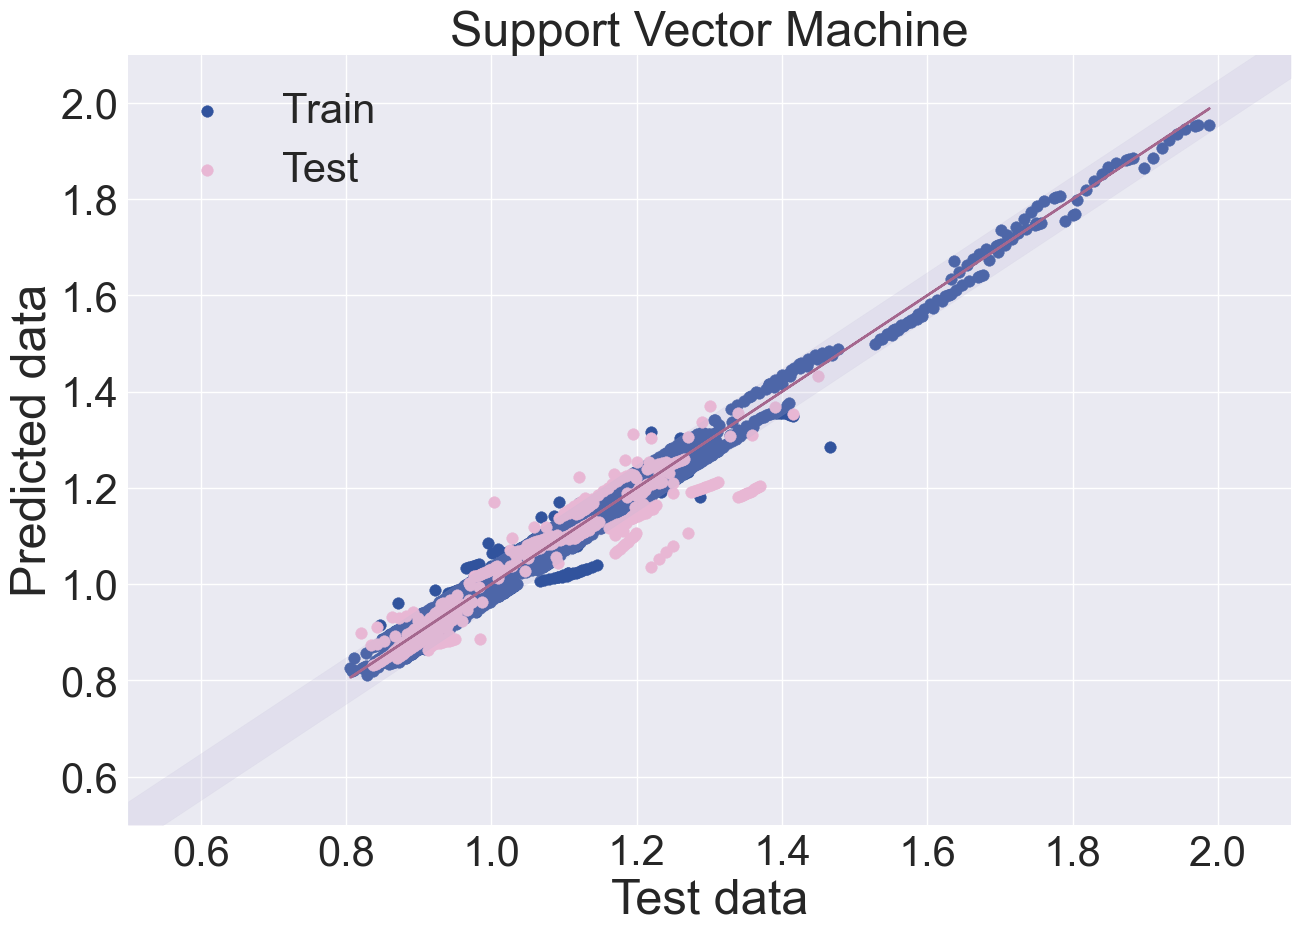

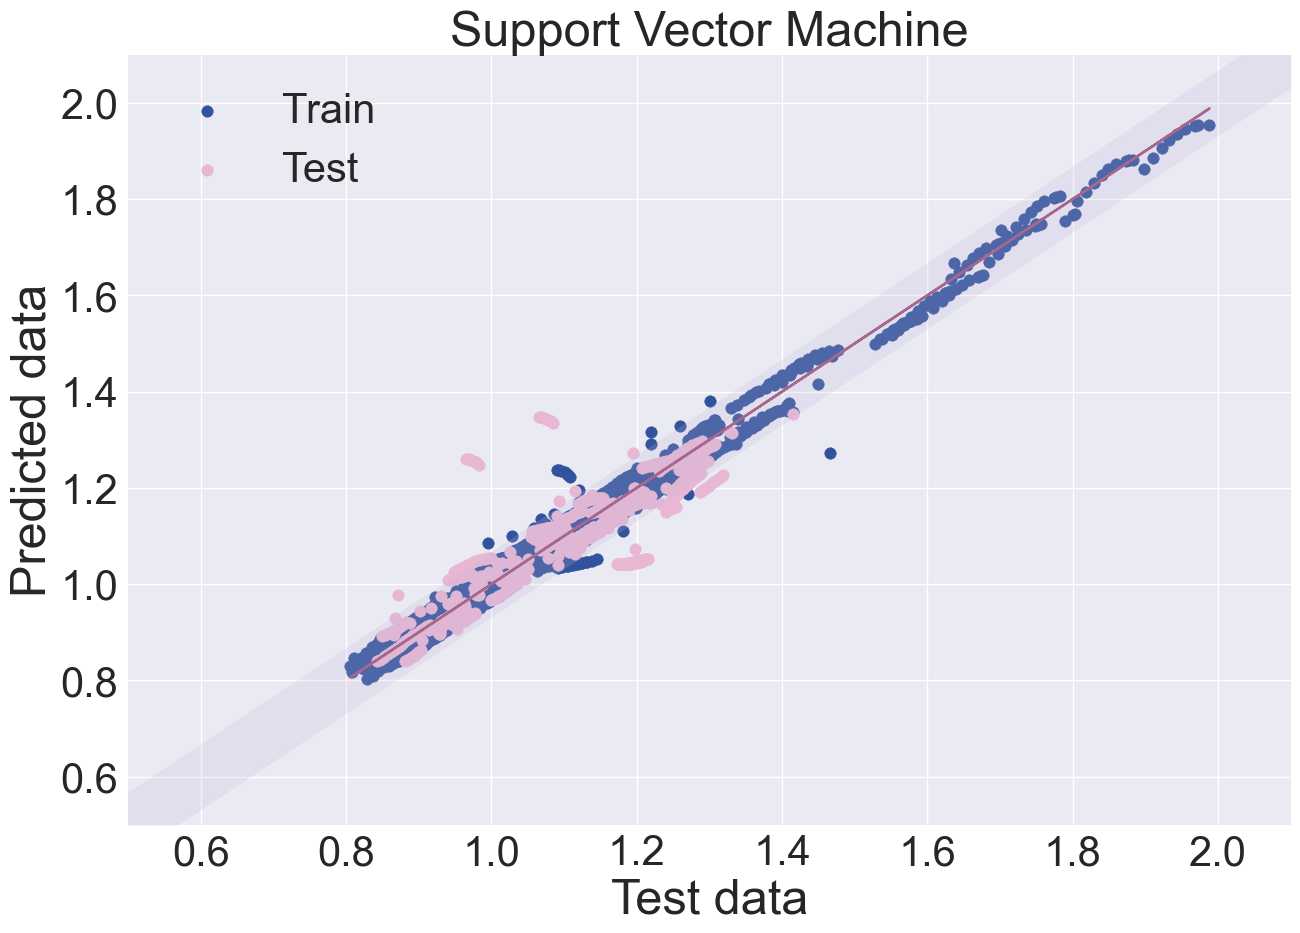

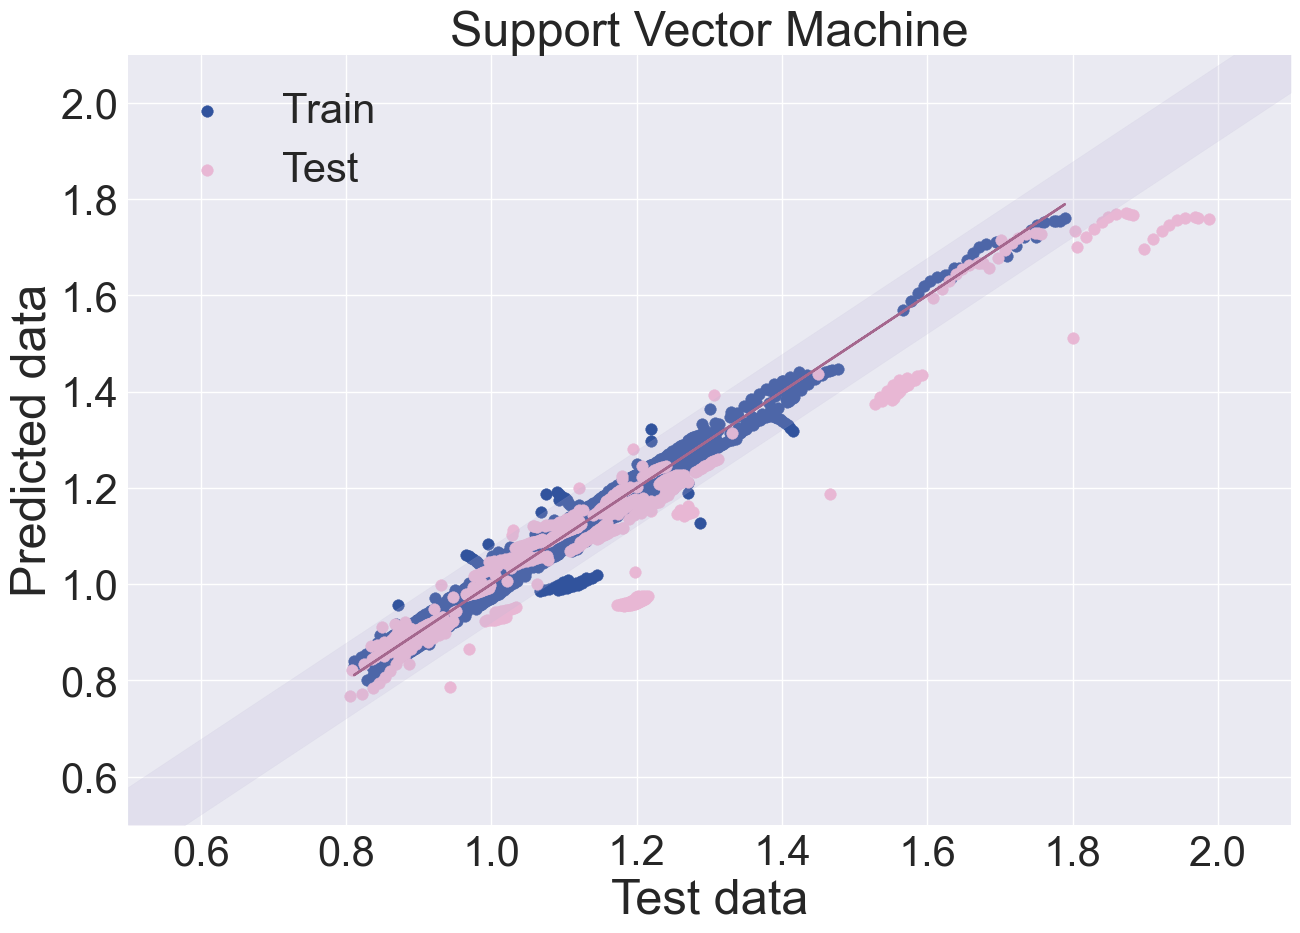

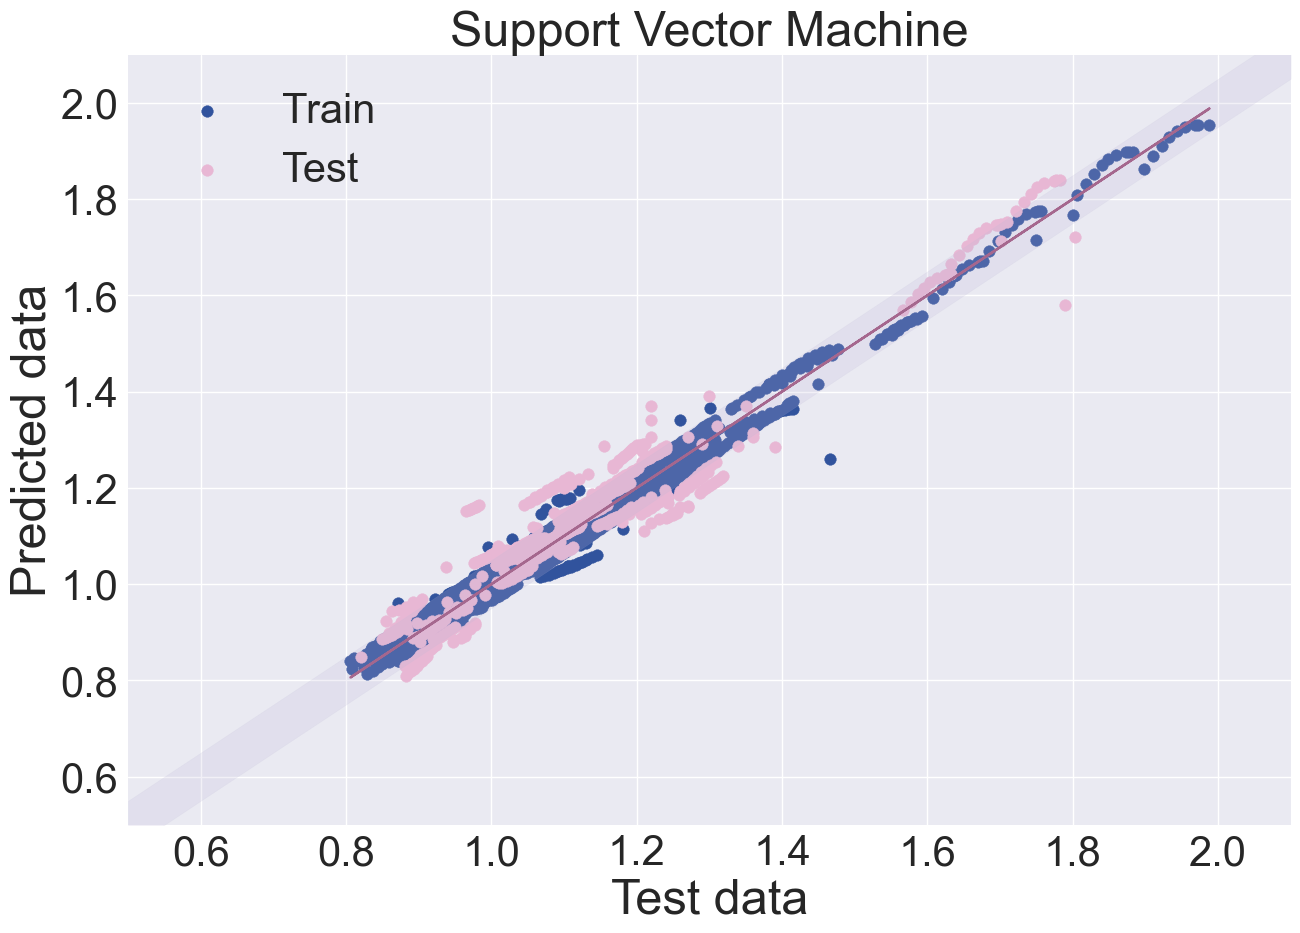

In [93]:
#SVM
count = 0
#Creating a table to check accuracy on different DES classes
SVM_df = x_model[:]
SVM_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))

    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    sc_y = MinMaxScaler(feature_range=(0, 1))
    y_train_mod = np.ravel(sc_y.fit_transform(np.array(y_train_mod).reshape(-1, 1)))
  
    #Support Vector Machine
    SVM_regr = SVR(kernel = kernel, gamma = gamma, epsilon = epsilon, C = C)
    SVM_regr.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = SVM_regr.predict(x_test_mod)
    y1_pred = SVM_regr.predict(x_train_mod)
  
    #Rescaling the data
    y_train_mod = sc_y.inverse_transform(y_train_mod.reshape(-1, 1))
    y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y1_pred = sc_y.inverse_transform(y1_pred.reshape(-1, 1))
    
    #Filling in the table in accordance with the metrics
    SVM_df['Density_train' + str(count)] = None
    SVM_df['Density_test' + str(count)] = None
    SVM_df['Density_train' + str(count)].iloc[train_idx] = y1_pred[:, 0]
    SVM_df['Density_test' + str(count)].iloc[val_idx] = y_pred[:, 0]

    #Calculating metrics
    df_error_train['Support Vector Machine' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Support Vector Machine', fontsize=35)
df_error_train

In [94]:
df_error_SVM = metrics_class(SVM_df, 'Support Vector Machine')
df_error_SVM

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Support Vector Machine0         2     I  0.871201        NaN    0.023230   
1   Support Vector Machine0         2   III  0.917653   0.770619    0.026521   
2   Support Vector Machine0         2    IV  0.838236   0.544465    0.025590   
3   Support Vector Machine0         2     V  0.964792   0.693679    0.026701   
4   Support Vector Machine0         3  None  0.993212   0.696072    0.026076   
5   Support Vector Machine1         2     I  0.874581        NaN    0.022923   
6   Support Vector Machine1         2   III  0.918971   0.889446    0.025949   
7   Support Vector Machine1         2    IV  0.963550 -15.759768    0.026784   
8   Support Vector Machine1         2     V  0.963920    0.88768    0.026459   
9   Support Vector Machine1         3  None  0.990821   0.793769    0.026033   
10  Support Vector Machine2         2     I  0.893025       None    0.023859   
11  Support Vector Machine2         2   III  0.916373   0.867016    0.025991   
12  Support Vector Machine2         2    IV  0.951566       None    0.028001   
13  Support Vector Machine2         2     V  0.966087   0.298943    0.026106   
14  Support Vector Machine2         3  None  0.994068  -1.957403    0.023554   
15  Support Vector Machine3         2     I  0.910151        NaN    0.021139   
16  Support Vector Machine3         2   III  0.929730   0.843456    0.025128   
17  Support Vector Machine3         2    IV  0.947232  -2.805141    0.021692   
18  Support Vector Machine3         2     V  0.964209   0.901987    0.026476   
19  Support Vector Machine3         3  None  0.992670   0.703226    0.022306   
20  Support Vector Machine4         2     I  0.872396  -0.654791    0.025873   
21  Support Vector Machine4         2   III  0.911733   0.738655    0.027878   
22  Support Vector Machine4         2    IV  0.946821 -15.316755    0.028957   
23  Support Vector Machine4         2     V  0.967920   0.687629    0.025215   
24  Support Vector Machine4         3  None  0.991478   0.959444    0.024127   

   RMSE_test  
0    0.15854  
1   0.041383  
2   0.123058  
3   0.062795  
4   0.117426  
5   0.166543  
6    0.03255  
7   0.132568  
8   0.045417  
9    0.05651  
10      None  
11  0.034936  
12      None  
13   0.09862  
14  0.118168  
15  0.106902  
16  0.030447  
17  0.150132  
18  0.040884  
19  0.149751  
20  0.077183  
21  0.044396  
22  0.105024  
23  0.068826  
24  0.052082

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [95]:
#We optimize for KNN
regr_KNN = KNeighborsRegressor()

search_space = {"n_neighbors": Integer(5, 15),
    "leaf_size": Integer(2, 10),
    "p": Real(0.1, 3),
    "algorithm": Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
    "metric": Categorical(['euclidean','manhattan'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_KNN = BayesSearchCV(estimator = regr_KNN, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_KNN.fit(x_train01, y_model)#, sample_weight=sample_weight)

n_neighbors = opt_KNN.best_estimator_.n_neighbors
weights = opt_KNN.best_estimator_.weights
leaf_size = opt_KNN.best_estimator_.leaf_size
p = opt_KNN.best_estimator_.p
algorithm = opt_KNN.best_estimator_.algorithm
metric = opt_KNN.best_estimator_.metric

print('n_neighbors:', n_neighbors,'leaf_size:', leaf_size, 'p:', p,'algorithm:', algorithm, 'metric:', metric)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8462927839471474
MAE_test: 0.05915685726236335
MSE_test: 0.005617169180046256
RMSE_test: 0.07494777635157868
r2_train: 0.9589904037753729
MAE_train: 0.014716953125613538
MSE_train: 0.0009519836001757456
RMSE_train: 0.030854231479259787
r2_test: 0.8366835329990976
MAE_test: 0.04162871987042222
MSE_test: 0.0030902728687977905
RMSE_test: 0.055590222780609454
r2_train: 0.9658466465190213
MAE_train: 0.014198782462782104
MSE_train: 0.0009255899448457395
RMSE_train: 0.030423509739110302



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

r2_test: 0.7516088958689214
MAE_test: 0.044713877075115045
MSE_test: 0.0032675516450343545
RMSE_test: 0.057162502088645095
r2_train: 0.967296599418471
MAE_train: 0.01453741774432594
MSE_train: 0.0009505991190268383
RMSE_train: 0.030831787476999096
r2_test: 0.8881145979895864
MAE_test: 0.048161362606232314
MSE_test: 0.005226979949373239
RMSE_test: 0.07229785577299813
r2_train: 0.9645799533721545
MAE_train: 0.014007341450492325
MSE_train: 0.0007109621503858986
RMSE_train: 0.026663873506786267
r2_test: 0.8640720575643799
MAE_test: 0.041200446901562465
MSE_test: 0.0033386052280983403
RMSE_test: 0.057780664829147996
r2_train: 0.9699237695209012
MAE_train: 0.013621590509595228
MSE_train: 0.0007944922361673525
RMSE_train: 0.028186738657875136



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.826998                   0.913975  ...   
1                   0.649775                   0.847995  ...   
2                   0.058928                   0.047670  ...   
3                   0.127912                   0.061102  ...   

   Support Vector Machine0  Support Vector Machine1  Support Vector Machine2  \
0                 0.969746                 0.974904                 0.976867   
1                 0.848069                 0.876058                 0.654028   
2                 0.026501                 0.026079                 0.025931   
3                 0.074513                 0.048428                 0.067463   

   Support Vector Machine3  Support Vector Machine4  K-nearest neighbors0  \
0                 0.968288                 0.972606              0.958990   
1                 0.868086                 0.898318              0.846293   
2                 0.025230                 0.026900              0.030854   
3                 0.078503                 0.049975              0.074948   

   K-nearest neighbors1  K-nearest neighbors2  K-nearest neighbors3  \
0              0.965847              0.967297              0.964580   
1              0.836684              0.751609              0.888115   
2              0.030424              0.030832              0.026664   
3              0.055590              0.057163              0.072298   

   K-nearest neighbors4  
0              0.969924  
1              0.864072  
2              0.028187  
3              0.057781  

[4 rows x 40 columns]

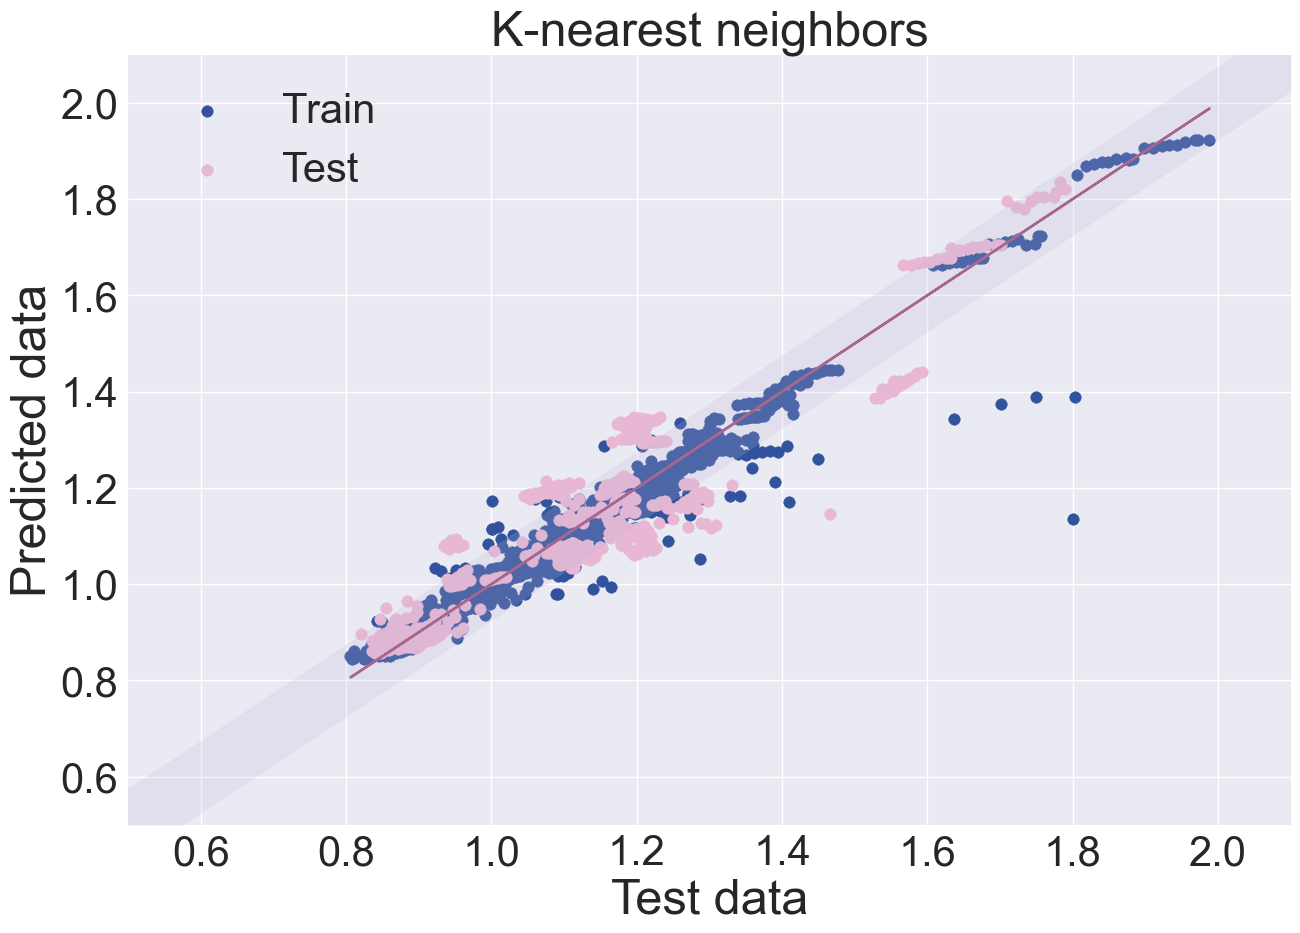

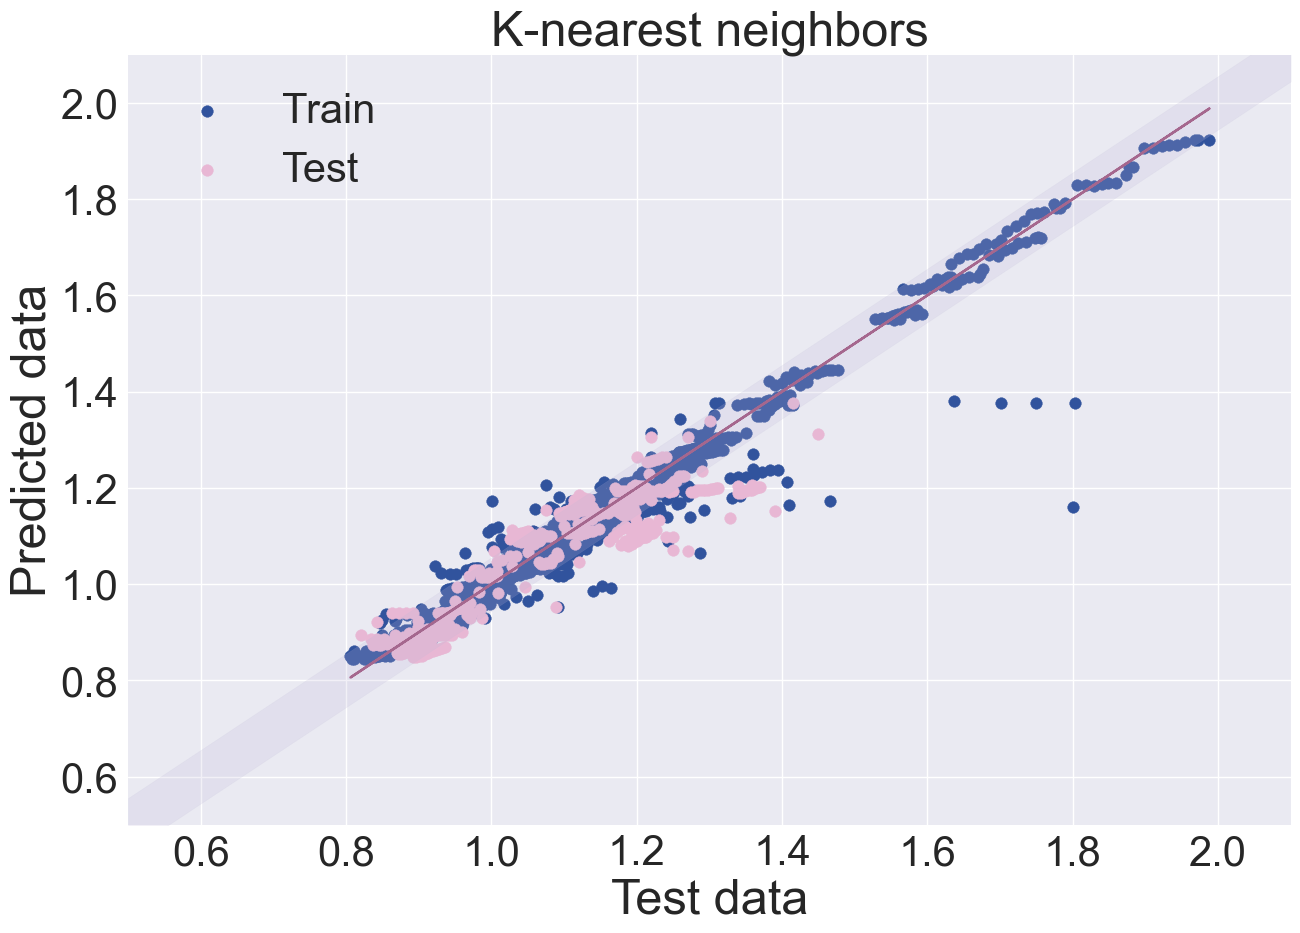

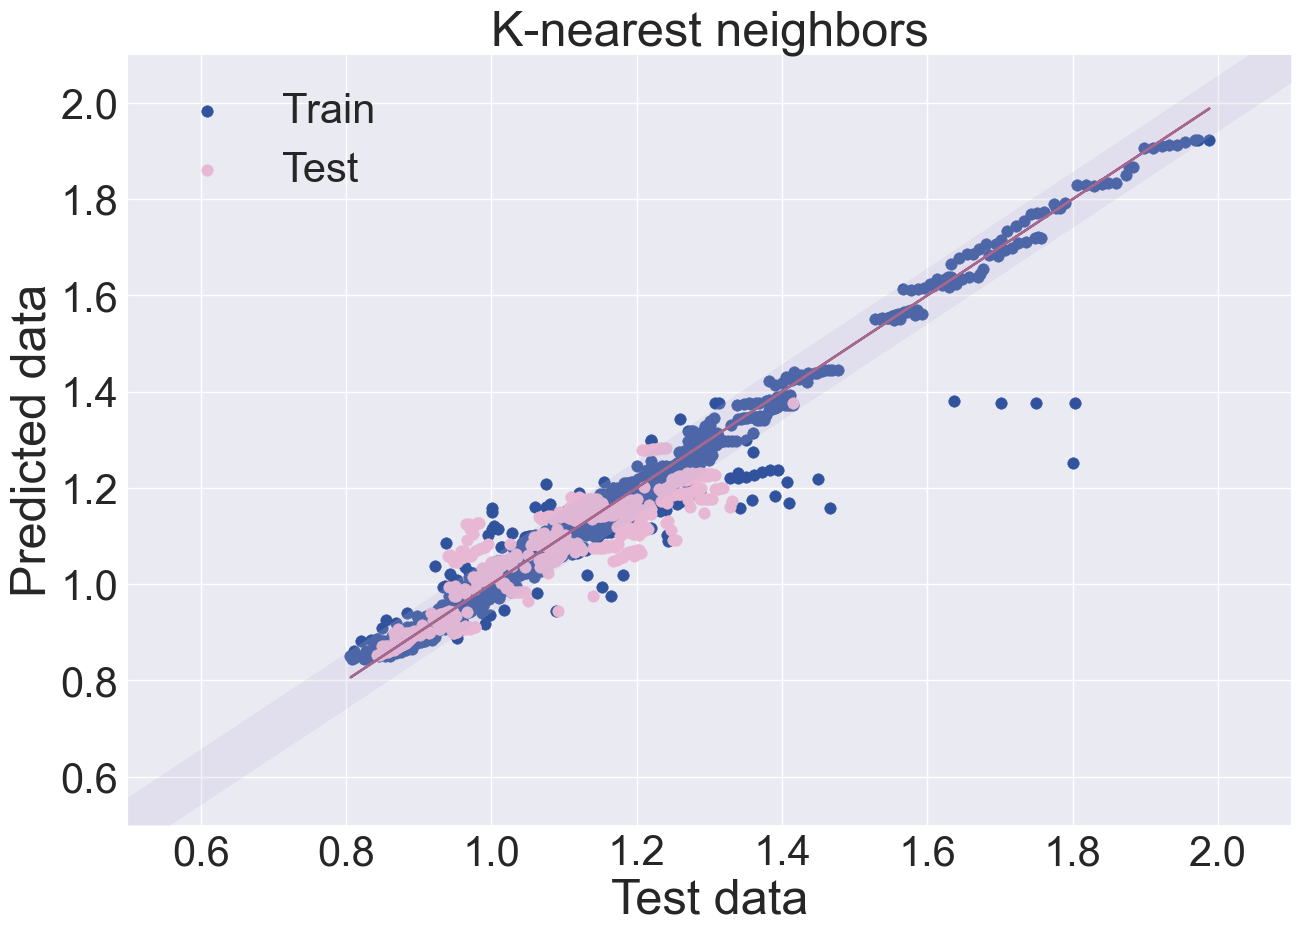

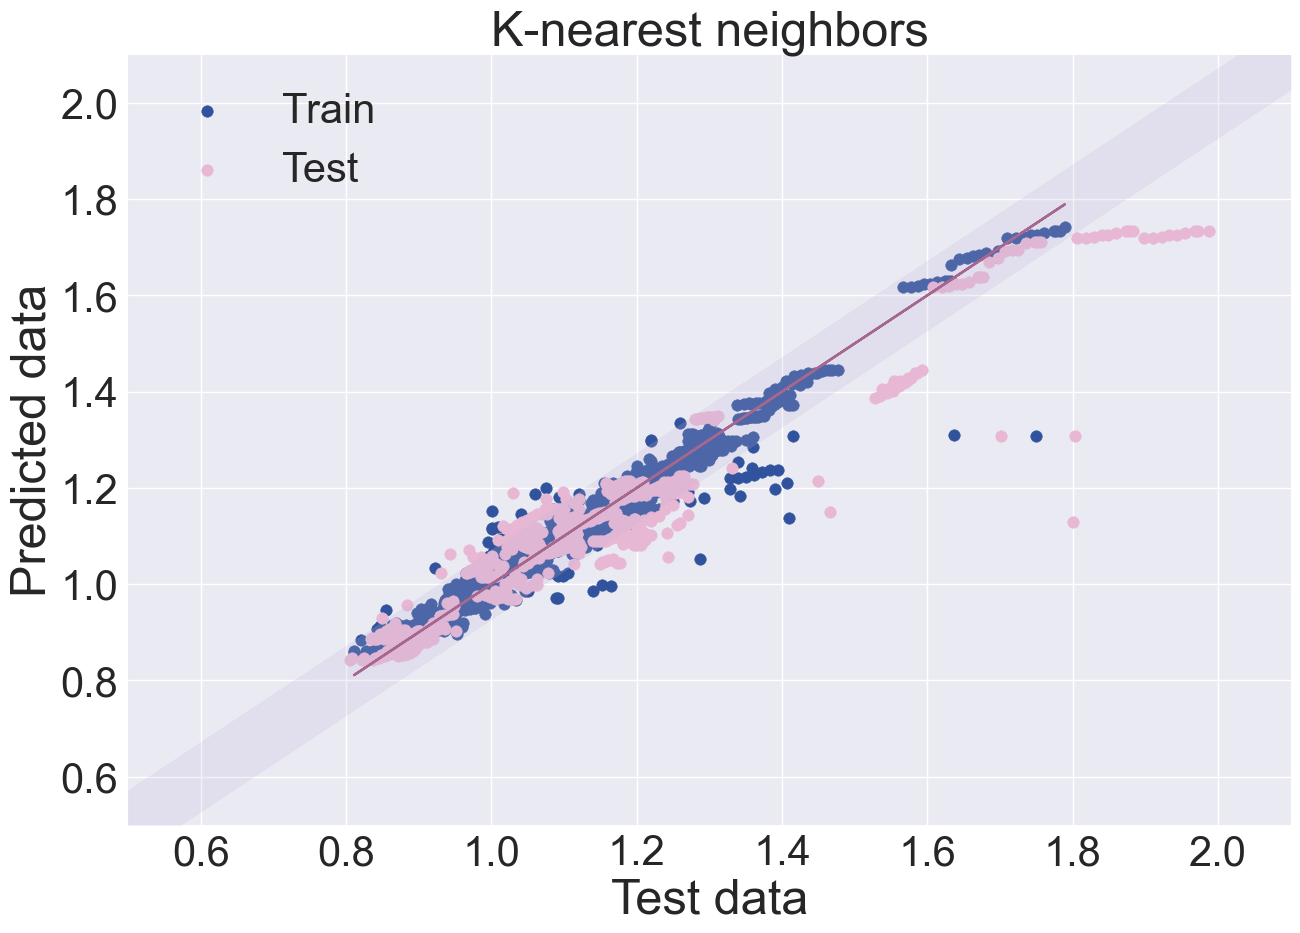

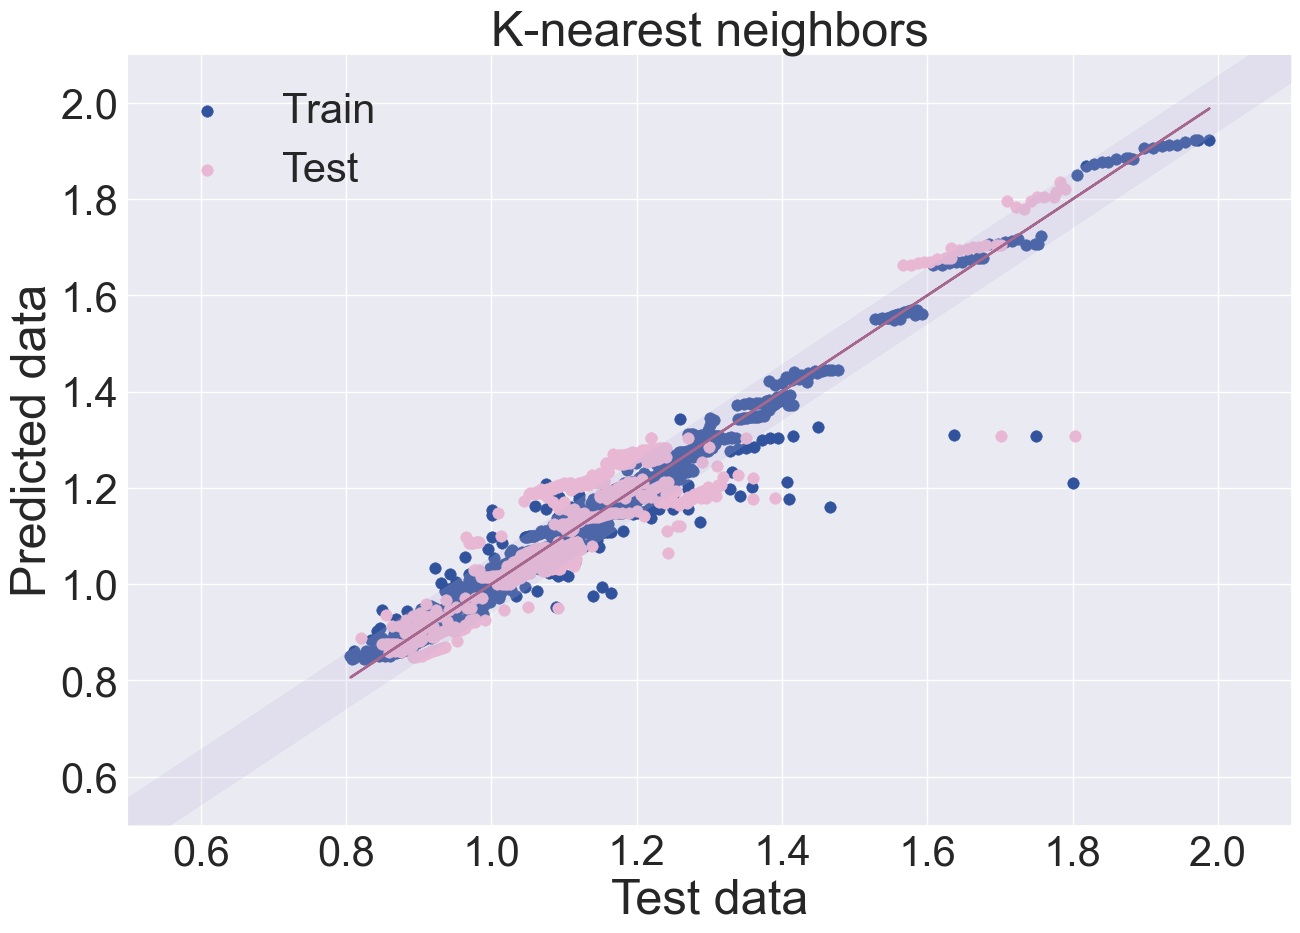

In [96]:
#KNN
count = 0
#Creating a table to check accuracy on different DES classes
KNN_df = x_model[:]
KNN_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    KNN_regr = KNeighborsRegressor(n_neighbors = n_neighbors,leaf_size = leaf_size, p = p, algorithm = algorithm,metric=metric)
    KNN_regr.fit(x_train_mod, y_train_mod)
    y_pred = KNN_regr.predict(x_test_mod)
    y1_pred = KNN_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    KNN_df['Density_train' + str(count)] = None
    KNN_df['Density_test' + str(count)] = None
    KNN_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    KNN_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['K-nearest neighbors' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('K-nearest neighbors', fontsize=35)
df_error_train

In [97]:
df_error_KNN = metrics_class(KNN_df, 'K-nearest neighbors')
df_error_KNN

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   K-nearest neighbors0         2     I  0.285394        NaN    0.054718   
1   K-nearest neighbors0         2   III  0.952084   0.261792    0.020231   
2   K-nearest neighbors0         2    IV  0.793414   0.446477    0.028918   
3   K-nearest neighbors0         2     V  0.961370   0.885555    0.027969   
4   K-nearest neighbors0         3  None  0.910639   0.835759    0.094612   
5   K-nearest neighbors1         2     I  0.372766        NaN    0.051264   
6   K-nearest neighbors1         2   III  0.946375   0.713704    0.021110   
7   K-nearest neighbors1         2    IV  0.963486 -15.729235    0.026808   
8   K-nearest neighbors1         2     V  0.958359   0.898457    0.028425   
9   K-nearest neighbors1         3  None  0.935492   0.855505    0.069013   
10  K-nearest neighbors2         2     I  0.308190       None    0.060674   
11  K-nearest neighbors2         2   III  0.931624   0.698425    0.023501   
12  K-nearest neighbors2         2    IV  0.962985       None    0.024479   
13  K-nearest neighbors2         2     V  0.964958   0.725864    0.026537   
14  K-nearest neighbors2         3  None  0.940608  -0.068564    0.074526   
15  K-nearest neighbors3         2     I  0.507283        NaN    0.049502   
16  K-nearest neighbors3         2   III  0.951441   0.632161    0.020888   
17  K-nearest neighbors3         2    IV  0.922949  -2.327801    0.026213   
18  K-nearest neighbors3         2     V  0.960453   0.893713    0.027831   
19  K-nearest neighbors3         3  None  0.937647   0.801597    0.065057   
20  K-nearest neighbors4         2     I  0.564437  -0.220057    0.047801   
21  K-nearest neighbors4         2   III  0.955696   0.635431    0.019751   
22  K-nearest neighbors4         2    IV  0.963612  -1.593647    0.023953   
23  K-nearest neighbors4         2     V  0.965839   0.790839    0.026019   
24  K-nearest neighbors4         3  None  0.939102   0.850087    0.064496   

   RMSE_test  
0   0.065431  
1    0.07424  
2   0.135649  
3   0.038383  
4   0.086322  
5     0.0658  
6    0.05238  
7   0.132447  
8   0.043183  
9   0.047302  
10      None  
11   0.05261  
12      None  
13   0.06167  
14   0.07103  
15  0.089992  
16  0.046672  
17    0.1404  
18  0.042574  
19  0.122442  
20  0.066274  
21  0.052436  
22  0.041872  
23  0.056319  
24  0.100134

### 5.3. Multilayer perceptron (MLP)

In [98]:
#Optimization of hyperparameters
regr_MLP = MLPRegressor()

params_dict = [{'hidden_layer_sizes':  [(4,4,4,4),(4,4),(4,4,3,3),(4,3,4),(10,10,10,10,10), (3,), (6,6,6,6), (4,4), (10,5,5,10), (6,), (12,12,12), (3,3,3), (6,6,6), (3,3,3,3,3), (12, 12, 6, 6, 3, 3)],
                'activation': ['relu','identity','logistic','tanh'],
                'solver': ['adam', 'lbfgs'],
                'learning_rate':['constant','adaptive','invscaling'],
                'learning_rate_init': [0.1,0.01,0.5, 0.00001],
                'alpha': [0.01,0.1,0.001, 0.0001],
                'max_iter': [1000]}]

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_MLP = GridSearchCV(MLPRegressor(), params_dict, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_jobs=-1, scoring='r2', verbose=10)
opt_MLP.fit(x_train01, y_model)#, sample_weight=sample_weight)

hidden_layer_sizes = opt_MLP.best_estimator_.hidden_layer_sizes
activation = opt_MLP.best_estimator_.activation
solver = opt_MLP.best_estimator_.solver
learning_rate = opt_MLP.best_estimator_.learning_rate
learning_rate_init = opt_MLP.best_estimator_.learning_rate_init
alpha = opt_MLP.best_estimator_.alpha

print('hidden_layer_sizes:', hidden_layer_sizes,'activation:', activation, 'solver:', solver,'learning_rate:', learning_rate, 'learning_rate_init:', learning_rate_init, 'alpha:', alpha)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
hidden_layer_sizes: (12, 12, 12) activation: relu solver: lbfgs learning_rate: constant learning_rate_init: 0.01 alpha: 0.1



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8030626263797237
MAE_test: 0.05034974768658511
MSE_test: 0.007196998123488816
RMSE_test: 0.08483512317129513
r2_train: 0.9776700408846032
MAE_train: 0.01435157573277234
MSE_train: 0.000518360501625397
RMSE_train: 0.022767531742053135



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8648540407909505
MAE_test: 0.035256257930191076
MSE_test: 0.0025572307480118996
RMSE_test: 0.05056906908389653
r2_train: 0.9769155540282384
MAE_train: 0.01522450561694275
MSE_train: 0.0006256115109076253
RMSE_train: 0.02501222722805039



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.723369206612503
MAE_test: 0.0357526237107622
MSE_test: 0.0036390409679224025
RMSE_test: 0.0603244640914646
r2_train: 0.9827848489300604
MAE_train: 0.01287353947237595
MSE_train: 0.0005003977308170655
RMSE_train: 0.022369571538522266



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.948902070470829
MAE_test: 0.029604752575093336
MSE_test: 0.002387155502901128
RMSE_test: 0.04885852538606879
r2_train: 0.9706395488355332
MAE_train: 0.015261043534177107
MSE_train: 0.000589332072752814
RMSE_train: 0.024276162644718255
r2_test: 0.9266590659272518
MAE_test: 0.023844041925798556
MSE_test: 0.0018013693251103596
RMSE_test: 0.04244254145442235
r2_train: 0.9734422777347231
MAE_train: 0.016351192065025624
MSE_train: 0.0007015474949466973
RMSE_train: 0.02648674187110784



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.865267            0.875157            0.891615   
1            0.848835            0.081853            0.582314   
2            0.055925            0.058167            0.056129   
3            0.074325            0.131807            0.074126   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.851805            0.894298                   0.766309   
1            0.814534            0.807343                   0.645843   
2            0.054540            0.052841                   0.073653   
3            0.093083            0.068789                   0.113765   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.914452                   0.937000   
1                   0.733837                   0.627985   
2                   0.048150                   0.042793   
3                   0.070967                   0.069956   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.826998                   0.913975  ...   
1                   0.649775                   0.847995  ...   
2                   0.058928                   0.047670  ...   
3                   0.127912                   0.061102  ...   

   K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
0              0.958990              0.965847              0.967297   
1              0.846293              0.836684              0.751609   
2              0.030854              0.030424              0.030832   
3              0.074948              0.055590              0.057163   

   K-nearest neighbors3  K-nearest neighbors4  Multilayer perceptron (MLP)0  \
0              0.964580              0.969924                      0.977670   
1              0.888115              0.864072                      0.803063   
2              0.026664              0.028187                      0.022768   
3              0.072298              0.057781                      0.084835   

   Multilayer perceptron (MLP)1  Multilayer perceptron (MLP)2  \
0                      0.976916                      0.982785   
1                      0.864854                      0.723369   
2                      0.025012                      0.022370   
3                      0.050569                      0.060324   

   Multilayer perceptron (MLP)3  Multilayer perceptron (MLP)4  
0                      0.970640                      0.973442  
1                      0.948902                      0.926659  
2                      0.024276                      0.026487  
3                      0.048859                      0.042443  

[4 rows x 45 columns]

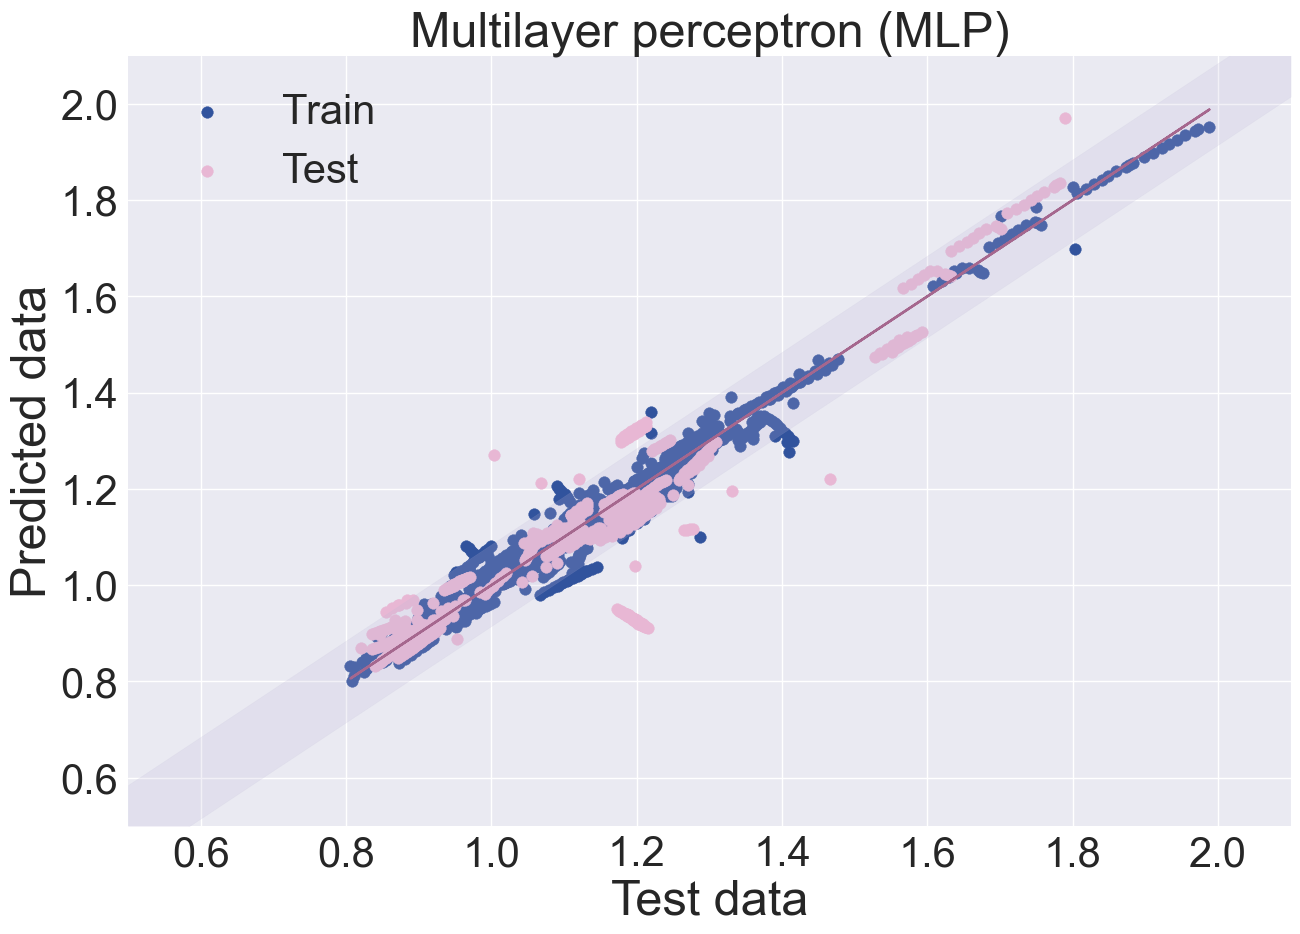

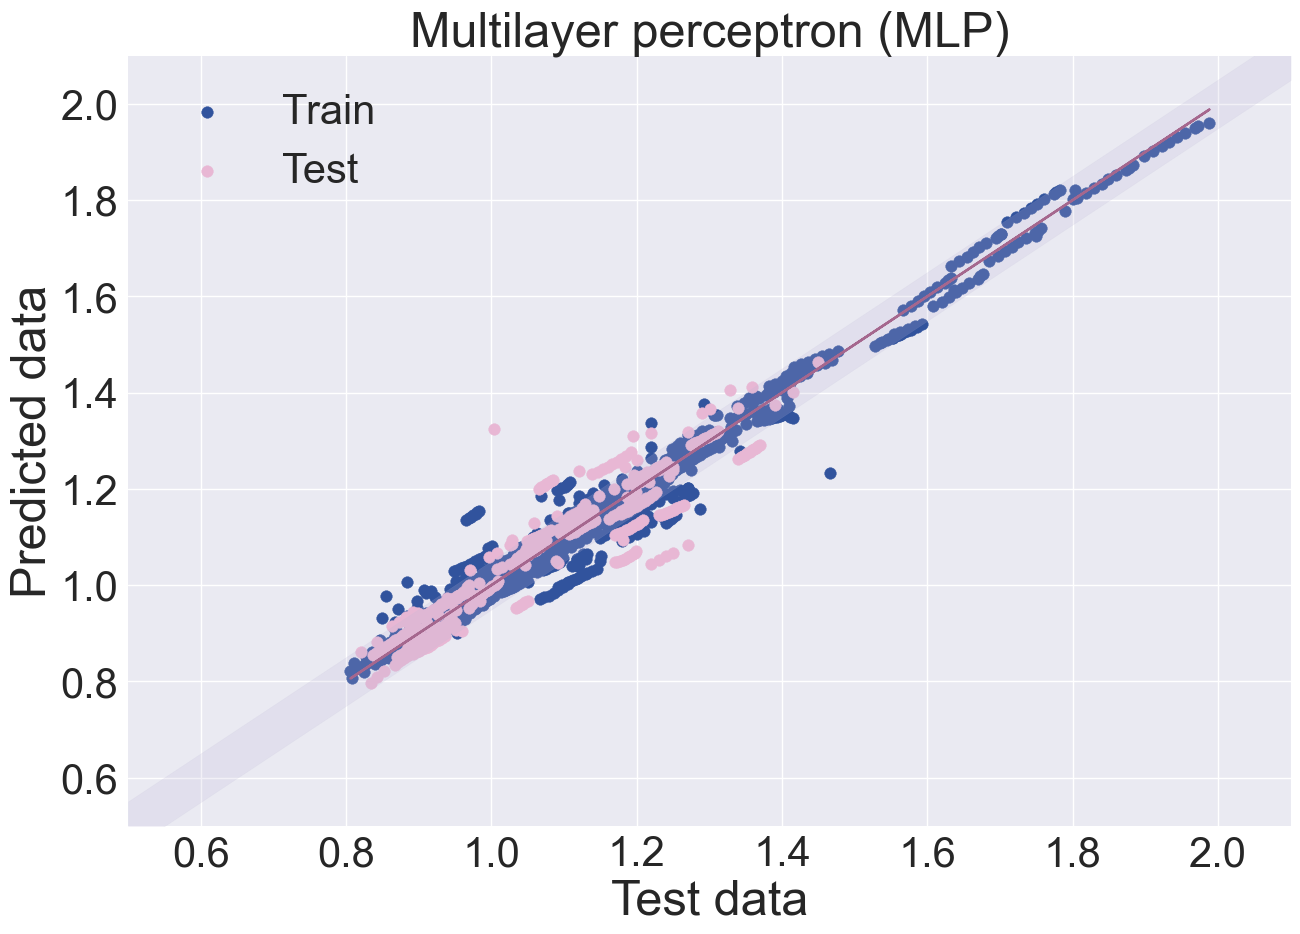

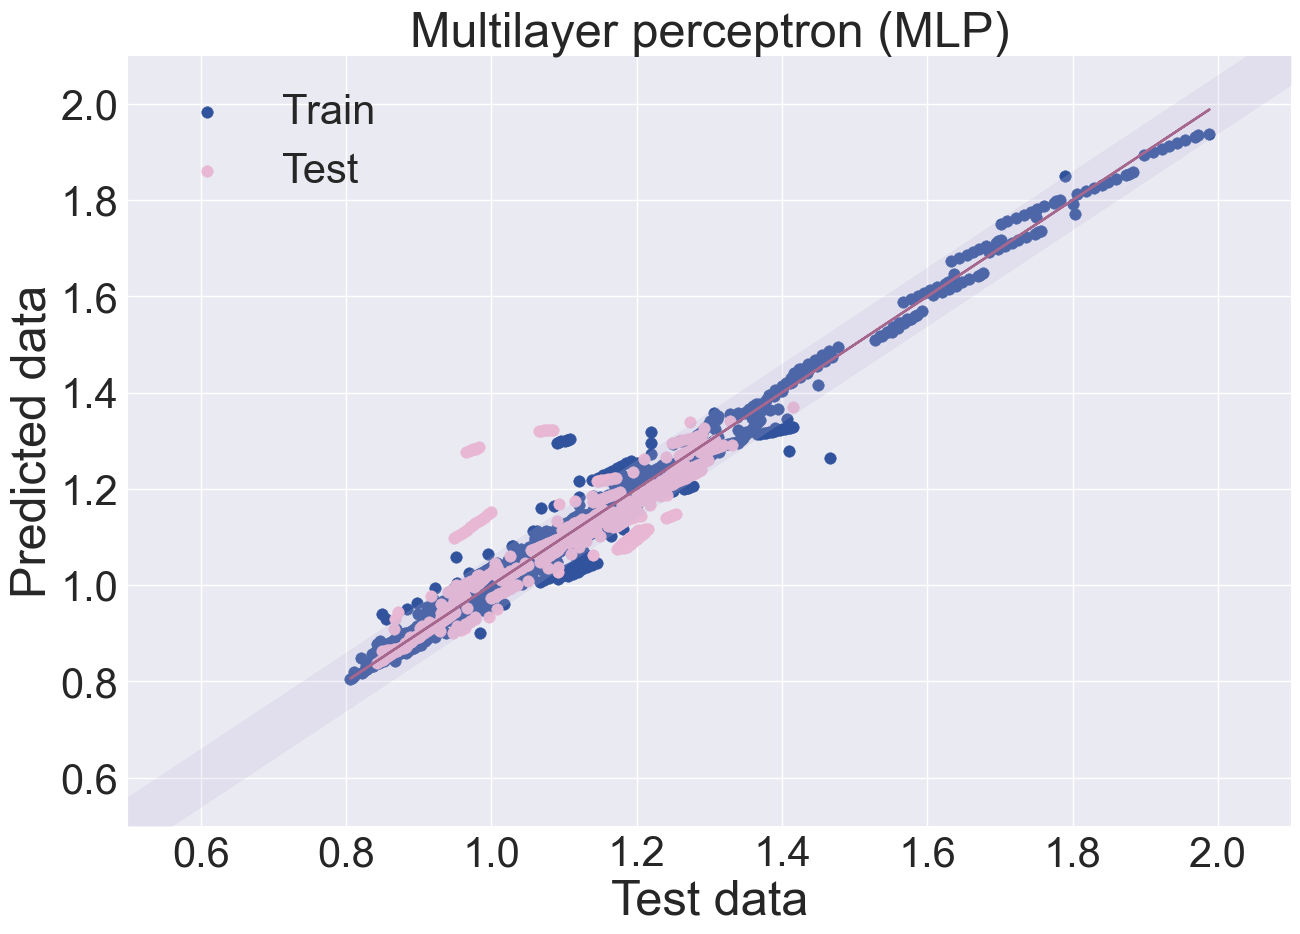

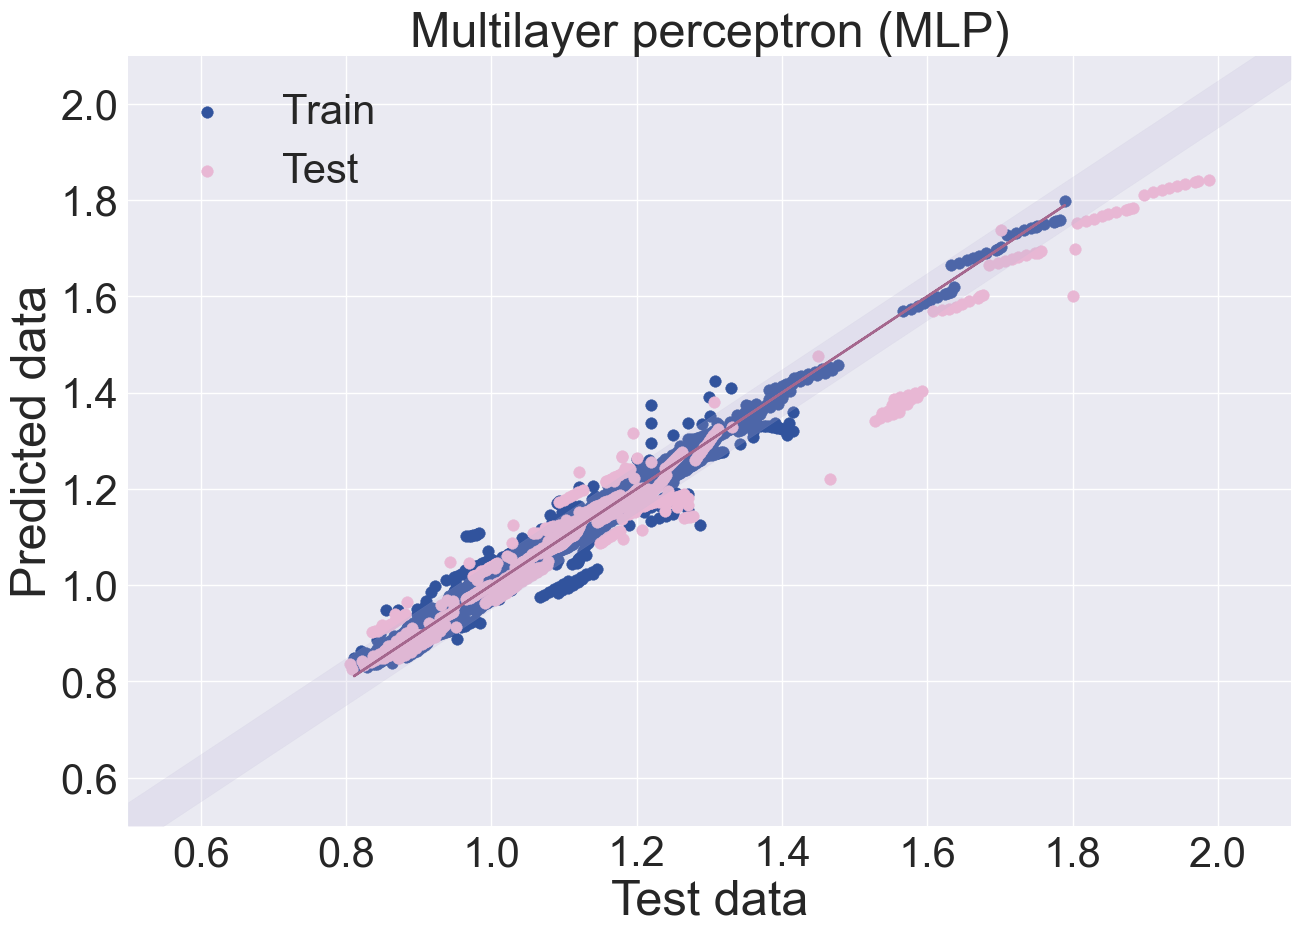

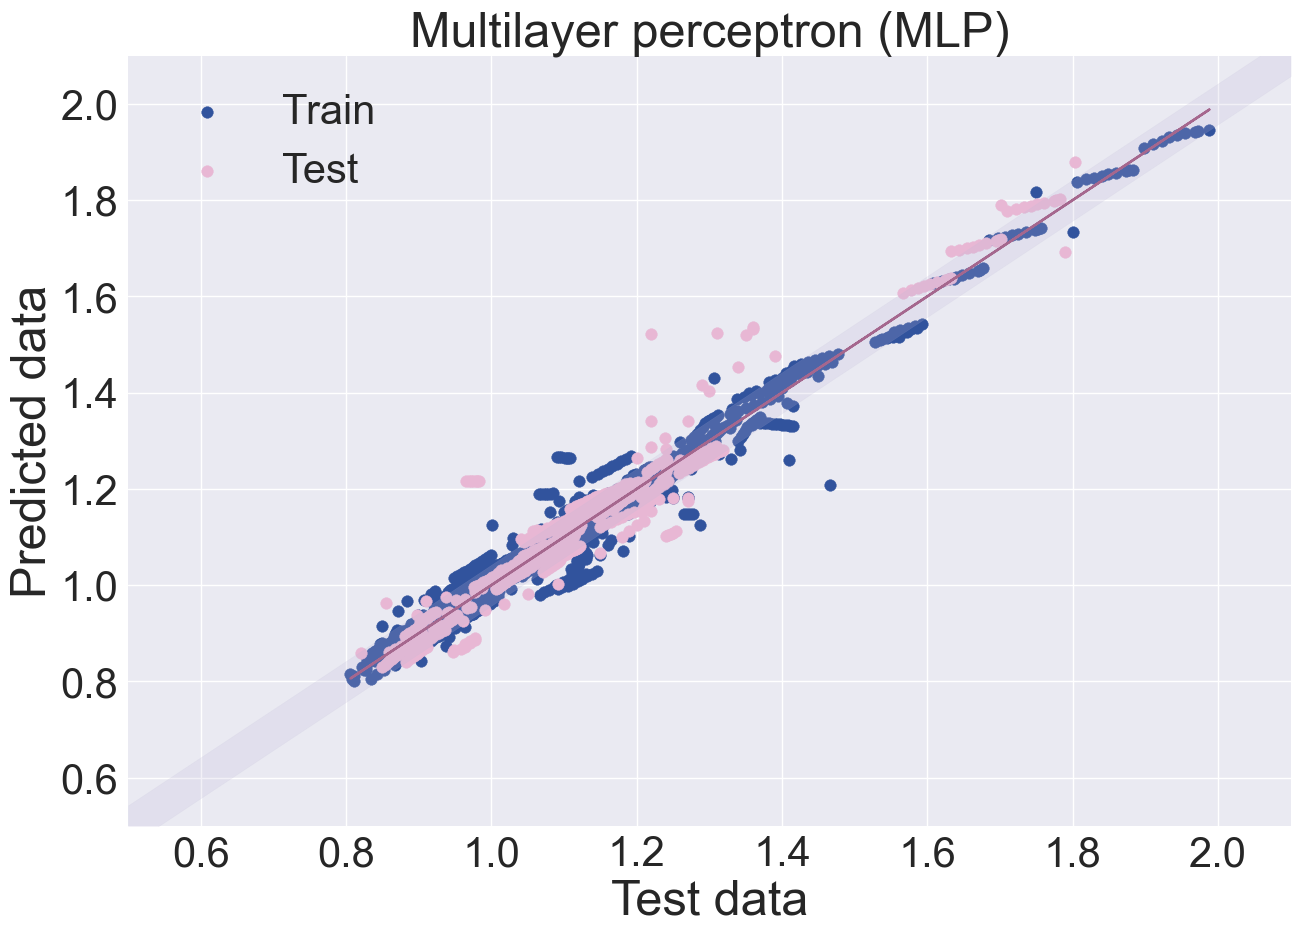

In [99]:
#MLP
count = 0
#Creating a table to check accuracy on different DES classes
MLP_df = x_model[:]
MLP_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    MLP_regr = MLPRegressor(max_iter = 500, hidden_layer_sizes= hidden_layer_sizes, activation=activation, solver=solver, learning_rate= learning_rate, learning_rate_init=learning_rate_init, alpha=alpha)
    MLP_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = MLP_regr.predict(x_test_mod)
    y1_pred = MLP_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    MLP_df['Density_train' + str(count)] = None
    MLP_df['Density_test' + str(count)] = None
    MLP_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    MLP_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Multilayer perceptron (MLP)' + str(count)] = regr_metrics(MLP_df, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Multilayer perceptron (MLP)', fontsize=35)
df_error_train

In [100]:
df_error_MLP = metrics_class(MLP_df, 'Multilayer perceptron (MLP)')
df_error_MLP

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  \
0   Multilayer perceptron (MLP)0         2     I  0.945987       NaN   
1   Multilayer perceptron (MLP)0         2   III  0.954548  0.836882   
2   Multilayer perceptron (MLP)0         2    IV  0.841971  0.710681   
3   Multilayer perceptron (MLP)0         2     V  0.958155   0.89521   
4   Multilayer perceptron (MLP)0         3  None  0.993720  0.371376   
5   Multilayer perceptron (MLP)1         2     I  0.752326       NaN   
6   Multilayer perceptron (MLP)1         2   III  0.947931  0.897652   
7   Multilayer perceptron (MLP)1         2    IV  0.962840 -1.988052   
8   Multilayer perceptron (MLP)1         2     V  0.936471  0.782743   
9   Multilayer perceptron (MLP)1         3  None  0.994706  0.724549   
10  Multilayer perceptron (MLP)2         2     I  0.916515      None   
11  Multilayer perceptron (MLP)2         2   III  0.952481  0.923587   
12  Multilayer perceptron (MLP)2         2    IV  0.967276      None   
13  Multilayer perceptron (MLP)2         2     V  0.961139  0.144845   
14  Multilayer perceptron (MLP)2         3  None  0.995056 -0.351744   
15  Multilayer perceptron (MLP)3         2     I  0.888738       NaN   
16  Multilayer perceptron (MLP)3         2   III  0.947554  0.862364   
17  Multilayer perceptron (MLP)3         2    IV  0.965588 -4.667662   
18  Multilayer perceptron (MLP)3         2     V  0.951469  0.907196   
19  Multilayer perceptron (MLP)3         3  None  0.992173  0.964233   
20  Multilayer perceptron (MLP)4         2     I  0.702069 -1.239147   
21  Multilayer perceptron (MLP)4         2   III  0.939625   0.85622   
22  Multilayer perceptron (MLP)4         2    IV  0.946038  -0.99477   
23  Multilayer perceptron (MLP)4         2     V  0.943968  0.647725   
24  Multilayer perceptron (MLP)4         3  None  0.994276  0.978859   

    RMSE_train RMSE_test  
0     0.015043  0.265774  
1     0.019704  0.034898  
2     0.025293   0.09807  
3     0.029110  0.036728  
4     0.025082  0.168879  
5     0.032214  0.319714  
6     0.020801  0.031318  
7     0.027044  0.055975  
8     0.035110  0.063164  
9     0.019771  0.065309  
10    0.021077      None  
11    0.019592  0.026482  
12    0.023016      None  
13    0.027946  0.108921  
14    0.021502   0.07989  
15    0.023523  0.102582  
16    0.021708  0.028549  
17    0.017518  0.183228  
18    0.030830  0.039783  
19    0.023049  0.051987  
20    0.039534  0.089783  
21    0.023057   0.03293  
22    0.029169  0.036721  
23    0.033324   0.07309  
24    0.019773  0.037603

**Output:** The algorithms given in this chapter have shown good results, but they work worse than boosters

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

In [101]:
#General table obtained after cross-validation
df_error_train.index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']
df_error_train

Linear Regression0  Linear Regression1  Linear Regression2  \
R2_train              0.865267            0.875157            0.891615   
R2_test               0.848835            0.081853            0.582314   
RMSE_train            0.055925            0.058167            0.056129   
RMSE_test             0.074325            0.131807            0.074126   

            Linear Regression3  Linear Regression4  Decision Tree Regression0  \
R2_train              0.851805            0.894298                   0.766309   
R2_test               0.814534            0.807343                   0.645843   
RMSE_train            0.054540            0.052841                   0.073653   
RMSE_test             0.093083            0.068789                   0.113765   

            Decision Tree Regression1  Decision Tree Regression2  \
R2_train                     0.914452                   0.937000   
R2_test                      0.733837                   0.627985   
RMSE_train                   0.048150                   0.042793   
RMSE_test                    0.070967                   0.069956   

            Decision Tree Regression3  Decision Tree Regression4  ...  \
R2_train                     0.826998                   0.913975  ...   
R2_test                      0.649775                   0.847995  ...   
RMSE_train                   0.058928                   0.047670  ...   
RMSE_test                    0.127912                   0.061102  ...   

            K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
R2_train                0.958990              0.965847              0.967297   
R2_test                 0.846293              0.836684              0.751609   
RMSE_train              0.030854              0.030424              0.030832   
RMSE_test               0.074948              0.055590              0.057163   

            K-nearest neighbors3  K-nearest neighbors4  \
R2_train                0.964580              0.969924   
R2_test                 0.888115              0.864072   
RMSE_train              0.026664              0.028187   
RMSE_test               0.072298              0.057781   

            Multilayer perceptron (MLP)0  Multilayer perceptron (MLP)1  \
R2_train                        0.977670                      0.976916   
R2_test                         0.803063                      0.864854   
RMSE_train                      0.022768                      0.025012   
RMSE_test                       0.084835                      0.050569   

            Multilayer perceptron (MLP)2  Multilayer perceptron (MLP)3  \
R2_train                        0.982785                      0.970640   
R2_test                         0.723369                      0.948902   
RMSE_train                      0.022370                      0.024276   
RMSE_test                       0.060324                      0.048859   

            Multilayer perceptron (MLP)4  
R2_train                        0.973442  
R2_test                         0.926659  
RMSE_train                      0.026487  
RMSE_test                       0.042443  

[4 rows x 45 columns]

In [102]:
#Table with averages and deviations for metrics
df_error_train_1 = df_error_train.transpose()
f_get_name = lambda x: x[:-1]
df_error_train_1['Regr'] = df_error_train_1.index
df_error_train_1['Regr'] = df_error_train_1['Regr'].apply(f_get_name)
df_error_train_1 = df_error_train_1.groupby('Regr').agg(['mean', 'std'])
df_error_train_1.columns = ['_'.join(col).rstrip('_') for col in df_error_train_1.columns.values] #Названия для новых столбцов
df_error_train_1

R2_train_mean  R2_train_std  R2_test_mean  \
Regr                                                                      
Cat Boosting Regression            0.977887      0.005666      0.885825   
Decision Tree Regression           0.871747      0.072430      0.701087   
Gradient Boosting Regression       0.940450      0.025858      0.778754   
K-nearest neighbors                0.965327      0.004062      0.837354   
Linear Regression                  0.875629      0.017883      0.626976   
Multilayer perceptron (MLP)        0.976290      0.004597      0.853369   
Random Forest Regression           0.910438      0.039060      0.790462   
Support Vector Machine             0.972482      0.003542      0.828912   
XGBoosting Regression              0.985262      0.003845      0.888943   

                              R2_test_std  RMSE_train_mean  RMSE_train_std  \
Regr                                                                         
Cat Boosting Regression          0.040013         0.023226        0.001438   
Decision Tree Regression         0.091765         0.054239        0.012351   
Gradient Boosting Regression     0.079563         0.037630        0.006270   
K-nearest neighbors              0.051776         0.029392        0.001882   
Linear Regression                0.322524         0.055520        0.001980   
Multilayer perceptron (MLP)      0.092278         0.024182        0.001680   
Random Forest Regression         0.100687         0.046022        0.007277   
Support Vector Machine           0.099406         0.026128        0.000629   
XGBoosting Regression            0.051259         0.018968        0.001458   

                              RMSE_test_mean  RMSE_test_std  
Regr                                                         
Cat Boosting Regression             0.053201       0.008721  
Decision Tree Regression            0.088741       0.029972  
Gradient Boosting Regression        0.074540       0.016145  
K-nearest neighbors                 0.063556       0.009272  
Linear Regression                   0.088426       0.025945  
Multilayer perceptron (MLP)         0.057406       0.016618  
Random Forest Regression            0.071421       0.017955  
Support Vector Machine              0.063776       0.013891  
XGBoosting Regression               0.051411       0.004952

In [103]:
df_error_train_1 = df_error_train_1.drop(index= 'Linear Regression')

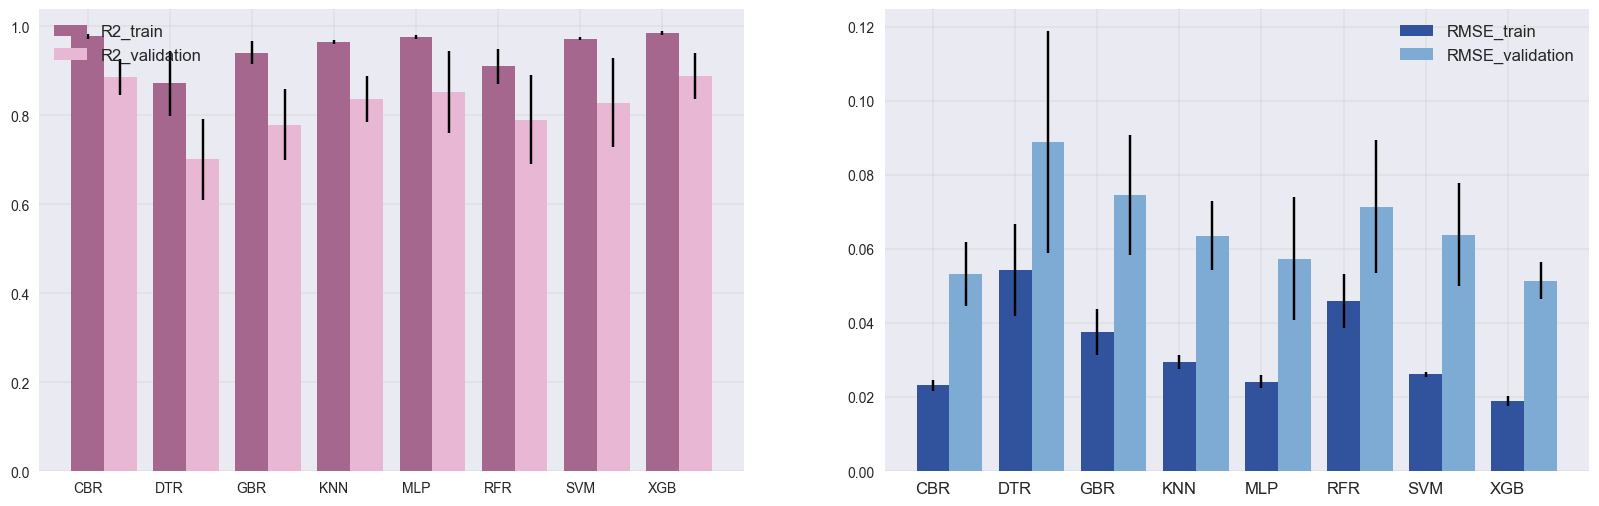

In [104]:
import matplotlib.patches as mpatches
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))

ax1.bar(br1, df_error_train_1['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_train_1['R2_train_std'])
ax1.bar(br2, df_error_train_1['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_train_1['R2_test_std'])

ax2.bar(br3, df_error_train_1['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_train_1['RMSE_train_std'])
ax2.bar(br4, df_error_train_1['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_train_1['RMSE_test_std'])

plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
        
ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)


ax1.legend(fontsize = 12)
ax2.legend(fontsize = 12)


### 6.2. Graphs for various types of DES
Also, to understand how well the models predict values for different types of DES, we will build graphs that will help you see this

In [105]:
# Let's gather all the tables into one
df_error_types = df_error_CBR.append((df_error_DTR, df_error_GBR, df_error_KNN, df_error_MLP, df_error_RFR, df_error_SVM, df_error_XGB))
df_error_types['Type'] = df_error_types['Type'].fillna(0)
df_error_types

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Algorithm MO  Num_comp Type  R2_train    R2_test  RMSE_train  \
0   Cat Boosting Regression0         2    I  0.992904        NaN    0.005453   
1   Cat Boosting Regression0         2  III  0.905158   0.438522    0.028462   
2   Cat Boosting Regression0         2   IV  0.991485   0.713896    0.005871   
3   Cat Boosting Regression0         2    V  0.986784   0.895977    0.016359   
4   Cat Boosting Regression0         3    0  0.995098   0.863907    0.022158   
..                       ...       ...  ...       ...        ...         ...   
20    XGBoosting Regression4         2    I  0.999613   -0.23264    0.001425   
21    XGBoosting Regression4         2  III  0.956222   0.678355    0.019633   
22    XGBoosting Regression4         2   IV  0.999343 -87.103141    0.003219   
23    XGBoosting Regression4         2    V  0.994416   0.869762    0.010520   
24    XGBoosting Regression4         3    0  0.997655   0.982749    0.012657   

   RMSE_test  
0   0.037259  
1   0.064746  
2   0.097524  
3   0.036593  
4   0.078577  
..       ...  
20  0.066615  
21  0.049252  
22  0.244045  
23  0.044441  
24  0.033968  

[200 rows x 7 columns]

In [106]:
#Table with averages and deviations for metrics
f_get_name = lambda x: x[:-1]
#df_error_types['Algorithm MO'] = df_error_types.index
df_error_types['Algorithm MO'] = df_error_types['Algorithm MO'].apply(f_get_name)
df_error_types = df_error_types.groupby(['Algorithm MO','Num_comp', 'Type']).agg(['mean', 'std'])
df_error_types.columns = ['_'.join(col).rstrip('_') for col in df_error_types.columns.values] #Names for new columns
df_error_types = df_error_types.reset_index()
df_error_types

Algorithm MO  Num_comp Type  R2_train_mean  R2_train_std  \
0        Cat Boosting Regression         2    I       0.995499      0.001508   
1        Cat Boosting Regression         2  III       0.918912      0.008617   
2        Cat Boosting Regression         2   IV       0.996069      0.002583   
3        Cat Boosting Regression         2    V       0.986097      0.001405   
4        Cat Boosting Regression         3    0       0.995222      0.001631   
5        Decision Tree Regressor         2    I      -1.288729      2.533526   
6        Decision Tree Regressor         2  III       0.759044      0.067636   
7        Decision Tree Regressor         2   IV       0.627430      0.296748   
8        Decision Tree Regressor         2    V       0.939576      0.019103   
9        Decision Tree Regressor         3    0       0.737661      0.265596   
10  Gradient Boosting Regression         2    I       0.982262      0.011440   
11  Gradient Boosting Regression         2  III       0.790330      0.079720   
12  Gradient Boosting Regression         2   IV       0.984197      0.009641   
13  Gradient Boosting Regression         2    V       0.959602      0.006615   
14  Gradient Boosting Regression         3    0       0.984005      0.006406   
15           K-nearest neighbors         2    I       0.407614      0.123049   
16           K-nearest neighbors         2  III       0.947444      0.009447   
17           K-nearest neighbors         2   IV       0.921289      0.073595   
18           K-nearest neighbors         2    V       0.962196      0.003136   
19           K-nearest neighbors         3    0       0.932698      0.012475   
20   Multilayer perceptron (MLP)         2    I       0.841127      0.107434   
21   Multilayer perceptron (MLP)         2  III       0.948428      0.005753   
22   Multilayer perceptron (MLP)         2   IV       0.936743      0.053651   
23   Multilayer perceptron (MLP)         2    V       0.950241      0.010147   
24   Multilayer perceptron (MLP)         3    0       0.993986      0.001130   
25      Random Forest Regression         2    I      -1.457818      1.160845   
26      Random Forest Regression         2  III       0.853246      0.010341   
27      Random Forest Regression         2   IV       0.746998      0.124051   
28      Random Forest Regression         2    V       0.951995      0.005345   
29      Random Forest Regression         3    0       0.789032      0.178048   
30        Support Vector Machine         2    I       0.884271      0.016972   
31        Support Vector Machine         2  III       0.918892      0.006645   
32        Support Vector Machine         2   IV       0.929481      0.051454   
33        Support Vector Machine         2    V       0.965386      0.001643   
34        Support Vector Machine         3    0       0.992450      0.001308   
35         XGBoosting Regression         2    I       0.999299      0.000235   
36         XGBoosting Regression         2  III       0.941975      0.008244   
37         XGBoosting Regression         2   IV       0.998298      0.001339   
38         XGBoosting Regression         2    V       0.994027      0.001047   
39         XGBoosting Regression         3    0       0.997542      0.000584   

    R2_test_mean  R2_test_std  RMSE_train_mean  RMSE_train_std  \
0       0.534923          NaN         0.004563        0.000533   
1       0.706035     0.154493         0.026292        0.001564   
2      -5.083150     5.994688         0.006280        0.000738   
3       0.841278     0.102263         0.016587        0.000821   
4       0.871385     0.102195         0.019249        0.002798   
5      -3.679449          NaN         0.085185        0.072373   
6       0.400156     0.239238         0.045026        0.006841   
7     -12.030126    20.254657         0.065145        0.041475   
8       0.758249     0.116040         0.034295        0.005453   
9       0.553269     0.430957         0.127885        0.085054   
10      0.238

invalid value encountered in reduce
invalid value encountered in reduce


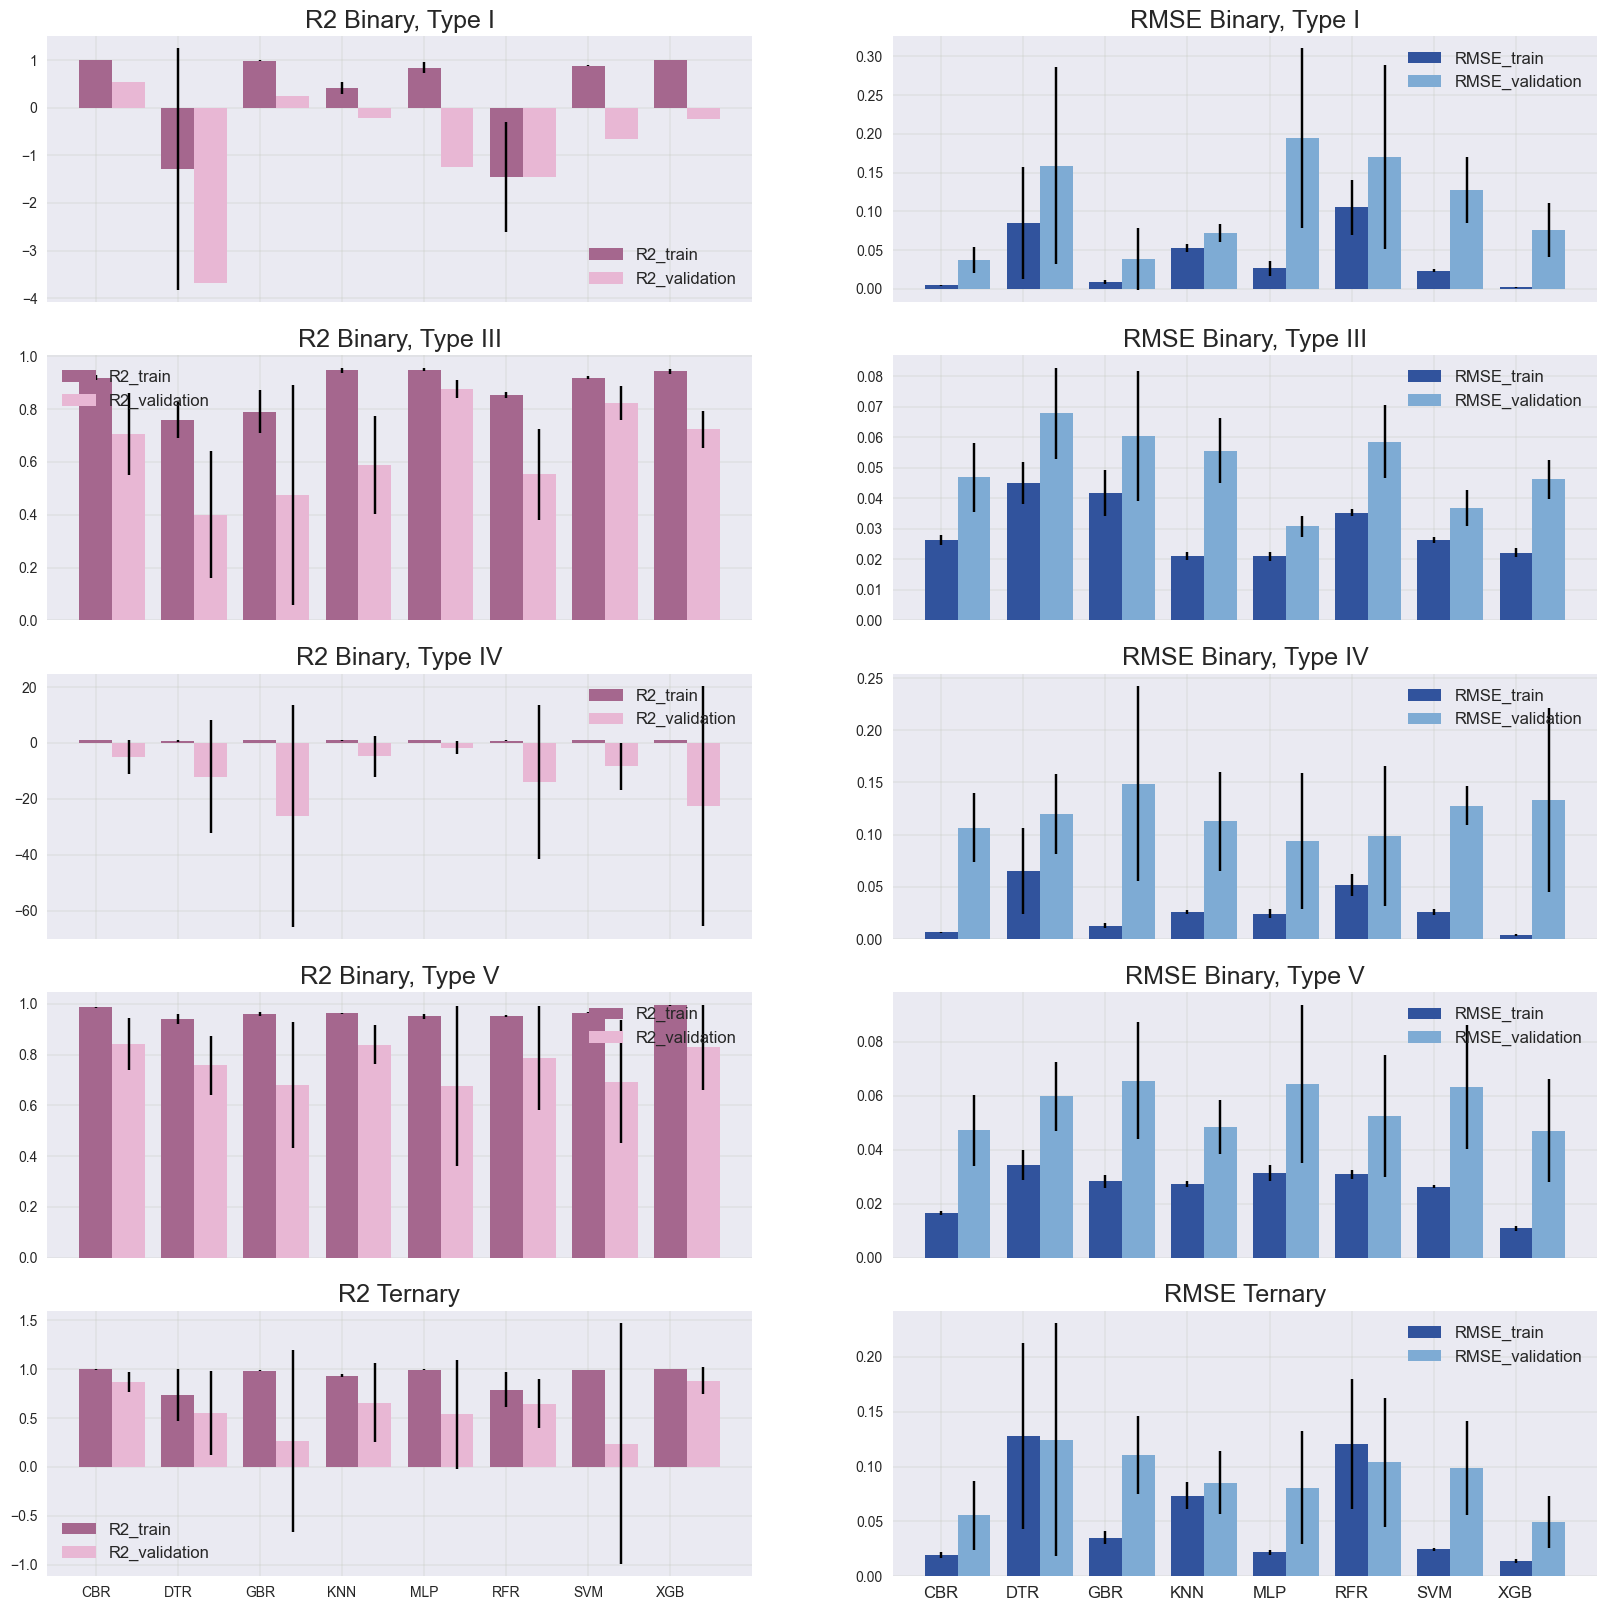

In [107]:
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(20, 20))

count = 0
conditions = [df_error_types['Type'] == 'I', df_error_types['Type'] == 'III', df_error_types['Type'] == 'IV', df_error_types['Type'] == 'V', df_error_types['Num_comp'] == 3]
Names = ['Binary, Type I', 'Binary, Type III', 'Binary, Type IV', 'Binary, Type V', 'Ternary']
for i in range(5):
  ax[i][0].bar(br1, df_error_types[conditions[count]]['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_types[conditions[count]]['R2_train_std'])
  ax[i][0].bar(br2, df_error_types[conditions[count]]['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_types[conditions[count]]['R2_test_std'])
  ax[i][0].set_title('R2' + ' ' + Names[count], fontsize = 18)
  plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)

  ax[i][1].bar(br3, df_error_types[conditions[count]]['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_types[conditions[count]]['RMSE_train_std'])
  ax[i][1].bar(br4, df_error_types[conditions[count]]['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_types[conditions[count]]['RMSE_test_std'])
  ax[i][1].set_title(('RMSE' + ' ' + Names[count]), fontsize = 18)
  plt.xticks(br3, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
  
          
  ax[i][0].grid(color='#C3C6BA', linewidth=0.3)
  ax[i][1].grid(color='#C3C6BA', linewidth=0.3)


  ax[i][0].legend(fontsize = 12)
  ax[i][1].legend(fontsize = 12)
  count += 1

## General conclusions:
The highest results were shown by Cut Boost, Boost, Multilawyer perceptron on the validation sample, model data accuracy up to R2 = 0.88, and RMSE equal to 0.06. Cat Boost was chosen as the main model, as it shows good results on all types of DES